***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            </ul>
     </ol>
<br>

In [1]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix


Using TensorFlow backend.


In [2]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>
#### Random State 0

In [3]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')

# #z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
#     '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
#     '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
# ]


# columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
#     '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
#     '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
# ]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  4568  42    49   57  1200   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16   4     6    5     7   

                                                    NREC         PAR  \
User                                                                   
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5038  146.820762   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16    5.937500   

                                                          PAS        LEN  \
User                                                                       
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  56.766574  78.731441   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...   9.375000  34.125000   

                                                            BYS  \
User                                                              
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5765.397777   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...  1506.000000   

                                                              BYR  0000  0100  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  184063.583962   578   185   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    3370.125000     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   138   268   205   180   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   149   136   156   104   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   120   158   254   116   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     3     2     0   

                                                    1400  1500  1600  1700  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   207   118   134   215   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   177   142   343   221   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     0     0     0   

                                                    2200  2300  
User                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   295   439  
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0

In [4]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
1f82574ddff42f1b88e62ffb165c3ec923566ba35c529384374b1ba66ef60756    0
ecb38e6cc658213a1e435bcb534a531fef9f8d54b7ec9b27419a1065e19f4f10    0
f7556cb149bd02ef75b3657db80430c61b85847c0cc55c90d7dd6ed6a912d4d1    0
c1084232da26636ffe647ab497b1a09c82db9436937f4898e025587d1e03ad49    0
4ad4b5e8c8f698eabd4fa898c91abb574b6014e24c7e004adae9f209e7ec9b91    1
Name: Target, dtype: int64

In [5]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [6]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5451     0     5451
True           0  2309     2309
__all__     5451  2309     7760

Accuracy of the  KNN  model for test data is: 0.7932989690721649

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1182   157     1339
True         244   357      601
__all__     1426   514     1940

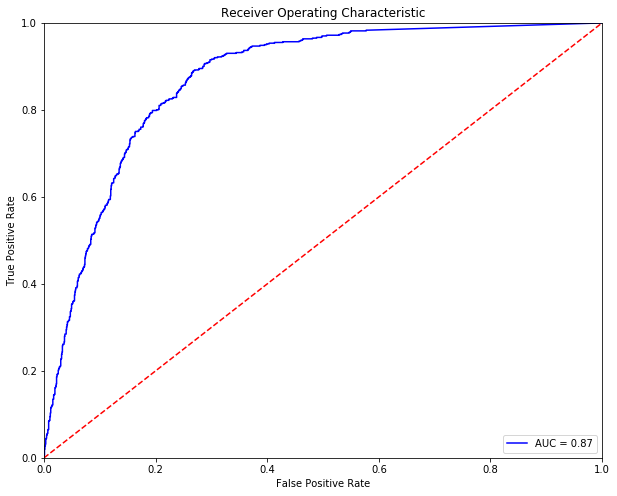

Optimal Threshold is 0.3034526945735687
Accuracy on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False       1070   269     1339
True         121   480      601
__all__     1191   749     1940

In [8]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [9]:
table_80_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [10]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.7       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8052835051546392

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4485   966     5451
True         545  1764     2309
__all__     5030  2730     7760

Accuracy of the  Logistic  model for test data is: 0.8221649484536082

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1127   212     1339
True         133   468      601
__all__     1260   680     1940

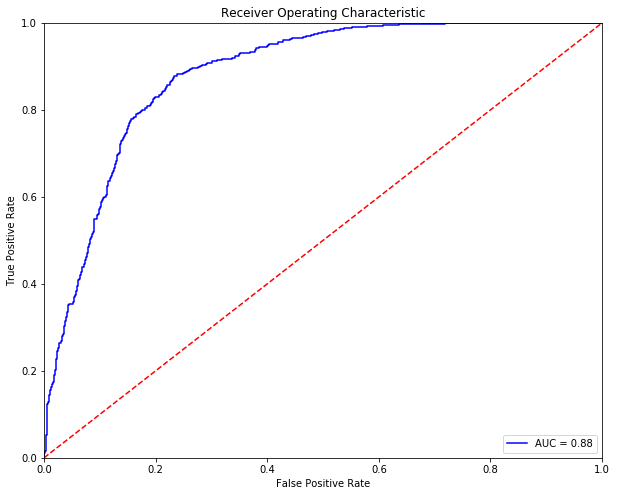

Optimal Threshold is 0.4600109601677534
Accuracy on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       1084   255     1339
True         115   486      601
__all__     1199   741     1940

In [11]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [12]:
table_80_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [13]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8059278350515464

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4522   929     5451
True         577  1732     2309
__all__     5099  2661     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1129   210     1339
True         140   461      601
__all__     1269   671     1940

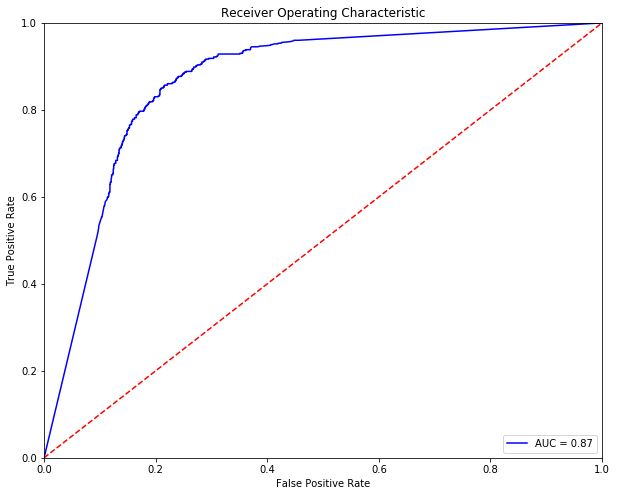

Optimal Threshold is 0.3375224419489646
Accuracy on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1090   249     1339
True         113   488      601
__all__     1203   737     1940

In [14]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [15]:
table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

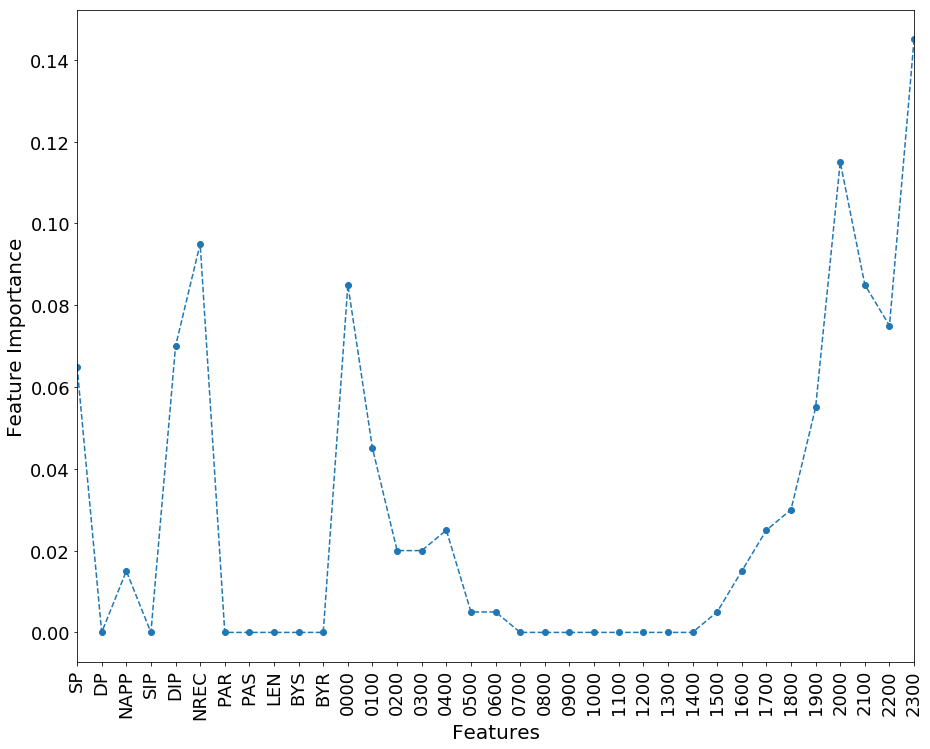

In [16]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [17]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8154639175257732

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4735   716     5451
True         716  1593     2309
__all__     5451  2309     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1153   186     1339
True         194   407      601
__all__     1347   593     1940

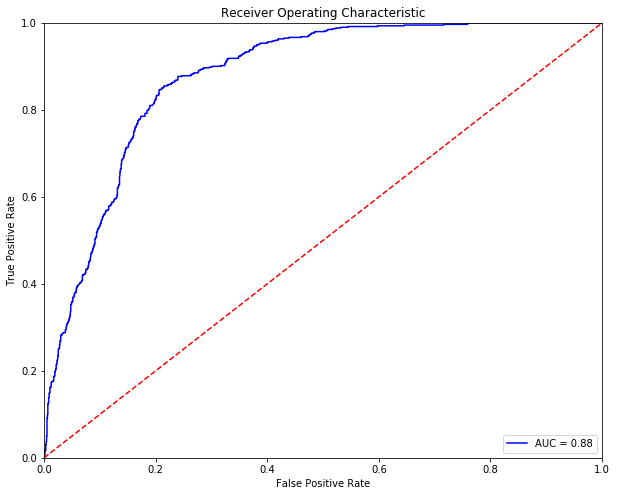

Optimal Threshold is 0.4985076233173853
Accuracy on test data is: 0.8097938144329897


Predicted  False  True  __all__
Actual                         
False       1085   254     1339
True         115   486      601
__all__     1200   740     1940

In [18]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [19]:
table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

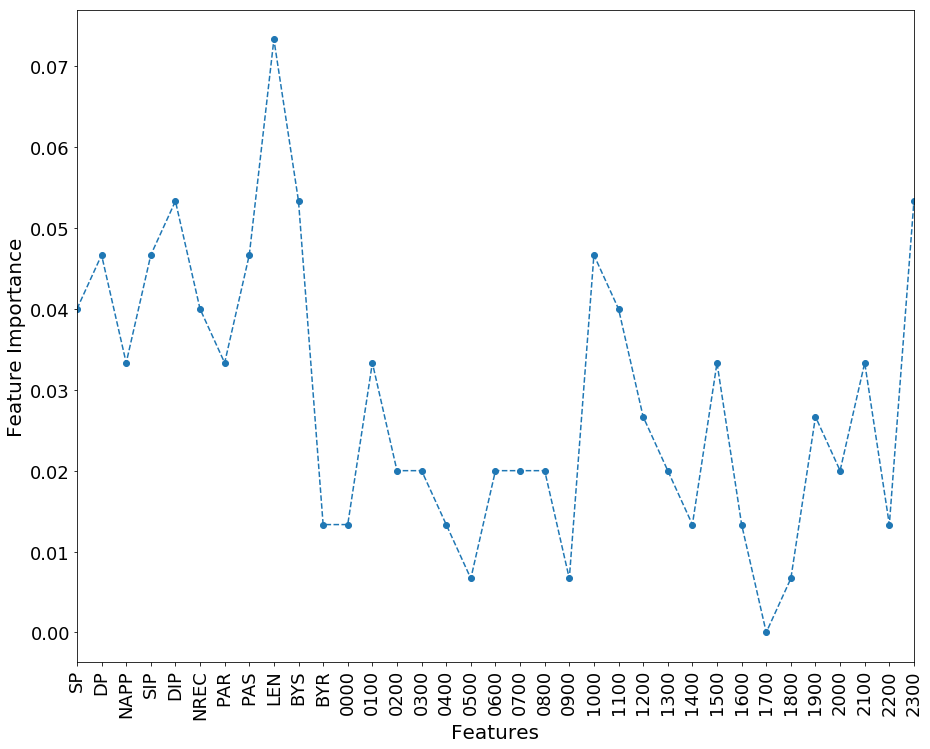

In [20]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [21]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8184278350515464

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4732   719     5451
True         690  1619     2309
__all__     5422  2338     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8170103092783505

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1160   179     1339
True         176   425      601
__all__     1336   604     1940

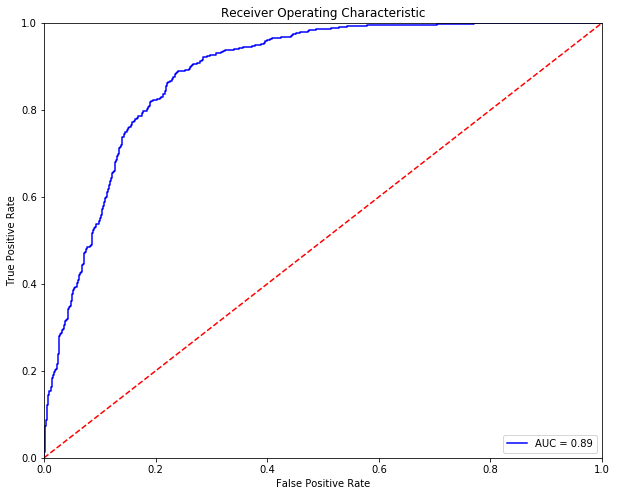

Optimal Threshold is 0.36207639748954124
Accuracy on test data is: 0.8108247422680412


Predicted  False  True  __all__
Actual                         
False       1086   253     1339
True         114   487      601
__all__     1200   740     1940

In [22]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [23]:
table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

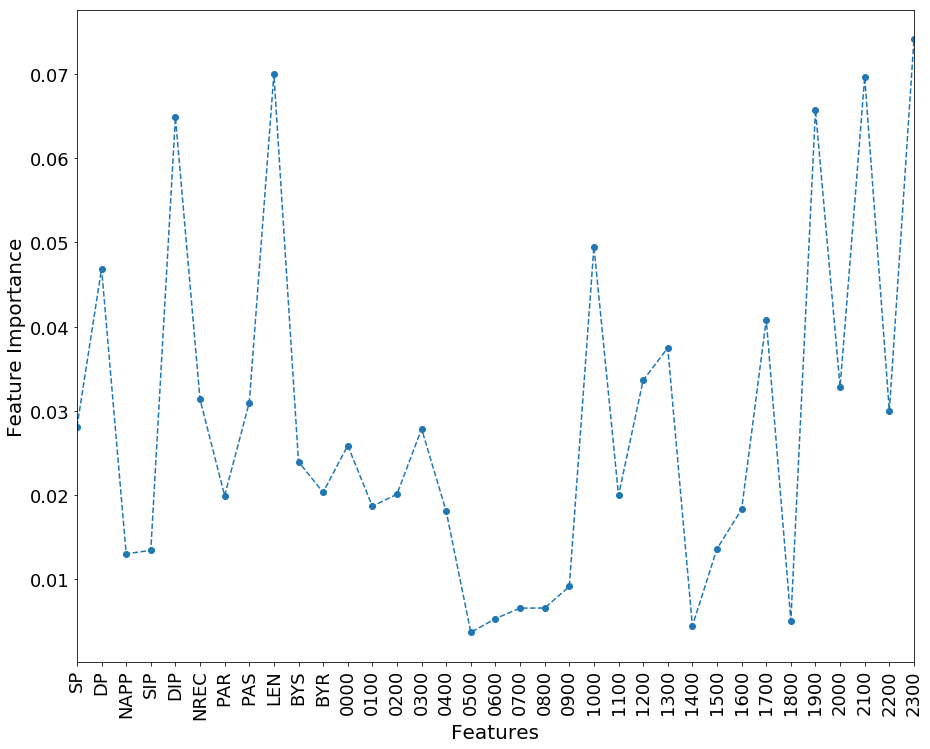

In [24]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [25]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8070876288659794

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4755   696     5451
True         801  1508     2309
__all__     5556  2204     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8134020618556701

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1170   169     1339
True         193   408      601
__all__     1363   577     1940

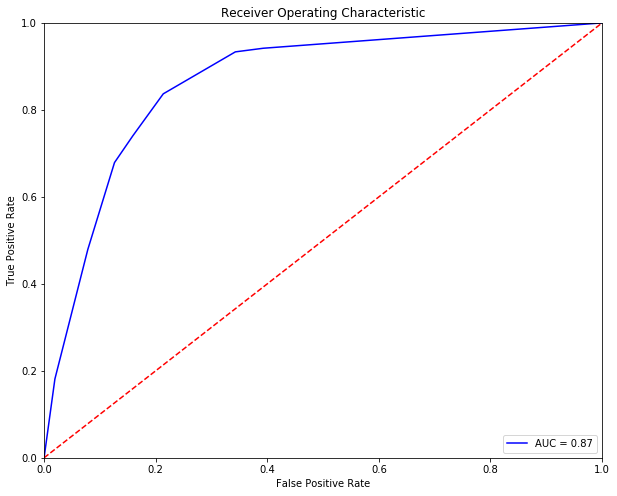

Optimal Threshold is 0.3539325842696629
Accuracy on test data is: 0.8097938144329897


Predicted  False  True  __all__
Actual                         
False       1126   213     1339
True         156   445      601
__all__     1282   658     1940

In [26]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [27]:
table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [28]:
%%capture
table_80_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

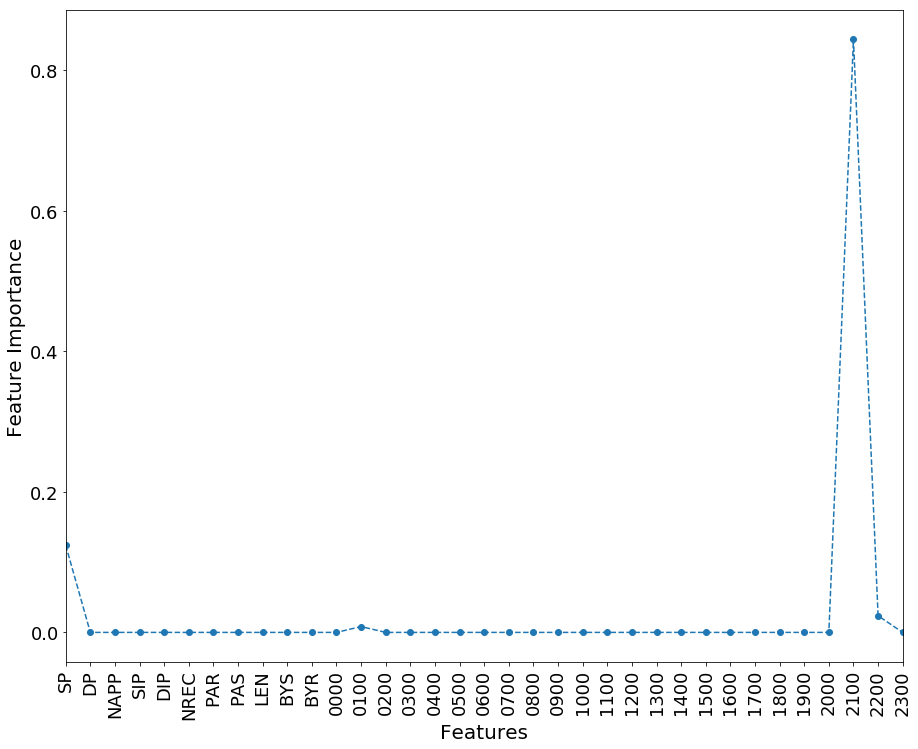

In [29]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [30]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9247422680412372

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5246   205     5451
True         379  1930     2309
__all__     5625  2135     7760

Accuracy of the  Bagging  model for test data is: 0.8144329896907216

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1159   180     1339
True         180   421      601
__all__     1339   601     1940

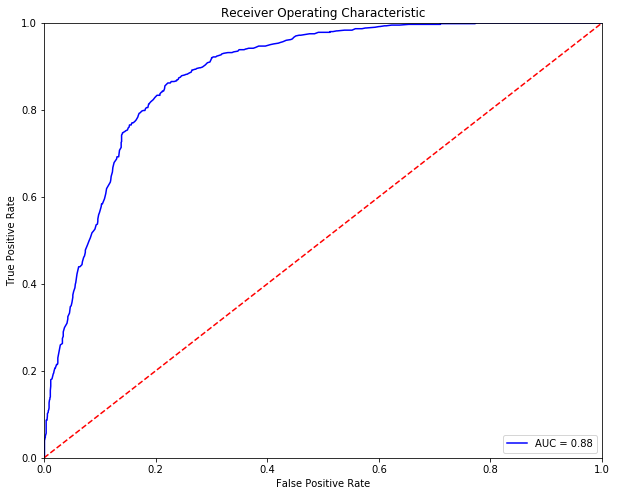

Optimal Threshold is 0.37666666666666665
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1090   249     1339
True         117   484      601
__all__     1207   733     1940

In [31]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [32]:
table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [33]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9337628865979382


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5325   126     5451
True         388  1921     2309
__all__     5713  2047     7760

The test accuracy is: 0.8030927835051547


Predicted  False  True  __all__
Actual                         
False       1173   166     1339
True         216   385      601
__all__     1389   551     1940

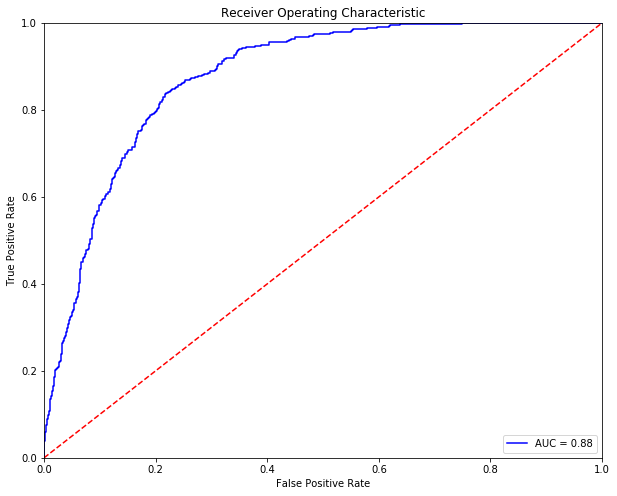

Optimal Threshold is 0.3689878018927256
Accuracy on test data is: 0.7984536082474227


Predicted  False  True  __all__
Actual                         
False       1070   269     1339
True         122   479      601
__all__     1192   748     1940

In [34]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [35]:
table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [36]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9198453608247422


Predicted  False  True  __all__
Actual                         
False       5300   151     5451
True         471  1838     2309
__all__     5771  1989     7760

The accuracy of the model on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False       1190   149     1339
True         271   330      601
__all__     1461   479     1940

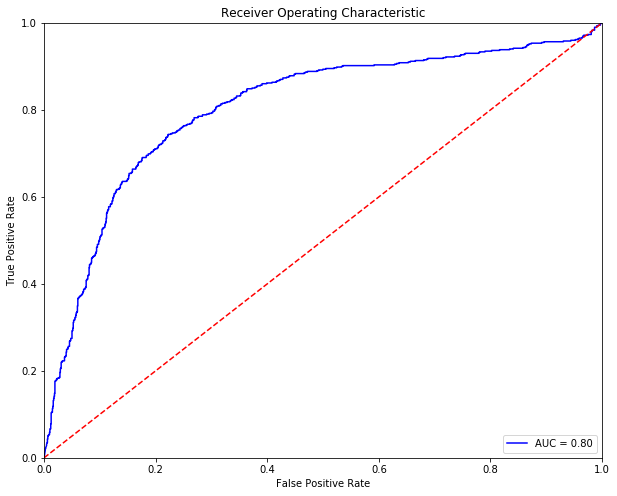

Optimal Threshold is 0.08917947
Accuracy of Logistic Model on training data is: 0.7561855670103093


Predicted  False  True  __all__
Actual                         
False       1013   326     1339
True         147   454      601
__all__     1160   780     1940

In [37]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [38]:
table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [39]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


The accuracy of the model on training data is: 0.8094072164948454


Predicted  False  True  __all__
Actual                         
False       4533   918     5451
True         561  1748     2309
__all__     5094  2666     7760

The accuracy of the model on test data is: 0.8195876288659794


Predicted  False  True  __all__
Actual                         
False       1128   211     1339
True         139   462      601
__all__     1267   673     1940

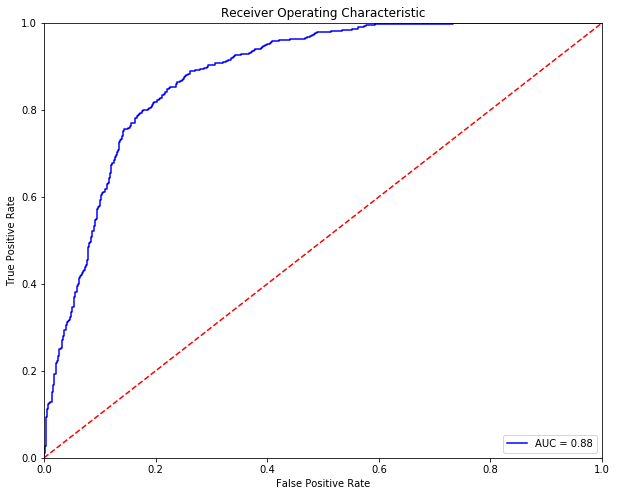

Optimal Threshold is 0.43062806
Accuracy on test data is: 0.8077319587628866


Predicted  False  True  __all__
Actual                         
False       1082   257     1339
True         116   485      601
__all__     1198   742     1940

In [40]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [41]:
table_80_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [42]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2309.0  5451.0    0.0    0.0  0.000000   
LogisticRegression          0.805284  1764.0  4485.0  966.0  545.0  0.177215   
RandomForestClassifier      0.805928  1732.0  4522.0  929.0  577.0  0.170427   
AdaBoostClassifier          0.815464  1593.0  4735.0  716.0  716.0  0.131352   
GradientBoostingClassifier  0.818428  1619.0  4732.0  719.0  690.0  0.131902   
ExtraTreeClassifier         0.807088  1508.0  4755.0  696.0  801.0  0.127683   
BaggingClassifier           0.924742  1930.0  5246.0  205.0  379.0  0.037608   
VotingClassifier            0.933763  1921.0  5325.0  126.0  388.0  0.023115   
Neural Network-1            0.919845  1838.0  5300.0  151.0  471.0  0.027701   
Neural-Network-2            0.809407  1748.0  4533.0  918.0  561.0  0.168409   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.236033  
RandomForestClassifier      0.249892  
AdaBoostClassifier          0.310091  
GradientBoostingClassifier  0.298831  
ExtraTreeClassifier         0.346903  
BaggingClassifier           0.164140  
VotingClassifier            0.168038  
Neural Network-1            0.203984  
Neural-Network-2            0.242962

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.793299  357.0  1182.0  157.0  244.0  0.117252   
LogisticRegression          0.822165  468.0  1127.0  212.0  133.0  0.158327   
RandomForestClassifier      0.819588  461.0  1129.0  210.0  140.0  0.156833   
AdaBoostClassifier          0.804124  407.0  1153.0  186.0  194.0  0.138910   
GradientBoostingClassifier  0.817010  425.0  1160.0  179.0  176.0  0.133682   
ExtraTreeClassifier         0.813402  408.0  1170.0  169.0  193.0  0.126214   
BaggingClassifier           0.814433  421.0  1159.0  180.0  180.0  0.134429   
VotingClassifier            0.803093  385.0  1173.0  166.0  216.0  0.123973   
Neural Network-1            0.783505  330.0  1190.0  149.0  271.0  0.111277   
Neural-Network-2            0.819588  462.0  1128.0  211.0  139.0  0.157580   

                                 FNR  
index                                 
KNeighborsClassifier        0.405990  
LogisticRegression          0.221298  
RandomForestClassifier      0.232945  
AdaBoostClassifier          0.322795  
GradientBoostingClassifier  0.292845  
ExtraTreeClassifier         0.321131  
BaggingClassifier           0.299501  
VotingClassifier            0.359401  
Neural Network-1            0.450915  
Neural-Network-2            0.231281

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.798969  480.0  1070.0  269.0  121.0  0.200896   
LogisticRegression          0.809278  486.0  1084.0  255.0  115.0  0.190441   
RandomForestClassifier      0.813402  488.0  1090.0  249.0  113.0  0.185960   
AdaBoostClassifier          0.809794  486.0  1085.0  254.0  115.0  0.189694   
GradientBoostingClassifier  0.810825  487.0  1086.0  253.0  114.0  0.188947   
ExtraTreeClassifier         0.809794  445.0  1126.0  213.0  156.0  0.159074   
BaggingClassifier           0.811340  484.0  1090.0  249.0  117.0  0.185960   
VotingClassifier            0.798454  479.0  1070.0  269.0  122.0  0.200896   
Neural Network-1            0.756186  454.0  1013.0  326.0  147.0  0.243465   
Neural-Network-2            0.807732  485.0  1082.0  257.0  116.0  0.191934   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.201331   0.303453  0.871990  
LogisticRegression          0.191348   0.460011  0.882951  
RandomForestClassifier      0.188020   0.337522  0.867514  
AdaBoostClassifier          0.191348   0.498508  0.877126  
GradientBoostingClassifier  0.189684   0.362076  0.885748  
ExtraTreeClassifier         0.259567   0.353933  0.866013  
BaggingClassifier           0.194676   0.376667  0.883570  
VotingClassifier            0.202995   0.368988  0.875700  
Neural Network-1            0.244592   0.089179  0.803781  
Neural-Network-2            0.193012   0.430628  0.881255

#### Random State 10

In [43]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...   80   8    12    4   37   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  548   8    19    8  205   

                                                    NREC         PAR  \
User                                                                   
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    83  302.084337   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   554  510.418773   

                                                           PAS        LEN  \
User                                                                        
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  170.180723  63.951807   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  159.868231  45.395307   

                                                             BYS  \
User                                                               
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  15306.156627   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  13566.797834   

                                                              BYR  0000  0100  \
User                                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  407432.662651     4     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  655119.371841     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     7     1     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     0     0     7   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    12     5     6     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0   105    10   253   

                                                    1400  1500  1600  1700  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     0     1     3   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   116    23     3     9   

                                                    1800  1900  2000  2100  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     5     3     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...    32     3     0     0   

                                                    2200  2300  
User                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    11     0  
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0

In [44]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
8886e9eff59dc97d3e4ef930640f3575611e7d41b31f25206c47096baf1f8309    0
9ad35a50636ead336e396b4e528bfa3f70f27723a8ef227b22740fa315b67e4d    1
173b2bd24b74b995aabd9bd3f5474256f85bc6c8445627cd1f9e279eb68a3fa6    1
3505b39af36b00af463d74b2b0188ff81aa512a614c5457537c5a196704341c1    1
455fd634ee53828c893eebbb4693f89e187303778d93d6fbff38a1f76bea18a5    1
Name: Target, dtype: int64

In [45]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [46]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5429     0     5429
True           0  2331     2331
__all__     5429  2331     7760

Accuracy of the  KNN  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1175   186     1361
True         192   387      579
__all__     1367   573     1940

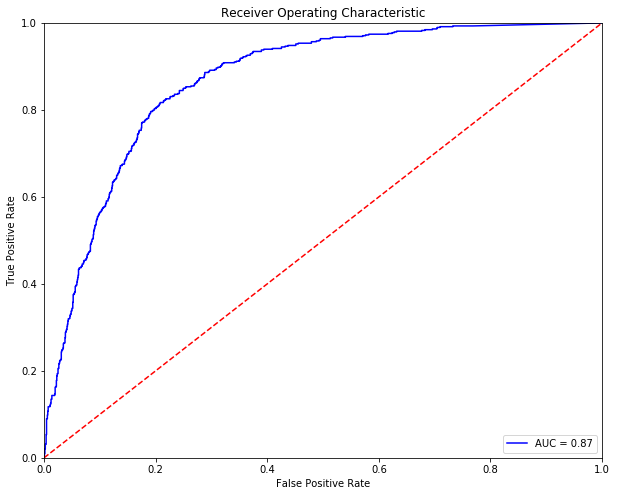

Optimal Threshold is 0.33703282584831007
Accuracy on test data is: 0.8020618556701031


Predicted  False  True  __all__
Actual                         
False       1092   269     1361
True         115   464      579
__all__     1207   733     1940

In [48]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [49]:
table_80_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [50]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.5       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8100515463917526

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4470   959     5429
True         515  1816     2331
__all__     4985  2775     7760

Accuracy of the  Logistic  model for test data is: 0.8077319587628866

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1127   234     1361
True         139   440      579
__all__     1266   674     1940

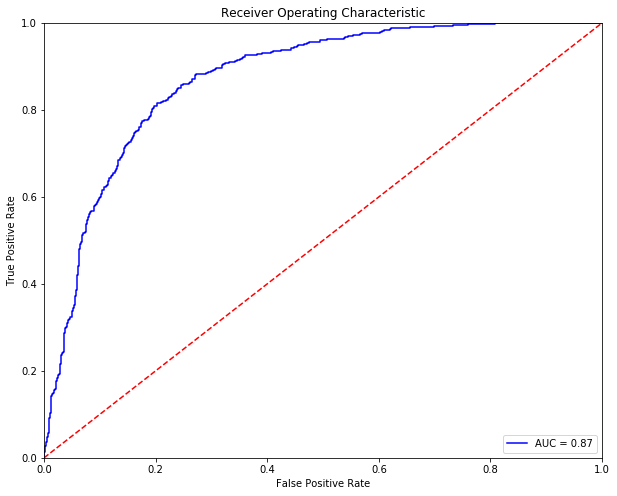

Optimal Threshold is 0.4656559296206444
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         114   465      579
__all__     1209   731     1940

In [51]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [52]:
table_80_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [53]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8117268041237113

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4530   899     5429
True         562  1769     2331
__all__     5092  2668     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8123711340206186

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1145   216     1361
True         148   431      579
__all__     1293   647     1940

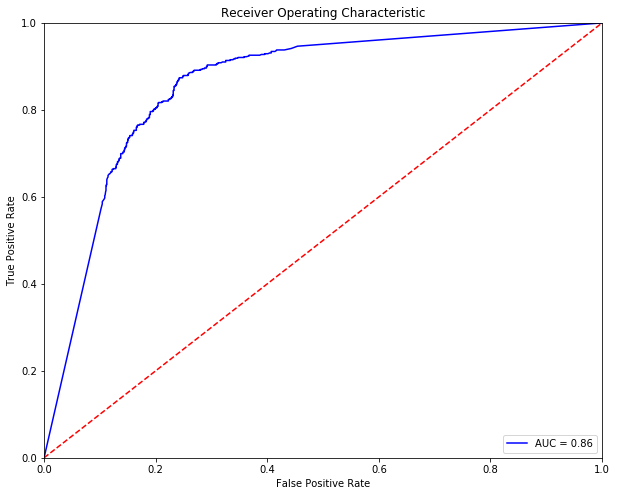

Optimal Threshold is 0.28236453857262184
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         115   464      579
__all__     1206   734     1940

In [54]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [55]:
table_80_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

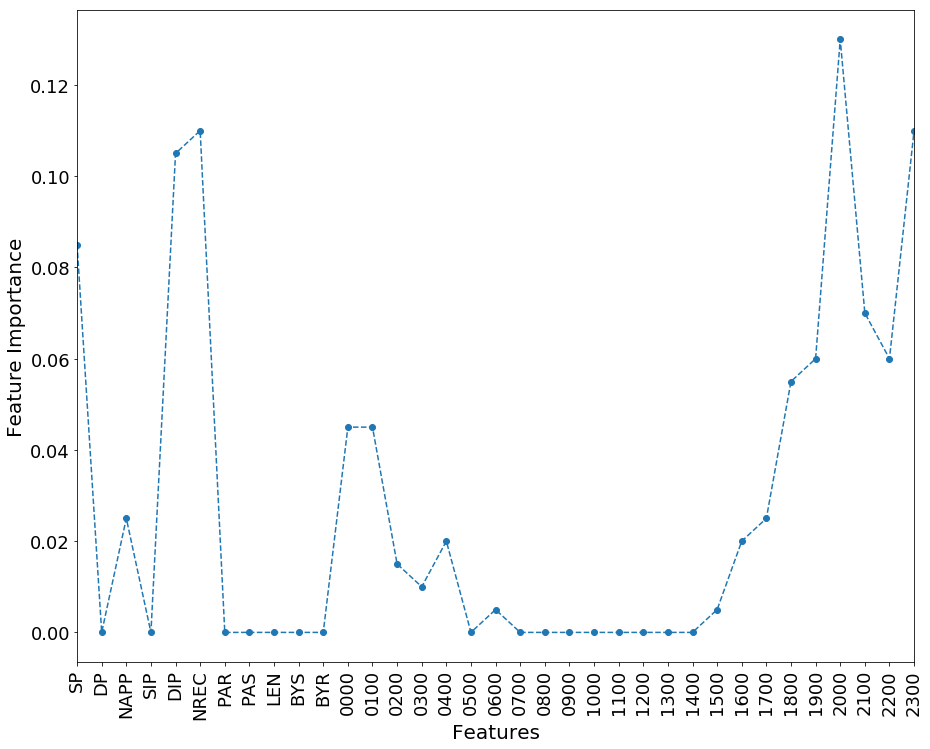

In [56]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [57]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8135309278350515

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4537   892     5429
True         555  1776     2331
__all__     5092  2668     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8139175257731959

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1149   212     1361
True         149   430      579
__all__     1298   642     1940

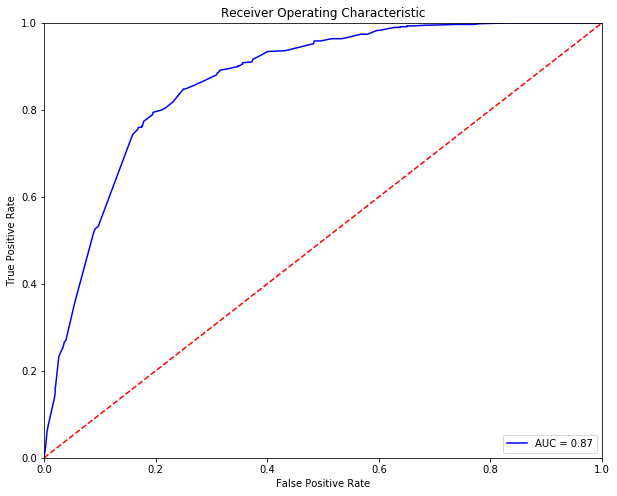

Optimal Threshold is 0.4742855646138773
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         119   460      579
__all__     1214   726     1940

In [58]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [59]:
table_80_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

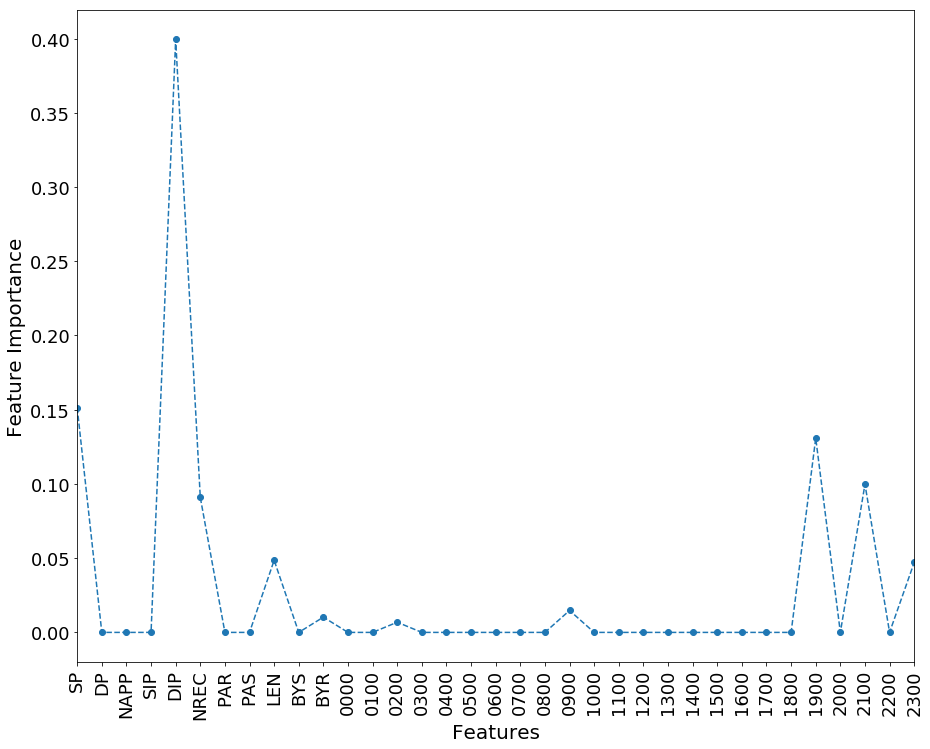

In [60]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [61]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8229381443298969

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4706   723     5429
True         651  1680     2331
__all__     5357  2403     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8149484536082474

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1177   184     1361
True         175   404      579
__all__     1352   588     1940

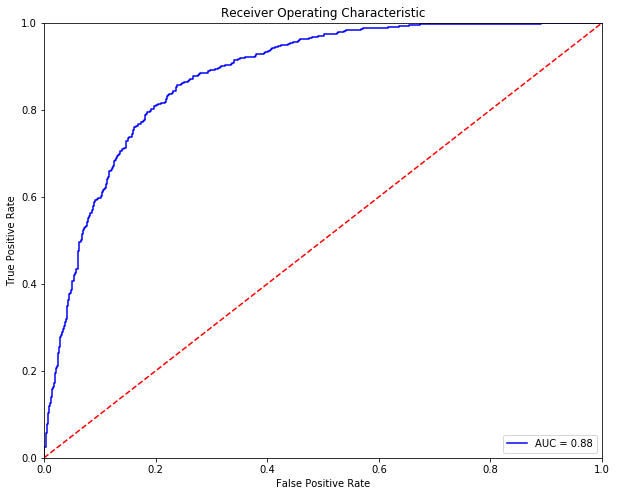

Optimal Threshold is 0.3416070974397493
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         114   465      579
__all__     1209   731     1940

In [62]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [63]:
table_80_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

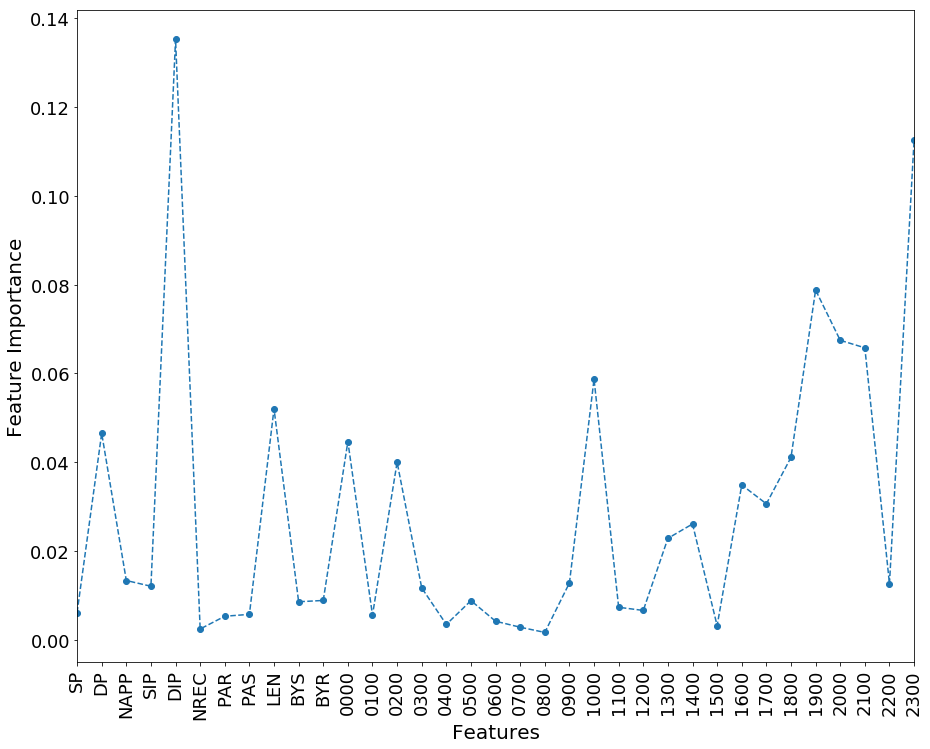

In [64]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [65]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8117268041237113

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4536   893     5429
True         568  1763     2331
__all__     5104  2656     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8103092783505155

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1142   219     1361
True         149   430      579
__all__     1291   649     1940

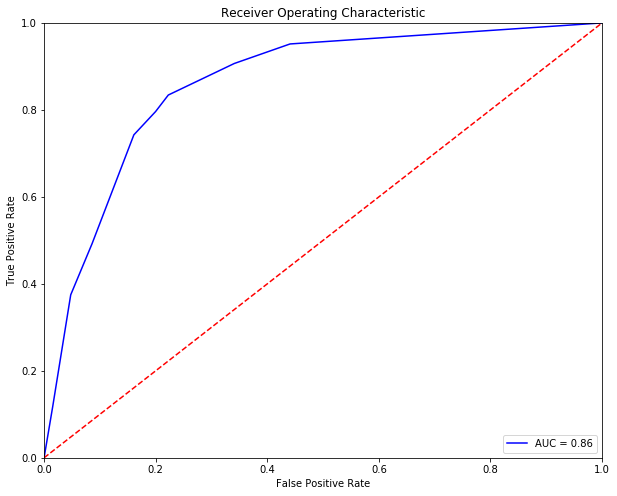

Optimal Threshold is 0.36231884057971014
Accuracy on test data is: 0.8103092783505155


Predicted  False  True  __all__
Actual                         
False       1142   219     1361
True         149   430      579
__all__     1291   649     1940

In [66]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [67]:
table_80_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [68]:
%%capture
table_80_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

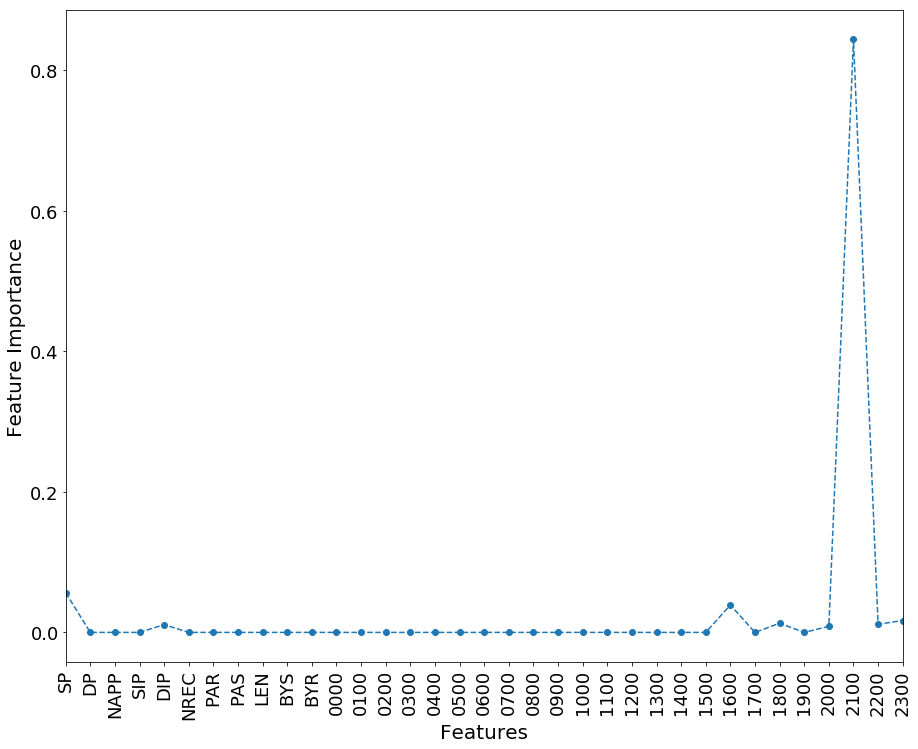

In [69]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 34])
plt.xticks(np.arange(35),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [70]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9480670103092783

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5297   132     5429
True         271  2060     2331
__all__     5568  2192     7760

Accuracy of the  Bagging  model for test data is: 0.8128865979381443

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1172   189     1361
True         174   405      579
__all__     1346   594     1940

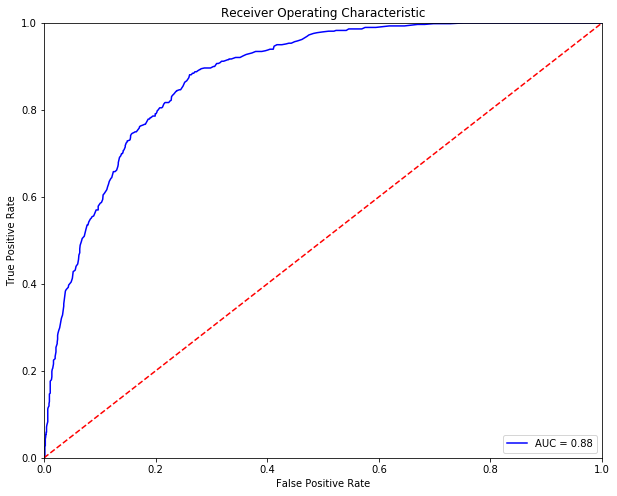

Optimal Threshold is 0.36333333333333334
Accuracy on test data is: 0.7969072164948454


Predicted  False  True  __all__
Actual                         
False       1086   275     1361
True         119   460      579
__all__     1205   735     1940

In [71]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [72]:
table_80_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [73]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9333762886597938


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5290   139     5429
True         378  1953     2331
__all__     5668  2092     7760

The test accuracy is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1195   166     1361
True         200   379      579
__all__     1395   545     1940

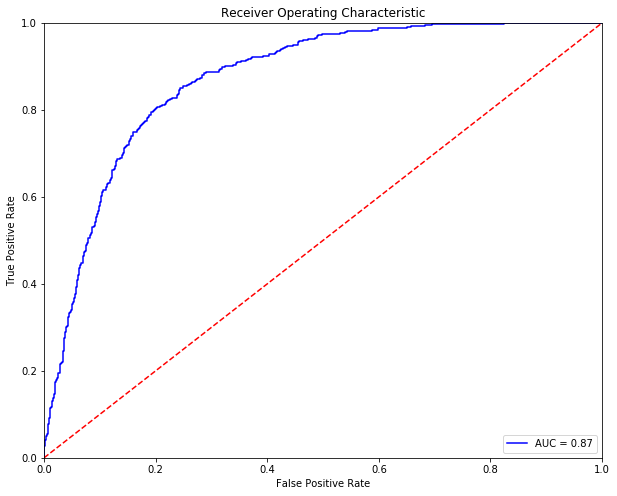

Optimal Threshold is 0.3564355011610755
Accuracy on test data is: 0.8005154639175258


Predicted  False  True  __all__
Actual                         
False       1090   271     1361
True         116   463      579
__all__     1206   734     1940

In [74]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [75]:
table_80_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [76]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9253865979381444


Predicted  False  True  __all__
Actual                         
False       5247   182     5429
True         397  1934     2331
__all__     5644  2116     7760

The accuracy of the model on test data is: 0.7845360824742268


Predicted  False  True  __all__
Actual                         
False       1179   182     1361
True         236   343      579
__all__     1415   525     1940

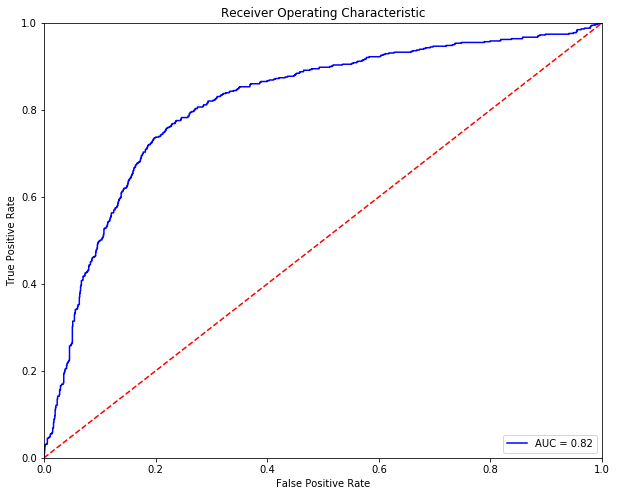

Optimal Threshold is 0.15156844
Accuracy of Logistic Model on training data is: 0.7690721649484537


Predicted  False  True  __all__
Actual                         
False       1048   313     1361
True         135   444      579
__all__     1183   757     1940

In [77]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [78]:
table_80_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [79]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


The accuracy of the model on training data is: 0.8167525773195876


Predicted  False  True  __all__
Actual                         
False       4604   825     5429
True         597  1734     2331
__all__     5201  2559     7760

The accuracy of the model on test data is: 0.8123711340206186


Predicted  False  True  __all__
Actual                         
False       1156   205     1361
True         159   420      579
__all__     1315   625     1940

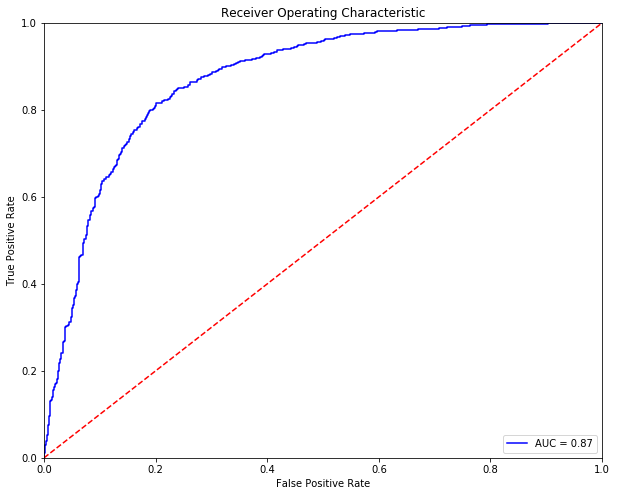

Optimal Threshold is 0.33285555
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         114   465      579
__all__     1209   731     1940

In [80]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [81]:
table_80_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [82]:
table_80_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2331.0  5429.0    0.0    0.0  0.000000   
LogisticRegression          0.810052  1816.0  4470.0  959.0  515.0  0.176644   
RandomForestClassifier      0.811727  1769.0  4530.0  899.0  562.0  0.165592   
AdaBoostClassifier          0.813531  1776.0  4537.0  892.0  555.0  0.164303   
GradientBoostingClassifier  0.822938  1680.0  4706.0  723.0  651.0  0.133174   
ExtraTreeClassifier         0.811727  1763.0  4536.0  893.0  568.0  0.164487   
BaggingClassifier           0.948067  2060.0  5297.0  132.0  271.0  0.024314   
VotingClassifier            0.933376  1953.0  5290.0  139.0  378.0  0.025603   
Neural Network-1            0.925387  1934.0  5247.0  182.0  397.0  0.033524   
Neural-Network-2            0.816753  1734.0  4604.0  825.0  597.0  0.151962   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.220935  
RandomForestClassifier      0.241098  
AdaBoostClassifier          0.238095  
GradientBoostingClassifier  0.279279  
ExtraTreeClassifier         0.243672  
BaggingClassifier           0.116259  
VotingClassifier            0.162162  
Neural Network-1            0.170313  
Neural-Network-2            0.256113

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.805155  387.0  1175.0  186.0  192.0  0.136664   
LogisticRegression          0.807732  440.0  1127.0  234.0  139.0  0.171932   
RandomForestClassifier      0.812371  431.0  1145.0  216.0  148.0  0.158707   
AdaBoostClassifier          0.813918  430.0  1149.0  212.0  149.0  0.155768   
GradientBoostingClassifier  0.814948  404.0  1177.0  184.0  175.0  0.135195   
ExtraTreeClassifier         0.810309  430.0  1142.0  219.0  149.0  0.160911   
BaggingClassifier           0.812887  405.0  1172.0  189.0  174.0  0.138868   
VotingClassifier            0.811340  379.0  1195.0  166.0  200.0  0.121969   
Neural Network-1            0.784536  343.0  1179.0  182.0  236.0  0.133725   
Neural-Network-2            0.812371  420.0  1156.0  205.0  159.0  0.150625   

                                 FNR  
index                                 
KNeighborsClassifier        0.331606  
LogisticRegression          0.240069  
RandomForestClassifier      0.255613  
AdaBoostClassifier          0.257340  
GradientBoostingClassifier  0.302245  
ExtraTreeClassifier         0.257340  
BaggingClassifier           0.300518  
VotingClassifier            0.345423  
Neural Network-1            0.407599  
Neural-Network-2            0.274611

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.802062  464.0  1092.0  269.0  115.0  0.197649   
LogisticRegression          0.804124  465.0  1095.0  266.0  114.0  0.195445   
RandomForestClassifier      0.801546  464.0  1091.0  270.0  115.0  0.198384   
AdaBoostClassifier          0.801546  460.0  1095.0  266.0  119.0  0.195445   
GradientBoostingClassifier  0.804124  465.0  1095.0  266.0  114.0  0.195445   
ExtraTreeClassifier         0.810309  430.0  1142.0  219.0  149.0  0.160911   
BaggingClassifier           0.796907  460.0  1086.0  275.0  119.0  0.202057   
VotingClassifier            0.800515  463.0  1090.0  271.0  116.0  0.199118   
Neural Network-1            0.769072  444.0  1048.0  313.0  135.0  0.229978   
Neural-Network-2            0.804124  465.0  1095.0  266.0  114.0  0.195445   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.198618   0.337033  0.867220  
LogisticRegression          0.196891   0.465656  0.872626  
RandomForestClassifier      0.198618   0.282365  0.859637  
AdaBoostClassifier          0.205527   0.474286  0.865702  
GradientBoostingClassifier  0.196891   0.341607  0.878924  
ExtraTreeClassifier         0.257340   0.362319  0.861682  
BaggingClassifier           0.205527   0.363333  0.881024  
VotingClassifier            0.200345   0.356436  0.871603  
Neural Network-1            0.233161   0.151568  0.815454  
Neural-Network-2            0.196891   0.332856  0.871334

#### Random State 20

In [83]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
columns=X.columns
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   85   2     2    1    5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  358   6    13    8  133   

                                                    NREC        PAR  \
User                                                                  
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...    86   2.523256   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...   363  22.209366   

                                                          PAS        LEN  \
User                                                                       
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   1.813953  30.546512   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  12.785124  63.633609   

                                                            BYS           BYR  \
User                                                                            
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   157.523256   2244.197674   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  2778.881543  24241.719008   

                                                    0000  0100  0200  0300  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6    38     1     5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     2     2     0   

                                                    0400  0500  0600  0700  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     8     1     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    0800  0900  1000  1100  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6     2     2     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1200  1300  1400  1500  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     1     5     6     1   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1600  1700  1800  1900  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     1     0     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0   161    93   

                                                    2000  2100  2200  2300  
User                                                                        
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     0     0     3  
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...    61    44     0     0

In [84]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
b7b1dc23208b771f7f4064f11cb242deabff0b594c5702ed249f7da3aa3c0d46    0
70cf36c3618bc49232d2d2951293abfdb8f7cfa8ec37505b51ceb68a23088d79    1
1c52c8745fb339f5f0fd493068dfa07d99d0b0a4d932a7a81ea14a09c6a2be0c    0
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8b663447ab99229eb2    1
0d3a24dce6ba5dc4fc8acd3ebf2c45634887f641cbb1f8983498e181794a350e    0
Name: Target, dtype: int64

In [85]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [86]:
## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5425     0     5425
True           0  2335     2335
__all__     5425  2335     7760

Accuracy of the  KNN  model for test data is: 0.7984536082474227

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1192   173     1365
True         218   357      575
__all__     1410   530     1940

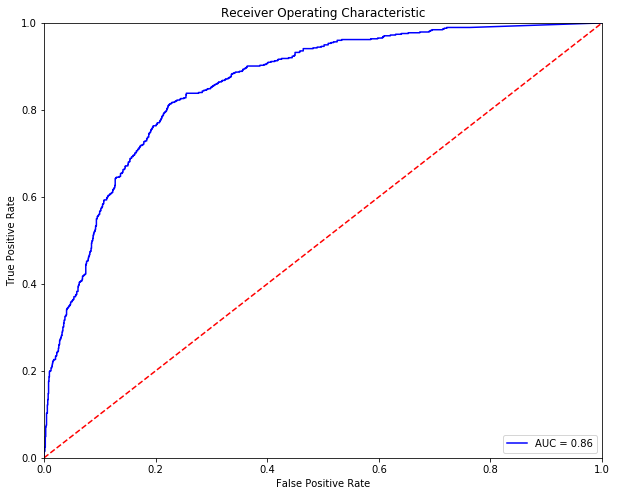

Optimal Threshold is 0.31995813802804446
Accuracy on test data is: 0.7871134020618556


Predicted  False  True  __all__
Actual                         
False       1075   290     1365
True         123   452      575
__all__     1198   742     1940

In [88]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [89]:
table_80_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [90]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.5       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8012886597938145

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4417  1008     5425
True         534  1801     2335
__all__     4951  2809     7760

Accuracy of the  Logistic  model for test data is: 0.7948453608247422

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1120   245     1365
True         153   422      575
__all__     1273   667     1940

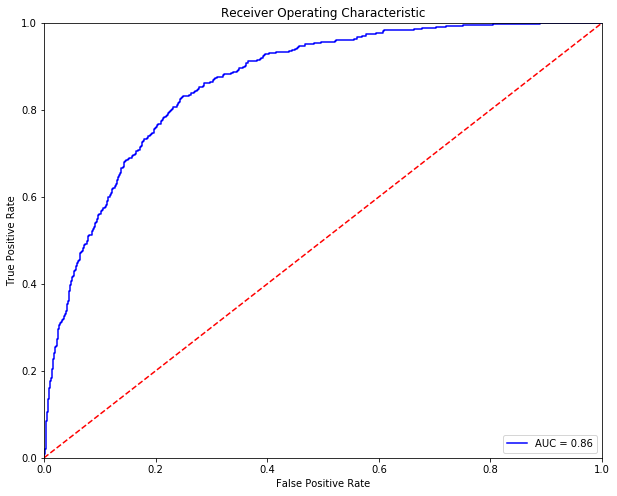

Optimal Threshold is 0.46058665987588454
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False       1070   295     1365
True         125   450      575
__all__     1195   745     1940

In [91]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [92]:
table_80_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [93]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8043814432989691

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4469   956     5425
True         562  1773     2335
__all__     5031  2729     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1132   233     1365
True         155   420      575
__all__     1287   653     1940

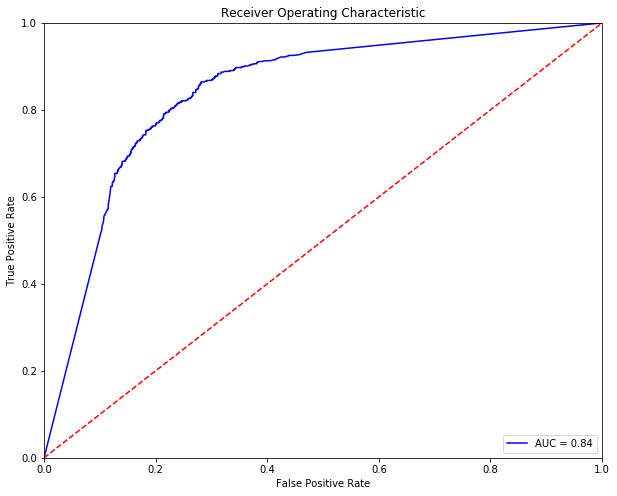

Optimal Threshold is 0.288198830073193
Accuracy on test data is: 0.7860824742268041


Predicted  False  True  __all__
Actual                         
False       1073   292     1365
True         123   452      575
__all__     1196   744     1940

In [94]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [95]:
table_80_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

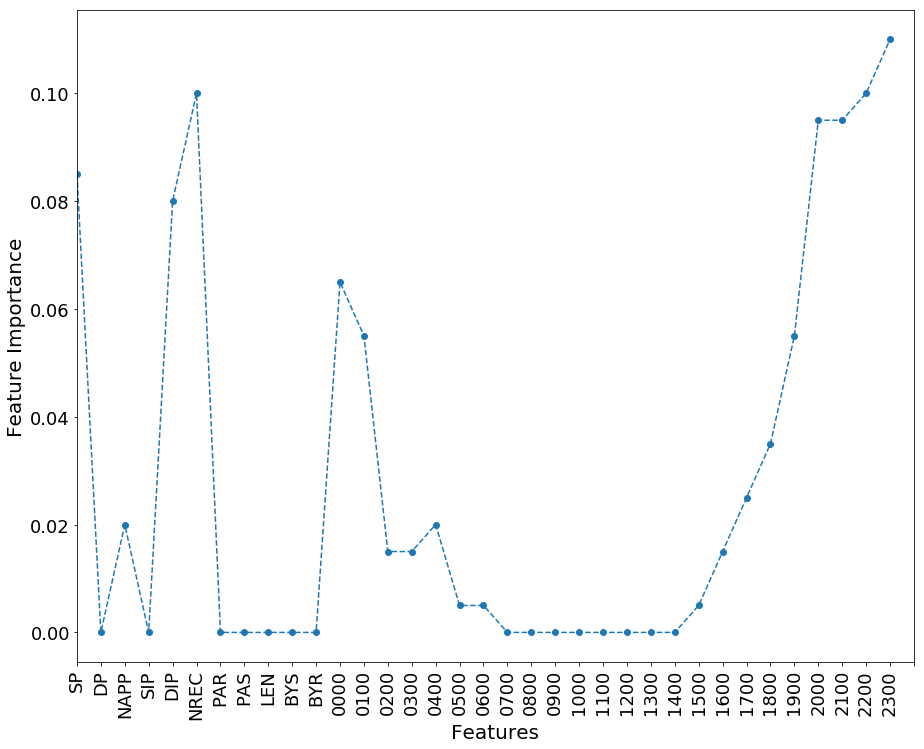

In [96]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [97]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8081185567010309

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4636   789     5425
True         700  1635     2335
__all__     5336  2424     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   197     1365
True         191   384      575
__all__     1359   581     1940

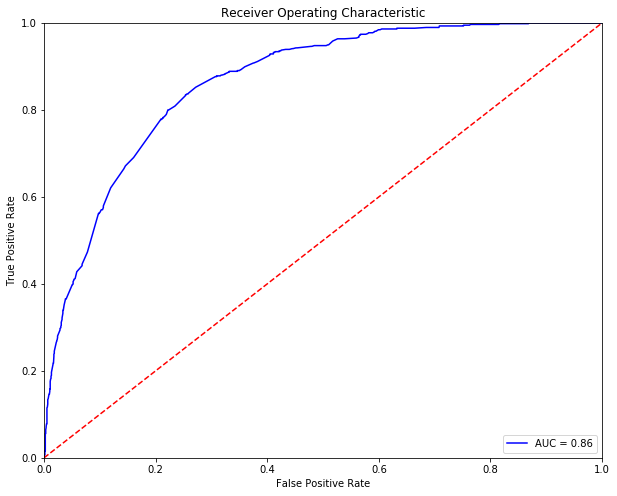

Optimal Threshold is 0.48145596625432624
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         125   450      575
__all__     1199   741     1940

In [98]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [99]:
table_80_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

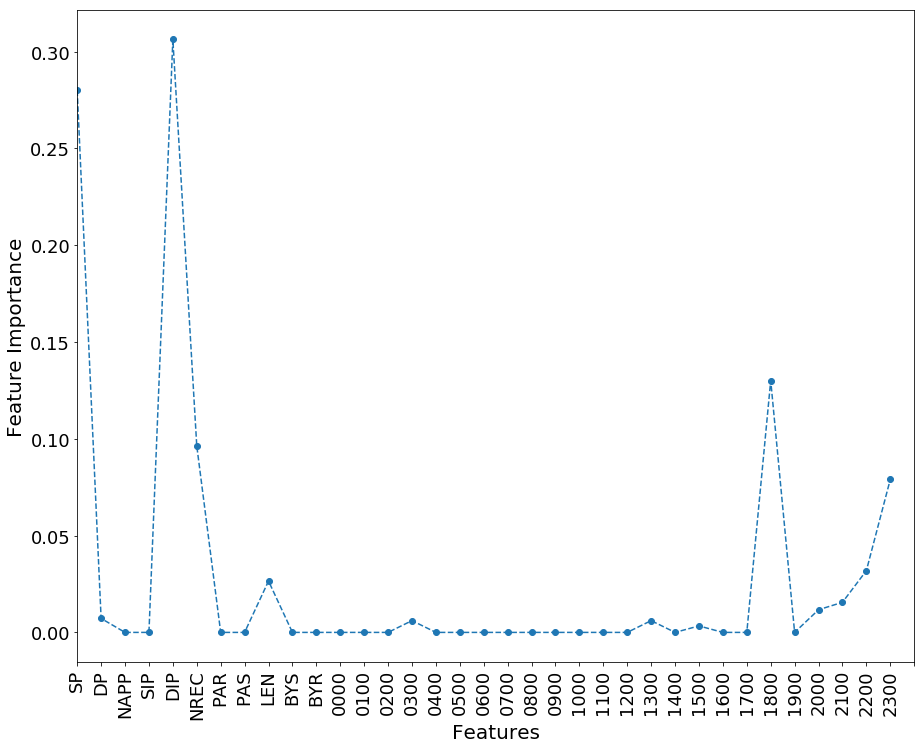

In [100]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [101]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.05  exponential                15   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8204896907216495

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4705   720     5425
True         673  1662     2335
__all__     5378  2382     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8061855670103093

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1180   185     1365
True         191   384      575
__all__     1371   569     1940

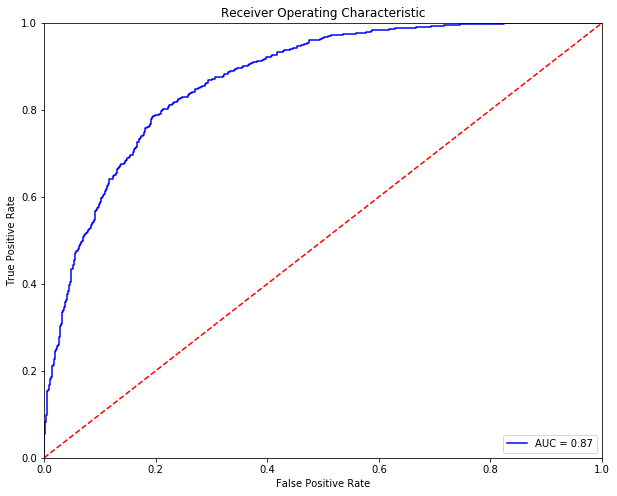

Optimal Threshold is 0.34793016795950626
Accuracy on test data is: 0.7912371134020618


Predicted  False  True  __all__
Actual                         
False       1080   285     1365
True         120   455      575
__all__     1200   740     1940

In [102]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [103]:
table_80_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

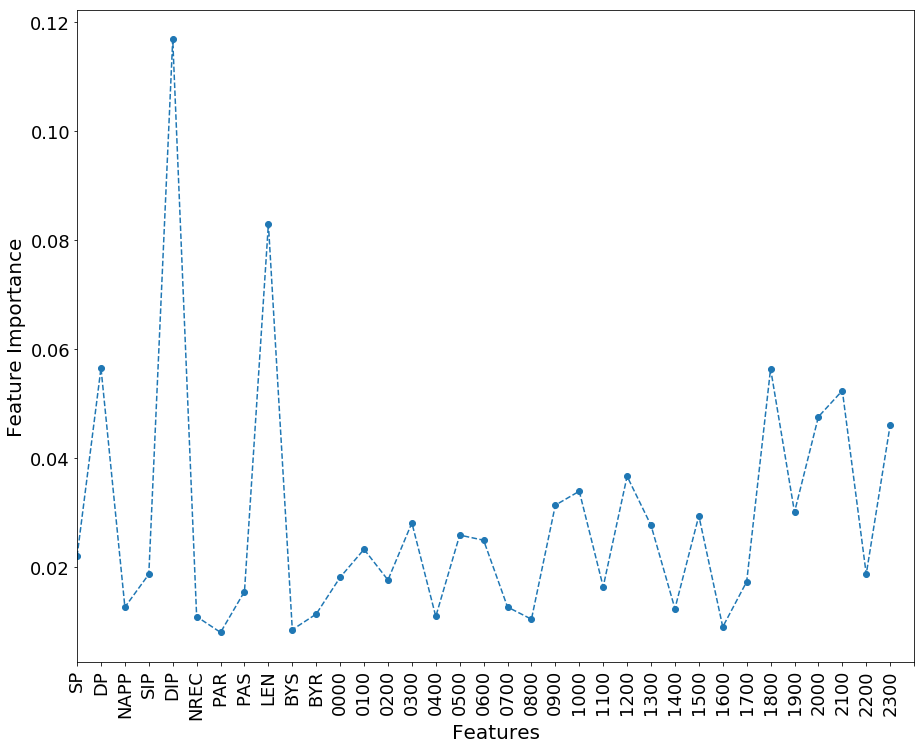

In [104]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [105]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4416  1009     5425
True         543  1792     2335
__all__     4959  2801     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.7917525773195876

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1114   251     1365
True         153   422      575
__all__     1267   673     1940

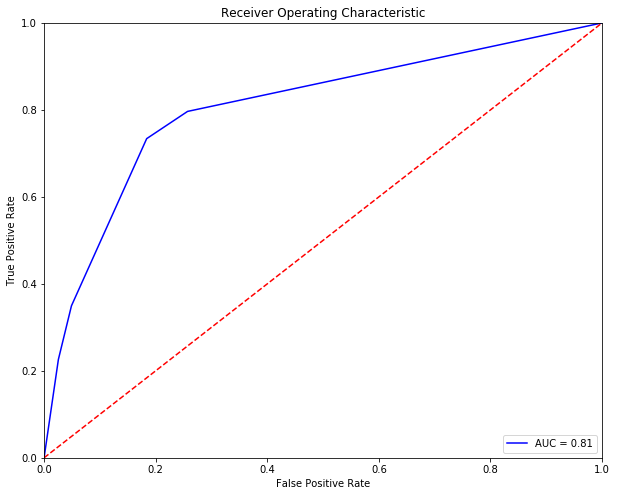

Optimal Threshold is 0.2837370242214533
Accuracy on test data is: 0.7917525773195876


Predicted  False  True  __all__
Actual                         
False       1114   251     1365
True         153   422      575
__all__     1267   673     1940

In [106]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [107]:
table_80_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [108]:
%%capture
table_80_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

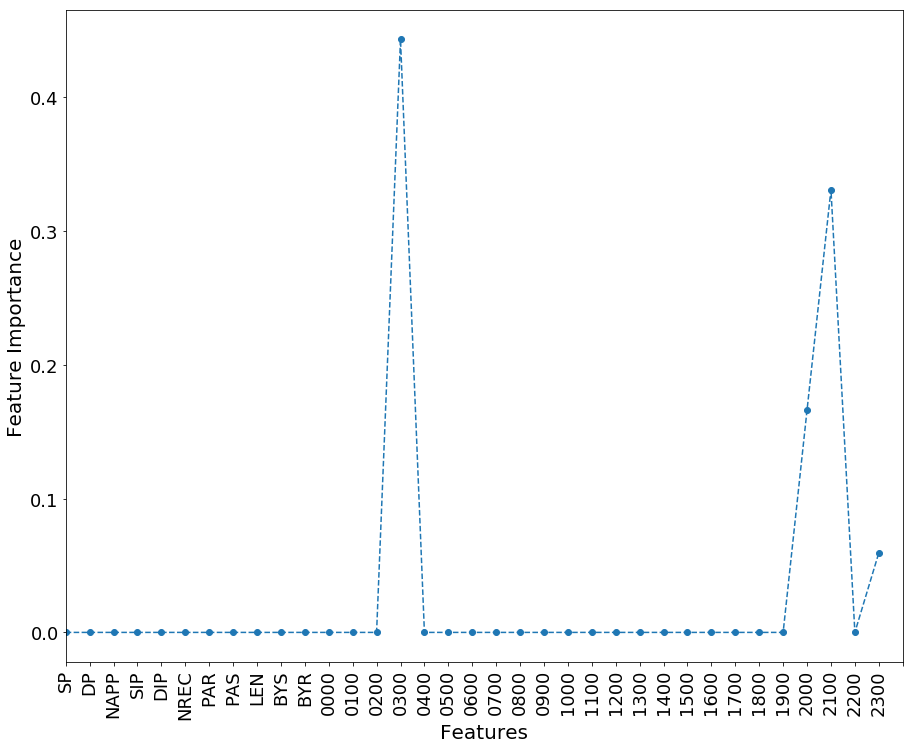

In [109]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [110]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.990979381443299

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5418     7     5425
True          63  2272     2335
__all__     5481  2279     7760

Accuracy of the  Bagging  model for test data is: 0.8015463917525774

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   197     1365
True         188   387      575
__all__     1356   584     1940

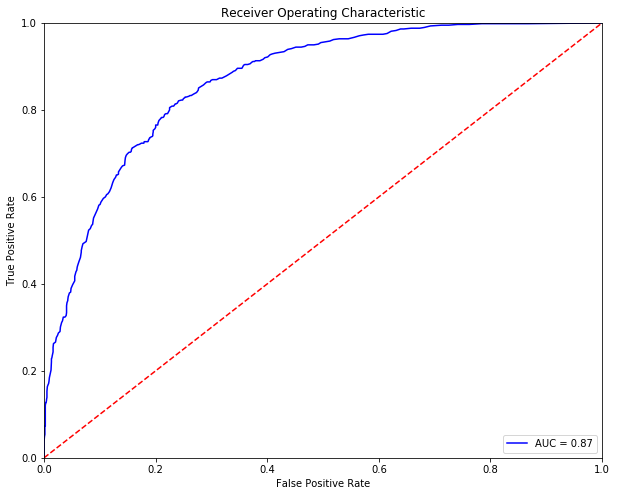

Optimal Threshold is 0.36666666666666664
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         125   450      575
__all__     1199   741     1940

In [111]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [112]:
table_80_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [113]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9326030927835052


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5278   147     5425
True         376  1959     2335
__all__     5654  2106     7760

The test accuracy is: 0.7958762886597938


Predicted  False  True  __all__
Actual                         
False       1188   177     1365
True         219   356      575
__all__     1407   533     1940

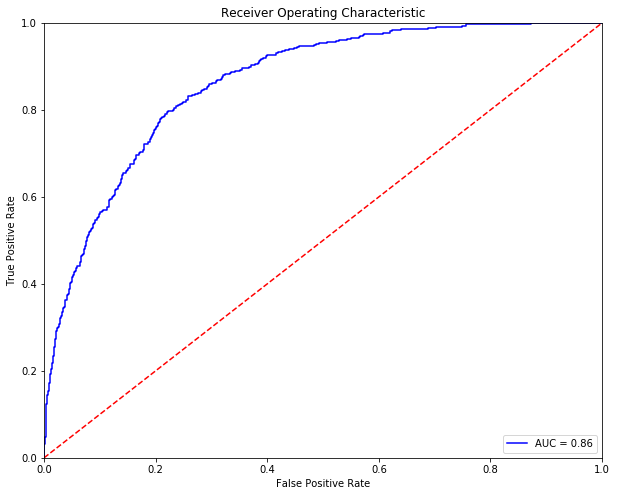

Optimal Threshold is 0.35716245710441424
Accuracy on test data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1072   293     1365
True         124   451      575
__all__     1196   744     1940

In [114]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [115]:
table_80_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [116]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9158505154639175


Predicted  False  True  __all__
Actual                         
False       5205   220     5425
True         433  1902     2335
__all__     5638  2122     7760

The accuracy of the model on test data is: 0.7762886597938145


Predicted  False  True  __all__
Actual                         
False       1162   203     1365
True         231   344      575
__all__     1393   547     1940

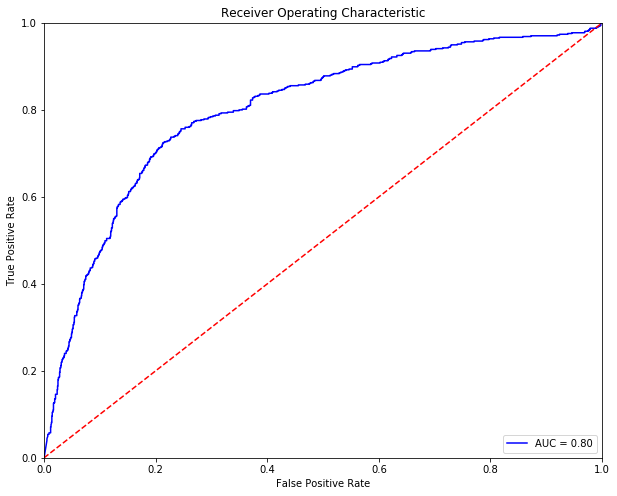

Optimal Threshold is 0.21665955
Accuracy of Logistic Model on training data is: 0.7546391752577319


Predicted  False  True  __all__
Actual                         
False       1030   335     1365
True         141   434      575
__all__     1171   769     1940

In [117]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [118]:
table_80_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [119]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.4min finished


The accuracy of the model on training data is: 0.806958762886598


Predicted  False  True  __all__
Actual                         
False       4502   923     5425
True         575  1760     2335
__all__     5077  2683     7760

The accuracy of the model on test data is: 0.7994845360824743


Predicted  False  True  __all__
Actual                         
False       1138   227     1365
True         162   413      575
__all__     1300   640     1940

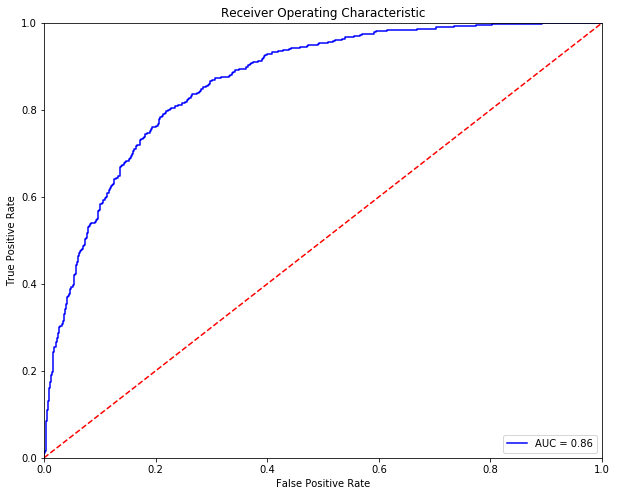

Optimal Threshold is 0.32397097
Accuracy on test data is: 0.7871134020618556


Predicted  False  True  __all__
Actual                         
False       1075   290     1365
True         123   452      575
__all__     1198   742     1940

In [120]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [121]:
table_80_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [122]:
table_80_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN      FP     FN       FPR  \
index                                                                           
KNeighborsClassifier        1.000000  2335.0  5425.0     0.0    0.0  0.000000   
LogisticRegression          0.801289  1801.0  4417.0  1008.0  534.0  0.185806   
RandomForestClassifier      0.804381  1773.0  4469.0   956.0  562.0  0.176221   
AdaBoostClassifier          0.808119  1635.0  4636.0   789.0  700.0  0.145438   
GradientBoostingClassifier  0.820490  1662.0  4705.0   720.0  673.0  0.132719   
ExtraTreeClassifier         0.800000  1792.0  4416.0  1009.0  543.0  0.185991   
BaggingClassifier           0.990979  2272.0  5418.0     7.0   63.0  0.001290   
VotingClassifier            0.932603  1959.0  5278.0   147.0  376.0  0.027097   
Neural Network-1            0.915851  1902.0  5205.0   220.0  433.0  0.040553   
Neural-Network-2            0.806959  1760.0  4502.0   923.0  575.0  0.170138   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.228694  
RandomForestClassifier      0.240685  
AdaBoostClassifier          0.299786  
GradientBoostingClassifier  0.288223  
ExtraTreeClassifier         0.232548  
BaggingClassifier           0.026981  
VotingClassifier            0.161028  
Neural Network-1            0.185439  
Neural-Network-2            0.246253

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.798454  357.0  1192.0  173.0  218.0  0.126740   
LogisticRegression          0.794845  422.0  1120.0  245.0  153.0  0.179487   
RandomForestClassifier      0.800000  420.0  1132.0  233.0  155.0  0.170696   
AdaBoostClassifier          0.800000  384.0  1168.0  197.0  191.0  0.144322   
GradientBoostingClassifier  0.806186  384.0  1180.0  185.0  191.0  0.135531   
ExtraTreeClassifier         0.791753  422.0  1114.0  251.0  153.0  0.183883   
BaggingClassifier           0.801546  387.0  1168.0  197.0  188.0  0.144322   
VotingClassifier            0.795876  356.0  1188.0  177.0  219.0  0.129670   
Neural Network-1            0.776289  344.0  1162.0  203.0  231.0  0.148718   
Neural-Network-2            0.799485  413.0  1138.0  227.0  162.0  0.166300   

                                 FNR  
index                                 
KNeighborsClassifier        0.379130  
LogisticRegression          0.266087  
RandomForestClassifier      0.269565  
AdaBoostClassifier          0.332174  
GradientBoostingClassifier  0.332174  
ExtraTreeClassifier         0.266087  
BaggingClassifier           0.326957  
VotingClassifier            0.380870  
Neural Network-1            0.401739  
Neural-Network-2            0.281739

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.787113  452.0  1075.0  290.0  123.0  0.212454   
LogisticRegression          0.783505  450.0  1070.0  295.0  125.0  0.216117   
RandomForestClassifier      0.786082  452.0  1073.0  292.0  123.0  0.213919   
AdaBoostClassifier          0.785567  450.0  1074.0  291.0  125.0  0.213187   
GradientBoostingClassifier  0.791237  455.0  1080.0  285.0  120.0  0.208791   
ExtraTreeClassifier         0.791753  422.0  1114.0  251.0  153.0  0.183883   
BaggingClassifier           0.785567  450.0  1074.0  291.0  125.0  0.213187   
VotingClassifier            0.785052  451.0  1072.0  293.0  124.0  0.214652   
Neural Network-1            0.754639  434.0  1030.0  335.0  141.0  0.245421   
Neural-Network-2            0.787113  452.0  1075.0  290.0  123.0  0.212454   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.213913   0.319958  0.856829  
LogisticRegression          0.217391   0.460587  0.864185  
RandomForestClassifier      0.213913   0.288199  0.841715  
AdaBoostClassifier          0.217391   0.481456  0.864619  
GradientBoostingClassifier  0.208696   0.347930  0.870639  
ExtraTreeClassifier         0.266087   0.283737  0.806011  
BaggingClassifier           0.217391   0.366667  0.866716  
VotingClassifier            0.215652   0.357162  0.862730  
Neural Network-1            0.245217   0.216660  0.801033  
Neural-Network-2            0.213913   0.323971  0.864978

In [123]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [124]:
table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

In [125]:
table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

In [126]:
table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0

In [127]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.805541  0.179889  0.228554
RandomForestClassifier      0.807345  0.170747  0.243892
AdaBoostClassifier          0.812371  0.147031  0.282657
GradientBoostingClassifier  0.820619  0.132598  0.288778
ExtraTreeClassifier         0.806271  0.159387  0.274375
BaggingClassifier           0.954596  0.021071  0.102460
VotingClassifier            0.933247  0.025272  0.163743
Neural Network-1            0.920361  0.033926  0.186579
Neural-Network-2            0.811040  0.163503  0.248443

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.798969  0.126885  0.372242
LogisticRegression          0.808247  0.169916  0.242485
RandomForestClassifier      0.810653  0.162079  0.252708
AdaBoostClassifier          0.806014  0.146333  0.304103
GradientBoostingClassifier  0.812715  0.134803  0.309088
ExtraTreeClassifier         0.805155  0.157002  0.281520
BaggingClassifier           0.809622  0.139207  0.308992
VotingClassifier            0.803436  0.125204  0.361898
Neural Network-1            0.781443  0.131240  0.420085
Neural-Network-2            0.810481  0.158168  0.262544

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.796048  0.203666  0.204621  0.865346
LogisticRegression          0.798969  0.200667  0.201877  0.873254
RandomForestClassifier      0.800344  0.199421  0.200184  0.856289
AdaBoostClassifier          0.798969  0.199442  0.204755  0.869149
GradientBoostingClassifier  0.802062  0.197728  0.198424  0.878437
ExtraTreeClassifier         0.803952  0.167956  0.260998  0.844569
BaggingClassifier           0.797938  0.200401  0.205865  0.877104
VotingClassifier            0.794674  0.204889  0.206331  0.870011
Neural Network-1            0.759966  0.239621  0.240990  0.806756
Neural-Network-2            0.799656  0.199944  0.201272  0.872522

###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [128]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  4568  42    49   57  1200   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16   4     6    5     7   

                                                    NREC         PAR  \
User                                                                   
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5038  146.820762   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16    5.937500   

                                                          PAS        LEN  \
User                                                                       
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  56.766574  78.731441   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...   9.375000  34.125000   

                                                            BYS  \
User                                                              
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5765.397777   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...  1506.000000   

                                                              BYR  0000  0100  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  184063.583962   578   185   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    3370.125000     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   138   268   205   180   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   149   136   156   104   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   120   158   254   116   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     3     2     0   

                                                    1400  1500  1600  1700  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   207   118   134   215   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   177   142   343   221   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     0     0     0   

                                                    2200  2300  
User                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   295   439  
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0

In [129]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
1f82574ddff42f1b88e62ffb165c3ec923566ba35c529384374b1ba66ef60756    0
ecb38e6cc658213a1e435bcb534a531fef9f8d54b7ec9b27419a1065e19f4f10    0
f7556cb149bd02ef75b3657db80430c61b85847c0cc55c90d7dd6ed6a912d4d1    0
c1084232da26636ffe647ab497b1a09c82db9436937f4898e025587d1e03ad49    0
4ad4b5e8c8f698eabd4fa898c91abb574b6014e24c7e004adae9f209e7ec9b91    1
Name: Target, dtype: int64

In [130]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [131]:
## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4771     0     4771
True           0  2019     2019
__all__     4771  2019     6790

Accuracy of the  KNN  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1789   230     2019
True         337   554      891
__all__     2126   784     2910

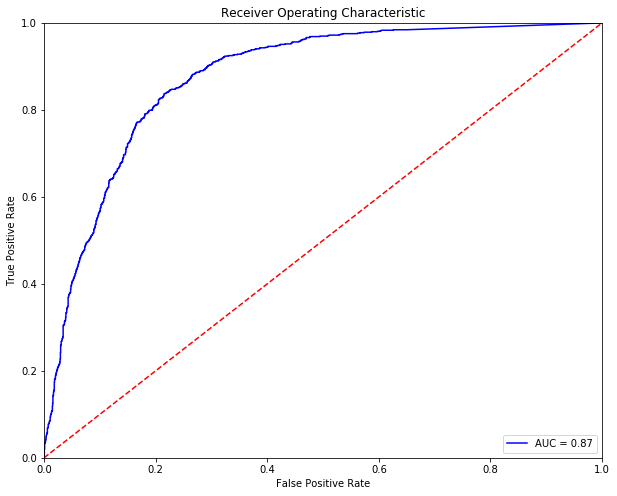

Optimal Threshold is 0.3280563264636047
Accuracy on test data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       1626   393     2019
True         174   717      891
__all__     1800  1110     2910

In [133]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [134]:
table_70_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [135]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.7        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8036818851251841

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3921   850     4771
True         483  1536     2019
__all__     4404  2386     6790

Accuracy of the  Logistic  model for test data is: 0.8219931271477663

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1693   326     2019
True         192   699      891
__all__     1885  1025     2910

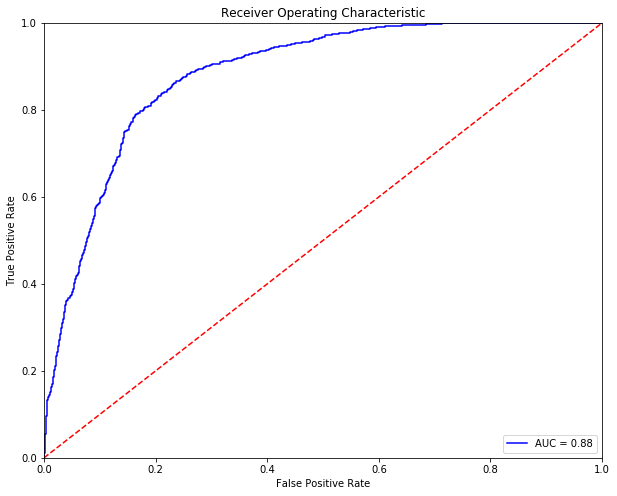

Optimal Threshold is 0.47345742536567864
Accuracy on test data is: 0.8089347079037801


Predicted  False  True  __all__
Actual                         
False       1634   385     2019
True         171   720      891
__all__     1805  1105     2910

In [136]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [137]:
table_70_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [138]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.8047128129602357

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3952   819     4771
True         507  1512     2019
__all__     4459  2331     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1690   329     2019
True         196   695      891
__all__     1886  1024     2910

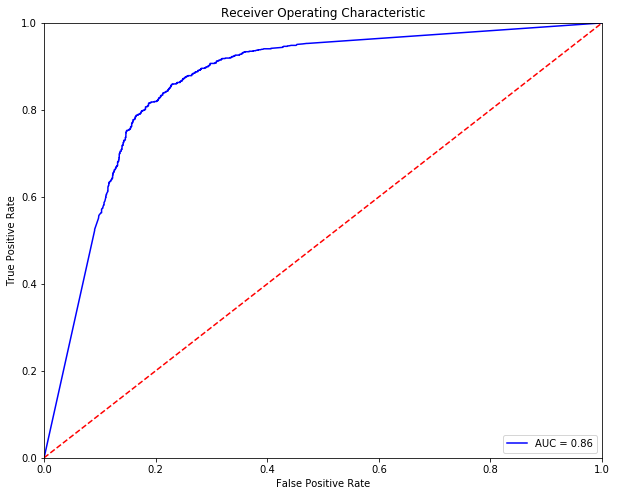

Optimal Threshold is 0.3893607990085983
Accuracy on test data is: 0.8130584192439863


Predicted  False  True  __all__
Actual                         
False       1641   378     2019
True         166   725      891
__all__     1807  1103     2910

In [139]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [140]:
table_70_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

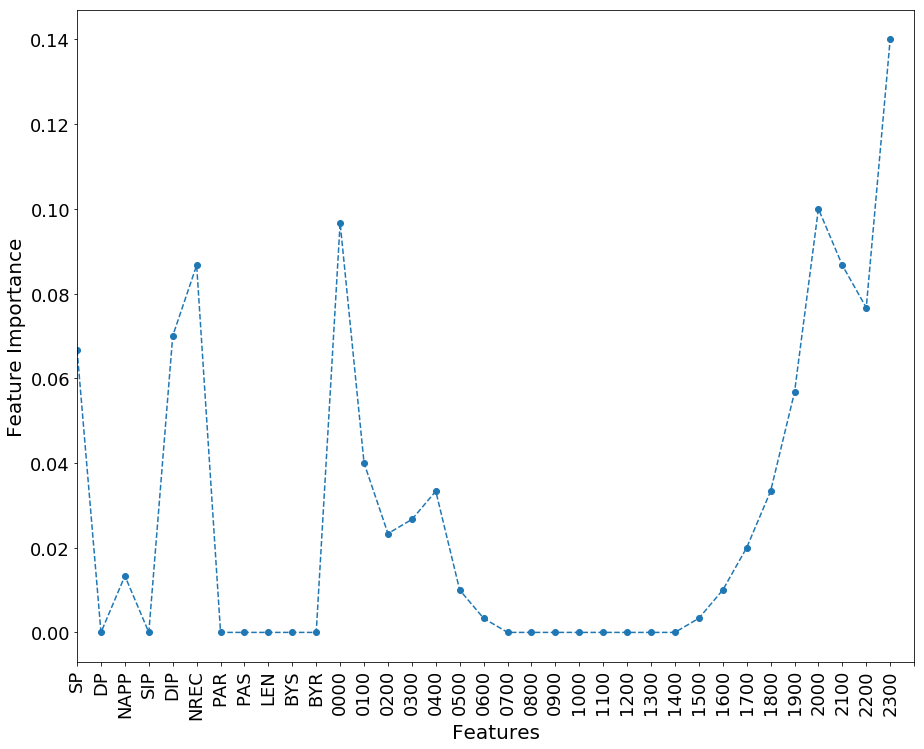

In [141]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [142]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8108983799705449

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4060   711     4771
True         573  1446     2019
__all__     4633  2157     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8017182130584193

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1711   308     2019
True         269   622      891
__all__     1980   930     2910

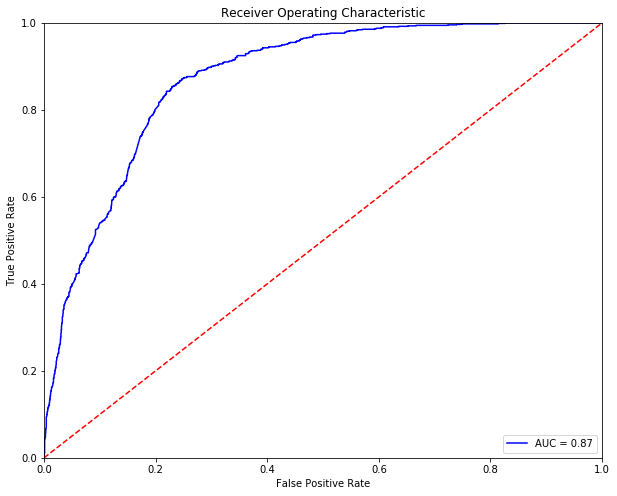

Optimal Threshold is 0.4961965991612081
Accuracy on test data is: 0.8003436426116839


Predicted  False  True  __all__
Actual                         
False       1618   401     2019
True         180   711      891
__all__     1798  1112     2910

In [143]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [144]:
table_70_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

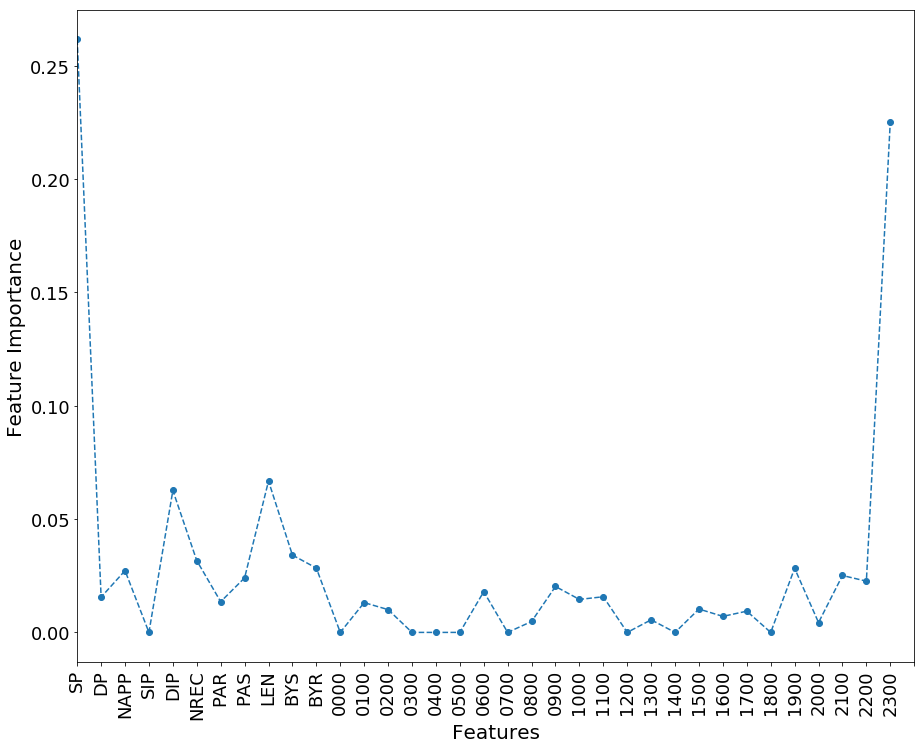

In [145]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [146]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8131075110456554

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4114   657     4771
True         612  1407     2019
__all__     4726  2064     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1750   269     2019
True         256   635      891
__all__     2006   904     2910

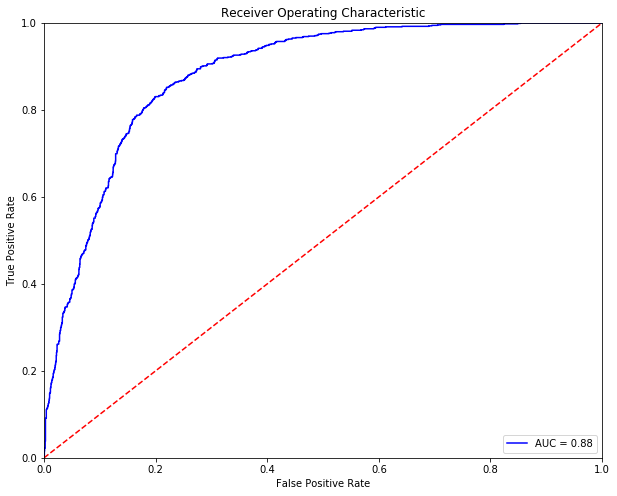

Optimal Threshold is 0.3743887751185962
Accuracy on test data is: 0.8116838487972509


Predicted  False  True  __all__
Actual                         
False       1639   380     2019
True         168   723      891
__all__     1807  1103     2910

In [147]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [148]:
table_70_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

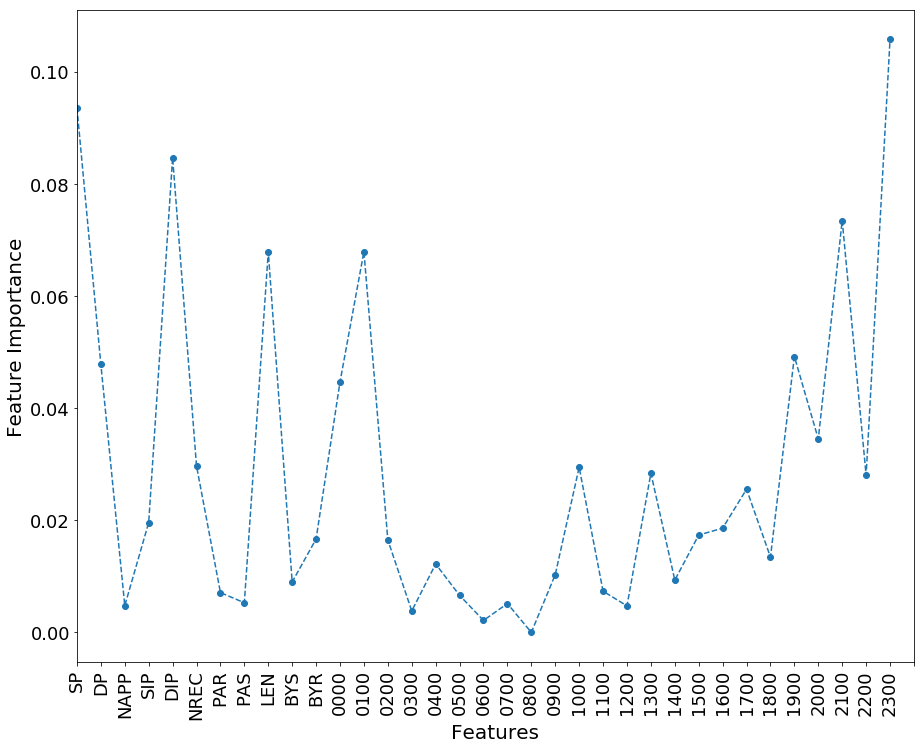

In [149]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [150]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8135493372606775

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4029   742     4771
True         524  1495     2019
__all__     4553  2237     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.8140893470790378

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1713   306     2019
True         235   656      891
__all__     1948   962     2910

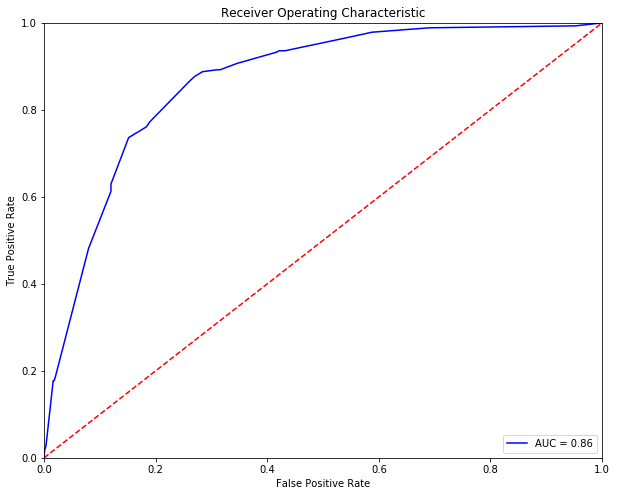

Optimal Threshold is 0.37037037037037035
Accuracy on test data is: 0.7996563573883162


Predicted  False  True  __all__
Actual                         
False       1649   370     2019
True         213   678      891
__all__     1862  1048     2910

In [151]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [152]:
table_70_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [153]:
%%capture
table_70_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

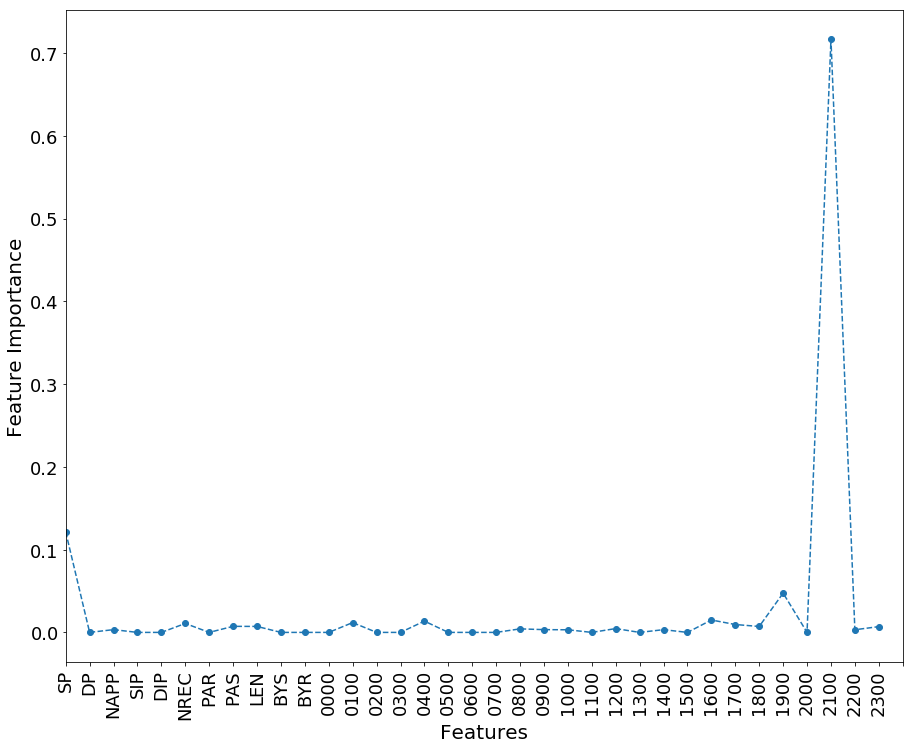

In [154]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [155]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9885125184094257

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4759    12     4771
True          66  1953     2019
__all__     4825  1965     6790

Accuracy of the  Bagging  model for test data is: 0.8130584192439863

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   275     2019
True         269   622      891
__all__     2013   897     2910

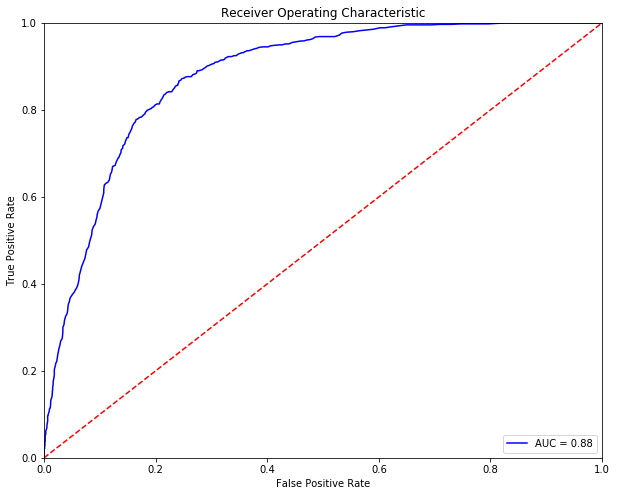

Optimal Threshold is 0.3933333333333333
Accuracy on test data is: 0.8061855670103093


Predicted  False  True  __all__
Actual                         
False       1630   389     2019
True         175   716      891
__all__     1805  1105     2910

In [156]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [157]:
table_70_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [158]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9353460972017673


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4671   100     4771
True         339  1680     2019
__all__     5010  1780     6790

The test accuracy is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1764   255     2019
True         315   576      891
__all__     2079   831     2910

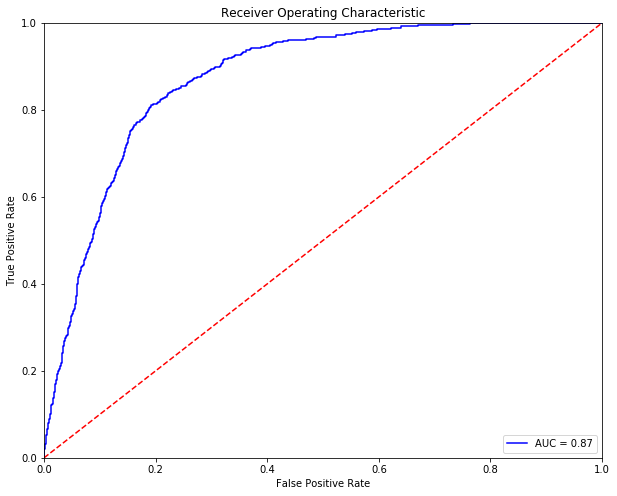

Optimal Threshold is 0.37160235443908196
Accuracy on test data is: 0.8082474226804124


Predicted  False  True  __all__
Actual                         
False       1632   387     2019
True         171   720      891
__all__     1803  1107     2910

In [159]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [160]:
table_70_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [161]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9334315169366716


Predicted  False  True  __all__
Actual                         
False       4640   131     4771
True         321  1698     2019
__all__     4961  1829     6790

The accuracy of the model on test data is: 0.772852233676976


Predicted  False  True  __all__
Actual                         
False       1754   265     2019
True         396   495      891
__all__     2150   760     2910

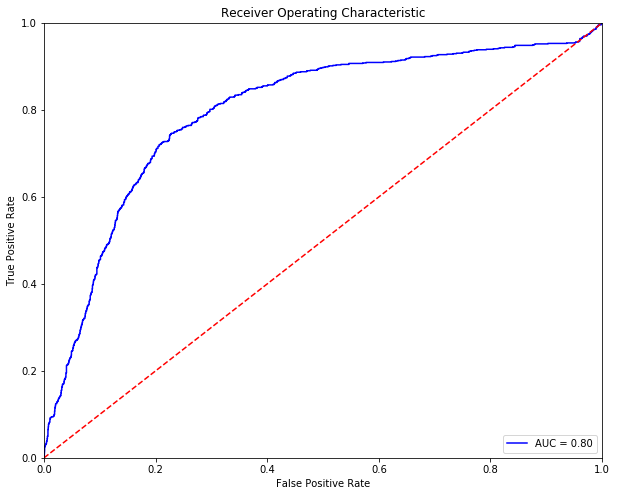

Optimal Threshold is 0.14156958
Accuracy of Logistic Model on training data is: 0.7542955326460481


Predicted  False  True  __all__
Actual                         
False       1523   496     2019
True         219   672      891
__all__     1742  1168     2910

In [162]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [163]:
table_70_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [164]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.0min finished


The accuracy of the model on training data is: 0.8079528718703977


Predicted  False  True  __all__
Actual                         
False       4031   740     4771
True         564  1455     2019
__all__     4595  2195     6790

The accuracy of the model on test data is: 0.820274914089347


Predicted  False  True  __all__
Actual                         
False       1724   295     2019
True         228   663      891
__all__     1952   958     2910

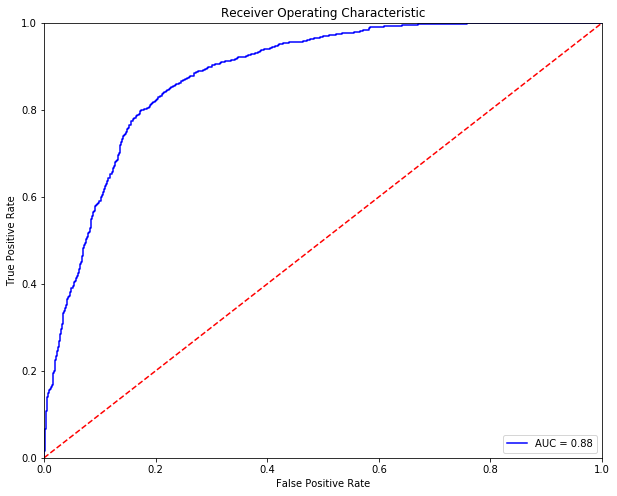

Optimal Threshold is 0.35103238
Accuracy on test data is: 0.8096219931271478


Predicted  False  True  __all__
Actual                         
False       1635   384     2019
True         170   721      891
__all__     1805  1105     2910

In [165]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [166]:
table_70_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [167]:
table_70_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2019.0  4771.0    0.0    0.0  0.000000   
LogisticRegression          0.803682  1536.0  3921.0  850.0  483.0  0.178160   
RandomForestClassifier      0.804713  1512.0  3952.0  819.0  507.0  0.171662   
AdaBoostClassifier          0.810898  1446.0  4060.0  711.0  573.0  0.149025   
GradientBoostingClassifier  0.813108  1407.0  4114.0  657.0  612.0  0.137707   
ExtraTreeClassifier         0.813549  1495.0  4029.0  742.0  524.0  0.155523   
BaggingClassifier           0.988513  1953.0  4759.0   12.0   66.0  0.002515   
VotingClassifier            0.935346  1680.0  4671.0  100.0  339.0  0.020960   
Neural Network-1            0.933432  1698.0  4640.0  131.0  321.0  0.027458   
Neural-Network-2            0.807953  1455.0  4031.0  740.0  564.0  0.155104   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.239227  
RandomForestClassifier      0.251114  
AdaBoostClassifier          0.283804  
GradientBoostingClassifier  0.303120  
ExtraTreeClassifier         0.259534  
BaggingClassifier           0.032689  
VotingClassifier            0.167905  
Neural Network-1            0.158990  
Neural-Network-2            0.279346

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.805155  554.0  1789.0  230.0  337.0  0.113918   
LogisticRegression          0.821993  699.0  1693.0  326.0  192.0  0.161466   
RandomForestClassifier      0.819588  695.0  1690.0  329.0  196.0  0.162952   
AdaBoostClassifier          0.801718  622.0  1711.0  308.0  269.0  0.152551   
GradientBoostingClassifier  0.819588  635.0  1750.0  269.0  256.0  0.133234   
ExtraTreeClassifier         0.814089  656.0  1713.0  306.0  235.0  0.151560   
BaggingClassifier           0.813058  622.0  1744.0  275.0  269.0  0.136206   
VotingClassifier            0.804124  576.0  1764.0  255.0  315.0  0.126300   
Neural Network-1            0.772852  495.0  1754.0  265.0  396.0  0.131253   
Neural-Network-2            0.820275  663.0  1724.0  295.0  228.0  0.146112   

                                 FNR  
index                                 
KNeighborsClassifier        0.378227  
LogisticRegression          0.215488  
RandomForestClassifier      0.219978  
AdaBoostClassifier          0.301908  
GradientBoostingClassifier  0.287318  
ExtraTreeClassifier         0.263749  
BaggingClassifier           0.301908  
VotingClassifier            0.353535  
Neural Network-1            0.444444  
Neural-Network-2            0.255892

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.805155  717.0  1626.0  393.0  174.0  0.194651   
LogisticRegression          0.808935  720.0  1634.0  385.0  171.0  0.190688   
RandomForestClassifier      0.813058  725.0  1641.0  378.0  166.0  0.187221   
AdaBoostClassifier          0.800344  711.0  1618.0  401.0  180.0  0.198613   
GradientBoostingClassifier  0.811684  723.0  1639.0  380.0  168.0  0.188212   
ExtraTreeClassifier         0.799656  678.0  1649.0  370.0  213.0  0.183259   
BaggingClassifier           0.806186  716.0  1630.0  389.0  175.0  0.192670   
VotingClassifier            0.808247  720.0  1632.0  387.0  171.0  0.191679   
Neural Network-1            0.754296  672.0  1523.0  496.0  219.0  0.245666   
Neural-Network-2            0.809622  721.0  1635.0  384.0  170.0  0.190193   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.195286   0.328056  0.874659  
LogisticRegression          0.191919   0.473457  0.881591  
RandomForestClassifier      0.186308   0.389361  0.864460  
AdaBoostClassifier          0.202020   0.496197  0.873102  
GradientBoostingClassifier  0.188552   0.374389  0.882833  
ExtraTreeClassifier         0.239057   0.370370  0.864839  
BaggingClassifier           0.196409   0.393333  0.879012  
VotingClassifier            0.191919   0.371602  0.873833  
Neural Network-1            0.245791   0.141570  0.796421  
Neural-Network-2            0.190797   0.351032  0.881547

#### Random State 10

In [168]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
columns=X.columns
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...   80   8    12    4   37   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  548   8    19    8  205   

                                                    NREC         PAR  \
User                                                                   
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    83  302.084337   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   554  510.418773   

                                                           PAS        LEN  \
User                                                                        
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  170.180723  63.951807   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  159.868231  45.395307   

                                                             BYS  \
User                                                               
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  15306.156627   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  13566.797834   

                                                              BYR  0000  0100  \
User                                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  407432.662651     4     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  655119.371841     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     7     1     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     0     0     7   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    12     5     6     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0   105    10   253   

                                                    1400  1500  1600  1700  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     0     1     3   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   116    23     3     9   

                                                    1800  1900  2000  2100  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     5     3     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...    32     3     0     0   

                                                    2200  2300  
User                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    11     0  
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0

In [169]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target

display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
8886e9eff59dc97d3e4ef930640f3575611e7d41b31f25206c47096baf1f8309    0
9ad35a50636ead336e396b4e528bfa3f70f27723a8ef227b22740fa315b67e4d    1
173b2bd24b74b995aabd9bd3f5474256f85bc6c8445627cd1f9e279eb68a3fa6    1
3505b39af36b00af463d74b2b0188ff81aa512a614c5457537c5a196704341c1    1
455fd634ee53828c893eebbb4693f89e187303778d93d6fbff38a1f76bea18a5    1
Name: Target, dtype: int64

In [170]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [171]:
## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           50  uniform

Accuracy of the  KNN  model for the training data is: 0.8192930780559646

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4148   614     4762
True         613  1415     2028
__all__     4761  2029     6790

Accuracy of the  KNN  model for test data is: 0.8017182130584193

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   284     2028
True         293   589      882
__all__     2037   873     2910

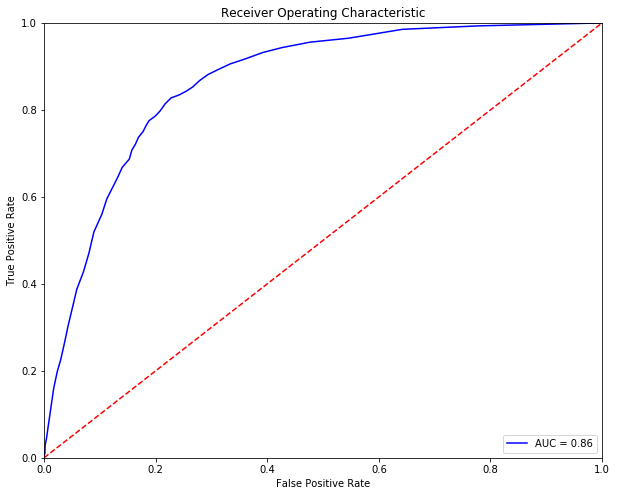

Optimal Threshold is 0.34
Accuracy on test data is: 0.7962199312714776


Predicted  False  True  __all__
Actual                         
False       1624   404     2028
True         189   693      882
__all__     1813  1097     2910

In [173]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [174]:
table_70_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [175]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8151693667157585

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3957   805     4762
True         450  1578     2028
__all__     4407  2383     6790

Accuracy of the  Logistic  model for test data is: 0.8027491408934708

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1667   361     2028
True         213   669      882
__all__     1880  1030     2910

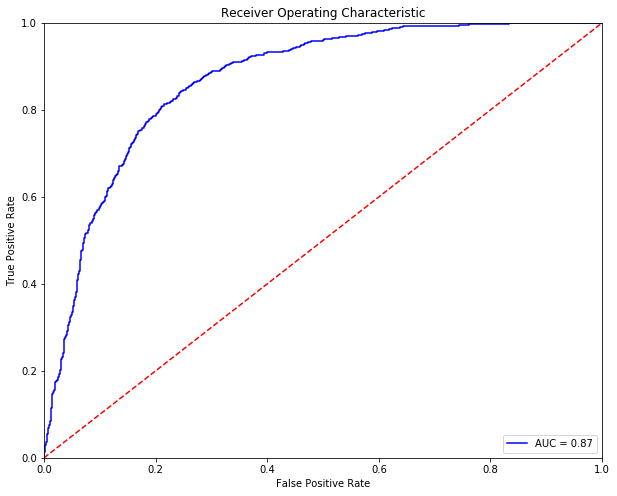

Optimal Threshold is 0.4608624055047913
Accuracy on test data is: 0.7955326460481099


Predicted  False  True  __all__
Actual                         
False       1614   414     2028
True         181   701      882
__all__     1795  1115     2910

In [176]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [177]:
table_70_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [178]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.814580265095729

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3989   773     4762
True         486  1542     2028
__all__     4475  2315     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.806872852233677

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1685   343     2028
True         219   663      882
__all__     1904  1006     2910

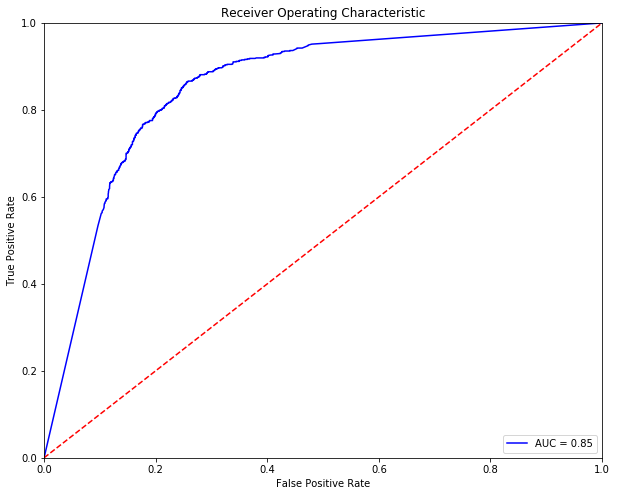

Optimal Threshold is 0.314045789722947
Accuracy on test data is: 0.7965635738831615


Predicted  False  True  __all__
Actual                         
False       1616   412     2028
True         180   702      882
__all__     1796  1114     2910

In [179]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [180]:
table_70_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

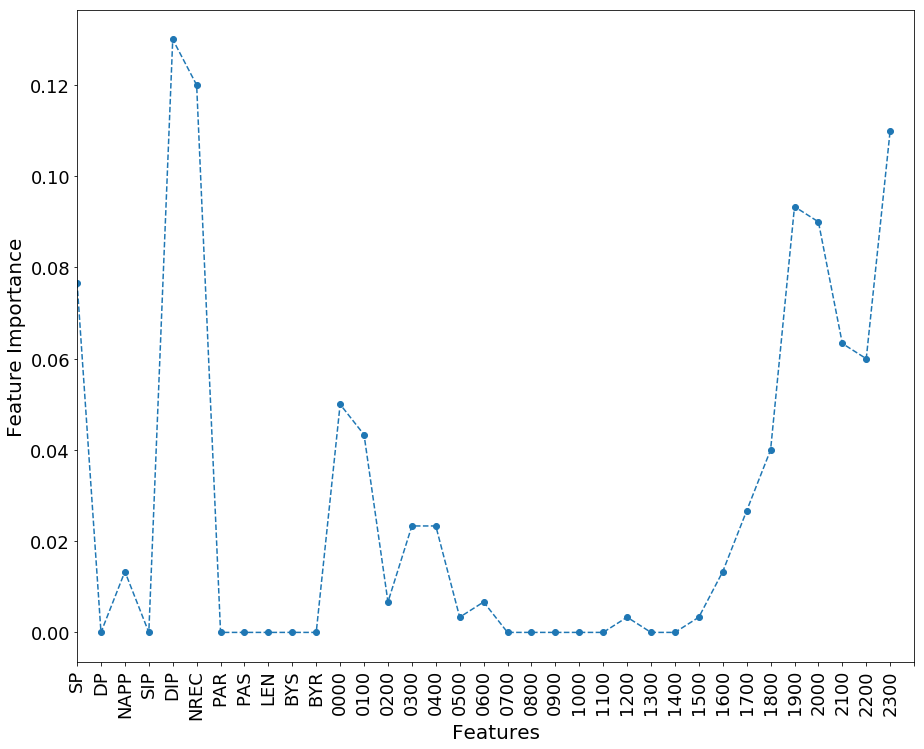

In [181]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [182]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8153166421207658

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3962   800     4762
True         454  1574     2028
__all__     4416  2374     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1674   354     2028
True         221   661      882
__all__     1895  1015     2910

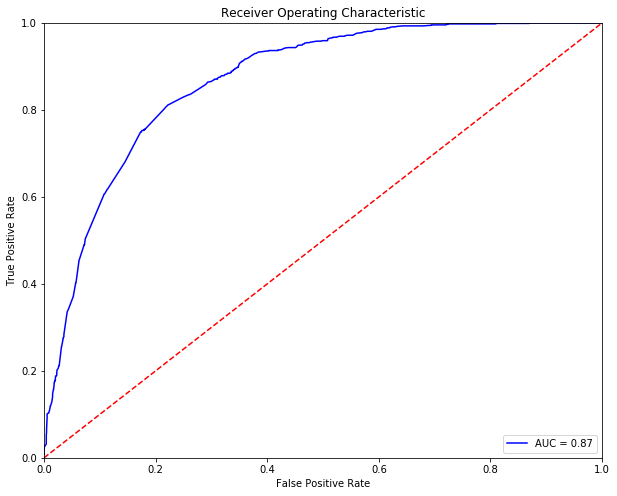

Optimal Threshold is 0.48171434695302473
Accuracy on test data is: 0.7996563573883162


Predicted  False  True  __all__
Actual                         
False       1660   368     2028
True         215   667      882
__all__     1875  1035     2910

In [183]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [184]:
table_70_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

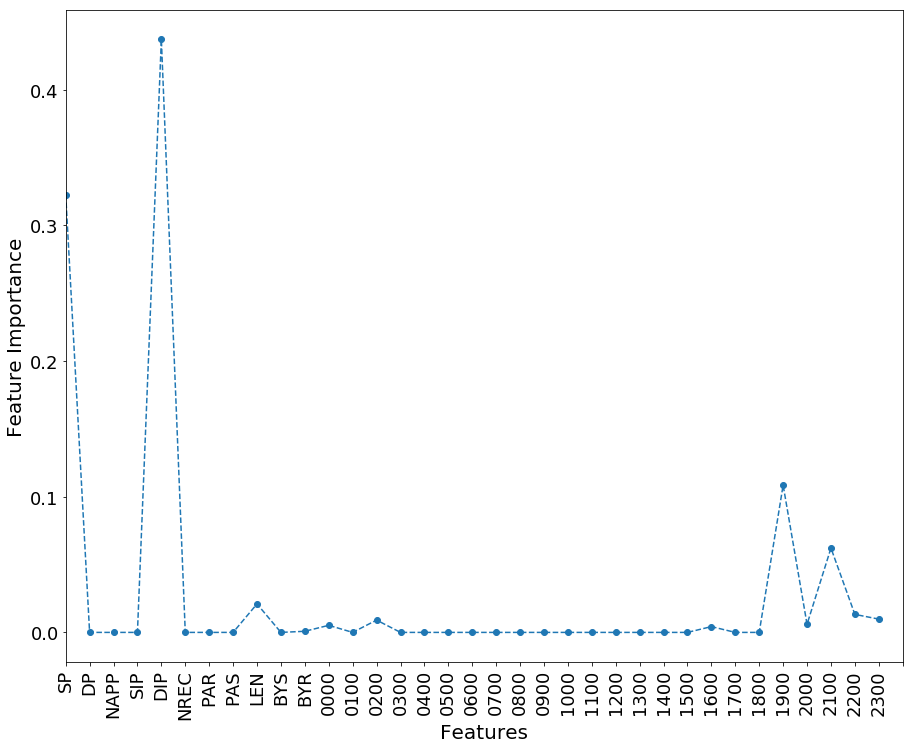

In [185]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [186]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8216494845360824

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4079   683     4762
True         528  1500     2028
__all__     4607  2183     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1724   304     2028
True         257   625      882
__all__     1981   929     2910

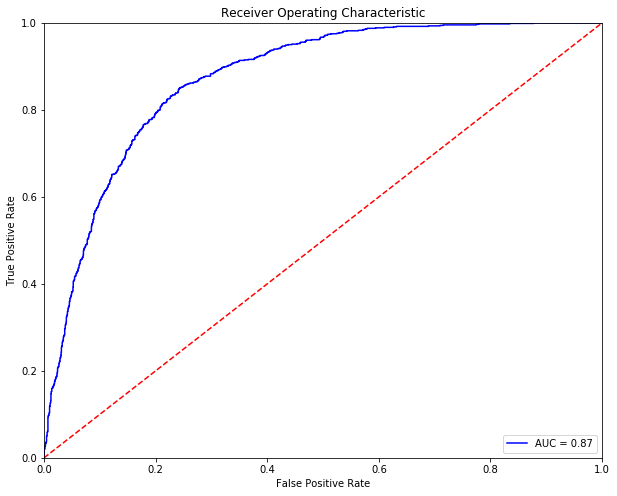

Optimal Threshold is 0.32842629271620616
Accuracy on test data is: 0.7965635738831615


Predicted  False  True  __all__
Actual                         
False       1616   412     2028
True         180   702      882
__all__     1796  1114     2910

In [187]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [188]:
table_70_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

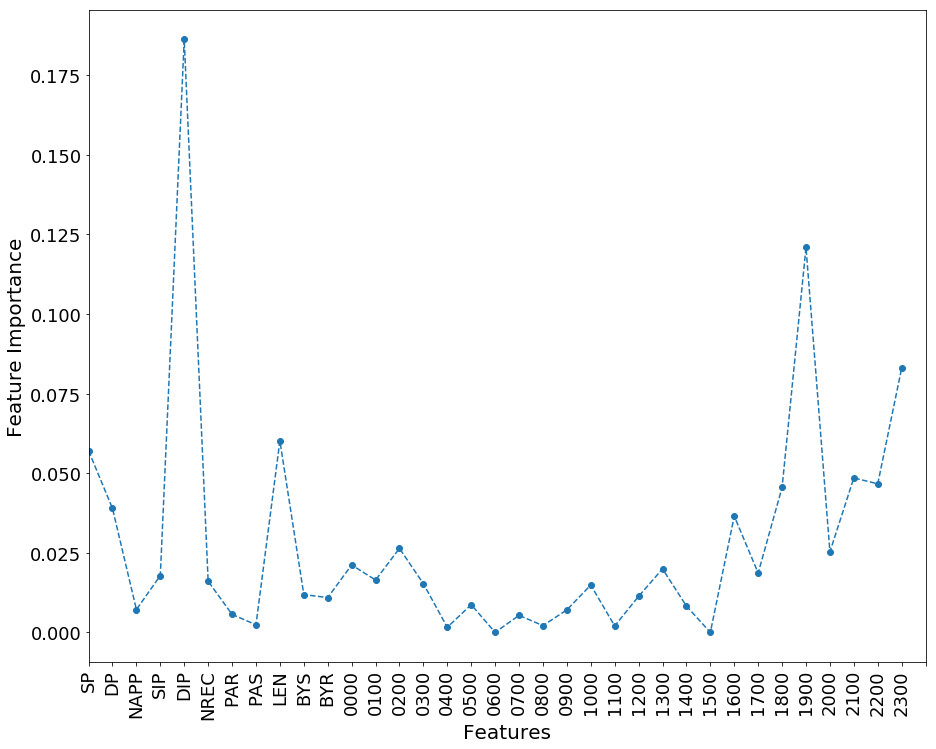

In [189]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [190]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8163475699558174

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4127   635     4762
True         612  1416     2028
__all__     4739  2051     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1732   296     2028
True         274   608      882
__all__     2006   904     2910

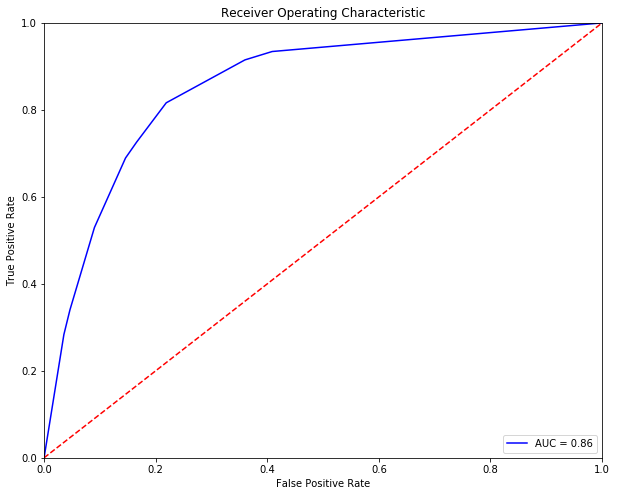

Optimal Threshold is 0.37945492662473795
Accuracy on test data is: 0.8013745704467354


Predicted  False  True  __all__
Actual                         
False       1692   336     2028
True         242   640      882
__all__     1934   976     2910

In [191]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [192]:
table_70_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [193]:
%%capture
table_70_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

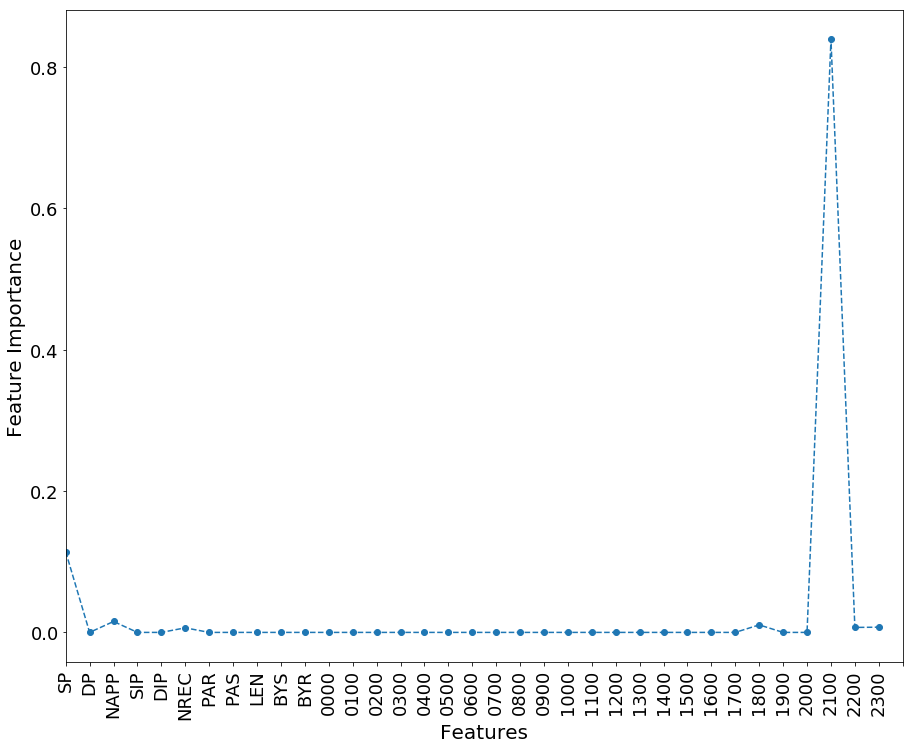

In [194]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [195]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9232695139911635

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4579   183     4762
True         338  1690     2028
__all__     4917  1873     6790

Accuracy of the  Bagging  model for test data is: 0.8048109965635739

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1735   293     2028
True         275   607      882
__all__     2010   900     2910

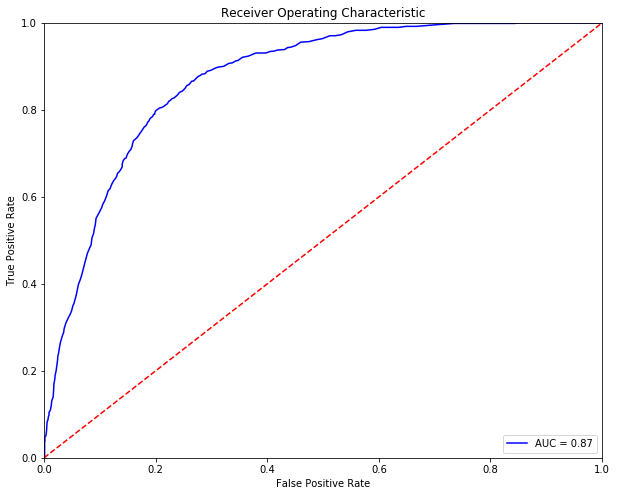

Optimal Threshold is 0.37
Accuracy on test data is: 0.7993127147766323


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         181   701      882
__all__     1806  1104     2910

In [196]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [197]:
table_70_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [198]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9300441826215022


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4626   136     4762
True         339  1689     2028
__all__     4965  1825     6790

The test accuracy is: 0.7986254295532647


Predicted  False  True  __all__
Actual                         
False       1738   290     2028
True         296   586      882
__all__     2034   876     2910

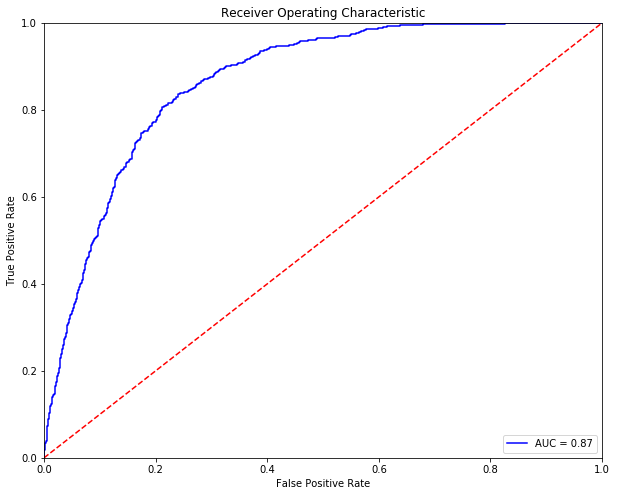

Optimal Threshold is 0.3708012699211579
Accuracy on test data is: 0.7920962199312714


Predicted  False  True  __all__
Actual                         
False       1608   420     2028
True         185   697      882
__all__     1793  1117     2910

In [199]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [200]:
table_70_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [201]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9259204712812961


Predicted  False  True  __all__
Actual                         
False       4639   123     4762
True         380  1648     2028
__all__     5019  1771     6790

The accuracy of the model on test data is: 0.7776632302405498


Predicted  False  True  __all__
Actual                         
False       1761   267     2028
True         380   502      882
__all__     2141   769     2910

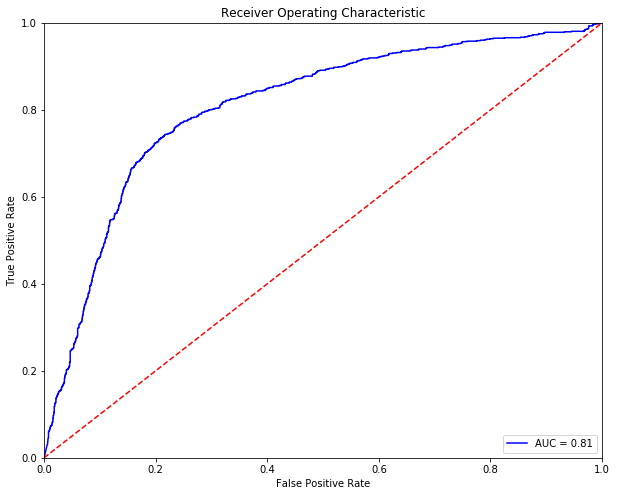

Optimal Threshold is 0.14213434
Accuracy of Logistic Model on training data is: 0.7625429553264604


Predicted  False  True  __all__
Actual                         
False       1547   481     2028
True         210   672      882
__all__     1757  1153     2910

In [202]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [203]:
table_70_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [204]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.8min finished


The accuracy of the model on training data is: 0.8184094256259205


Predicted  False  True  __all__
Actual                         
False       4095   667     4762
True         566  1462     2028
__all__     4661  2129     6790

The accuracy of the model on test data is: 0.8044673539518901


Predicted  False  True  __all__
Actual                         
False       1724   304     2028
True         265   617      882
__all__     1989   921     2910

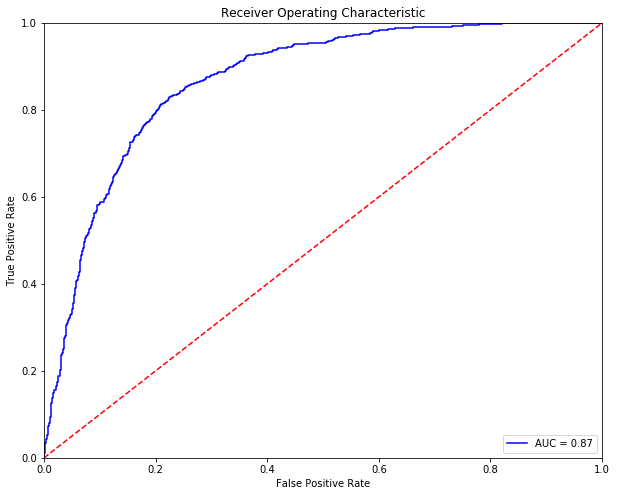

Optimal Threshold is 0.35698774
Accuracy on test data is: 0.797938144329897


Predicted  False  True  __all__
Actual                         
False       1619   409     2028
True         179   703      882
__all__     1798  1112     2910

In [205]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [206]:
table_70_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [207]:
table_70_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.819293  1415.0  4148.0  614.0  613.0  0.128937   
LogisticRegression          0.815169  1578.0  3957.0  805.0  450.0  0.169047   
RandomForestClassifier      0.814580  1542.0  3989.0  773.0  486.0  0.162327   
AdaBoostClassifier          0.815317  1574.0  3962.0  800.0  454.0  0.167997   
GradientBoostingClassifier  0.821649  1500.0  4079.0  683.0  528.0  0.143427   
ExtraTreeClassifier         0.816348  1416.0  4127.0  635.0  612.0  0.133347   
BaggingClassifier           0.923270  1690.0  4579.0  183.0  338.0  0.038429   
VotingClassifier            0.930044  1689.0  4626.0  136.0  339.0  0.028559   
Neural Network-1            0.925920  1648.0  4639.0  123.0  380.0  0.025829   
Neural-Network-2            0.818409  1462.0  4095.0  667.0  566.0  0.140067   

                                 FNR  
index                                 
KNeighborsClassifier        0.302268  
LogisticRegression          0.221893  
RandomForestClassifier      0.239645  
AdaBoostClassifier          0.223866  
GradientBoostingClassifier  0.260355  
ExtraTreeClassifier         0.301775  
BaggingClassifier           0.166667  
VotingClassifier            0.167160  
Neural Network-1            0.187377  
Neural-Network-2            0.279093

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.801718  589.0  1744.0  284.0  293.0  0.140039   
LogisticRegression          0.802749  669.0  1667.0  361.0  213.0  0.178008   
RandomForestClassifier      0.806873  663.0  1685.0  343.0  219.0  0.169132   
AdaBoostClassifier          0.802405  661.0  1674.0  354.0  221.0  0.174556   
GradientBoostingClassifier  0.807216  625.0  1724.0  304.0  257.0  0.149901   
ExtraTreeClassifier         0.804124  608.0  1732.0  296.0  274.0  0.145957   
BaggingClassifier           0.804811  607.0  1735.0  293.0  275.0  0.144477   
VotingClassifier            0.798625  586.0  1738.0  290.0  296.0  0.142998   
Neural Network-1            0.777663  502.0  1761.0  267.0  380.0  0.131657   
Neural-Network-2            0.804467  617.0  1724.0  304.0  265.0  0.149901   

                                 FNR  
index                                 
KNeighborsClassifier        0.332200  
LogisticRegression          0.241497  
RandomForestClassifier      0.248299  
AdaBoostClassifier          0.250567  
GradientBoostingClassifier  0.291383  
ExtraTreeClassifier         0.310658  
BaggingClassifier           0.311791  
VotingClassifier            0.335601  
Neural Network-1            0.430839  
Neural-Network-2            0.300454

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.796220  693.0  1624.0  404.0  189.0  0.199211   
LogisticRegression          0.795533  701.0  1614.0  414.0  181.0  0.204142   
RandomForestClassifier      0.796564  702.0  1616.0  412.0  180.0  0.203156   
AdaBoostClassifier          0.799656  667.0  1660.0  368.0  215.0  0.181460   
GradientBoostingClassifier  0.796564  702.0  1616.0  412.0  180.0  0.203156   
ExtraTreeClassifier         0.801375  640.0  1692.0  336.0  242.0  0.165680   
BaggingClassifier           0.799313  701.0  1625.0  403.0  181.0  0.198718   
VotingClassifier            0.792096  697.0  1608.0  420.0  185.0  0.207101   
Neural Network-1            0.762543  672.0  1547.0  481.0  210.0  0.237179   
Neural-Network-2            0.797938  703.0  1619.0  409.0  179.0  0.201677   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.214286   0.340000  0.864378  
LogisticRegression          0.205215   0.460862  0.868153  
RandomForestClassifier      0.204082   0.314046  0.854945  
AdaBoostClassifier          0.243764   0.481714  0.868278  
GradientBoostingClassifier  0.204082   0.328426  0.872532  
ExtraTreeClassifier         0.274376   0.379455  0.855462  
BaggingClassifier           0.205215   0.370000  0.870468  
VotingClassifier            0.209751   0.370801  0.865523  
Neural Network-1            0.238095   0.142134  0.807756  
Neural-Network-2            0.202948   0.356988  0.868400

#### Random State 20

In [208]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   85   2     2    1    5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  358   6    13    8  133   

                                                    NREC        PAR  \
User                                                                  
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...    86   2.523256   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...   363  22.209366   

                                                          PAS        LEN  \
User                                                                       
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   1.813953  30.546512   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  12.785124  63.633609   

                                                            BYS           BYR  \
User                                                                            
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   157.523256   2244.197674   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  2778.881543  24241.719008   

                                                    0000  0100  0200  0300  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6    38     1     5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     2     2     0   

                                                    0400  0500  0600  0700  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     8     1     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    0800  0900  1000  1100  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6     2     2     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1200  1300  1400  1500  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     1     5     6     1   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1600  1700  1800  1900  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     1     0     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0   161    93   

                                                    2000  2100  2200  2300  
User                                                                        
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     0     0     3  
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...    61    44     0     0

In [209]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
b7b1dc23208b771f7f4064f11cb242deabff0b594c5702ed249f7da3aa3c0d46    0
70cf36c3618bc49232d2d2951293abfdb8f7cfa8ec37505b51ceb68a23088d79    1
1c52c8745fb339f5f0fd493068dfa07d99d0b0a4d932a7a81ea14a09c6a2be0c    0
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8b663447ab99229eb2    1
0d3a24dce6ba5dc4fc8acd3ebf2c45634887f641cbb1f8983498e181794a350e    0
Name: Target, dtype: int64

In [210]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [211]:
## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4760     0     4760
True           0  2030     2030
__all__     4760  2030     6790

Accuracy of the  KNN  model for test data is: 0.8006872852233677

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1799   231     2030
True         349   531      880
__all__     2148   762     2910

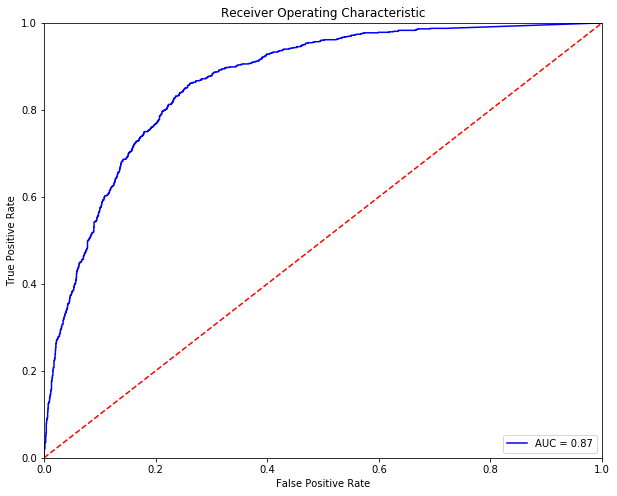

Optimal Threshold is 0.3153641429614048
Accuracy on test data is: 0.7900343642611684


Predicted  False  True  __all__
Actual                         
False       1604   426     2030
True         185   695      880
__all__     1789  1121     2910

In [213]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [214]:
table_70_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [215]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.7       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3866   894     4760
True         464  1566     2030
__all__     4330  2460     6790

Accuracy of the  Logistic  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1666   364     2030
True         218   662      880
__all__     1884  1026     2910

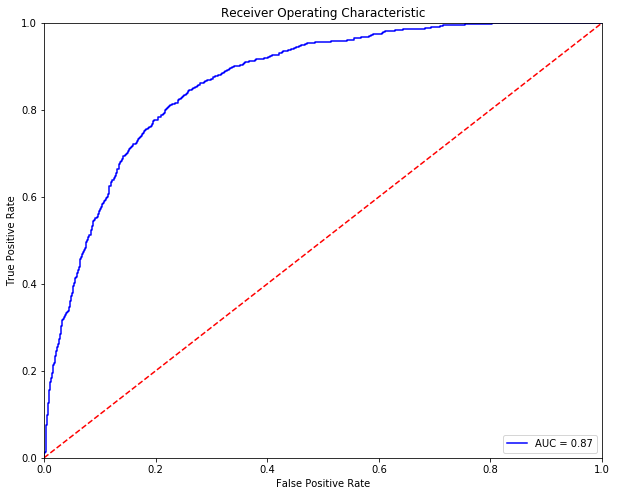

Optimal Threshold is 0.464982402055842
Accuracy on test data is: 0.7879725085910653


Predicted  False  True  __all__
Actual                         
False       1600   430     2030
True         187   693      880
__all__     1787  1123     2910

In [216]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [217]:
table_70_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [218]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.80279823269514

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3897   863     4760
True         476  1554     2030
__all__     4373  2417     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1687   343     2030
True         224   656      880
__all__     1911   999     2910

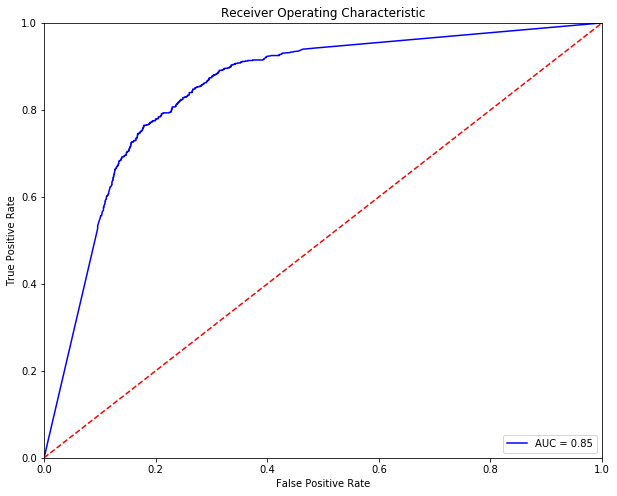

Optimal Threshold is 0.3008433745478374
Accuracy on test data is: 0.7896907216494845


Predicted  False  True  __all__
Actual                         
False       1603   427     2030
True         185   695      880
__all__     1788  1122     2910

In [219]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [220]:
table_70_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

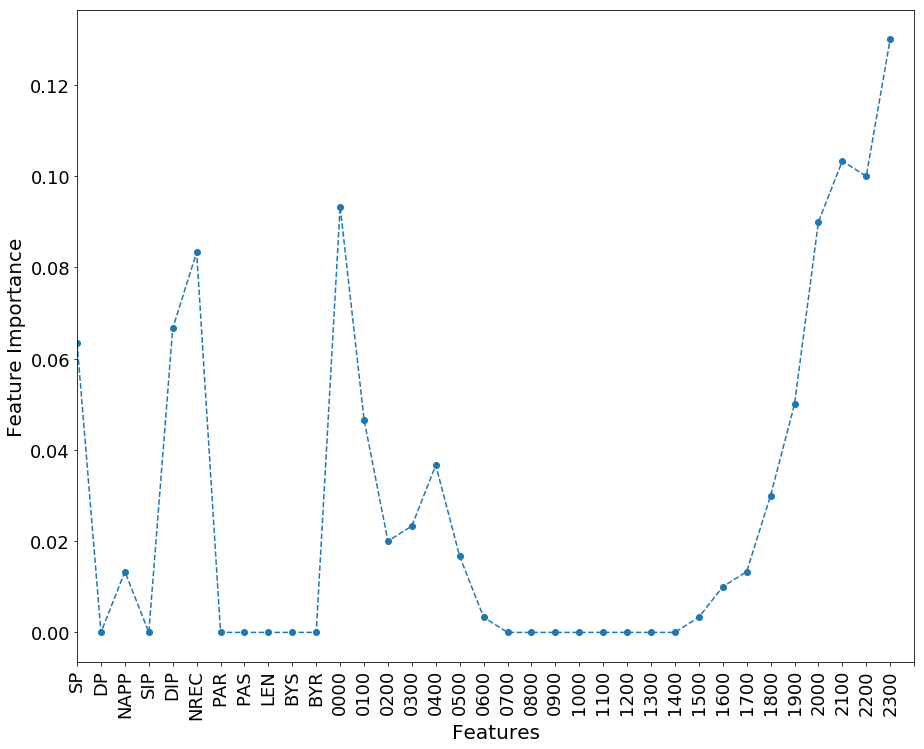

In [221]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [222]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8076583210603829

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4054   706     4760
True         600  1430     2030
__all__     4654  2136     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8027491408934708

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1735   295     2030
True         279   601      880
__all__     2014   896     2910

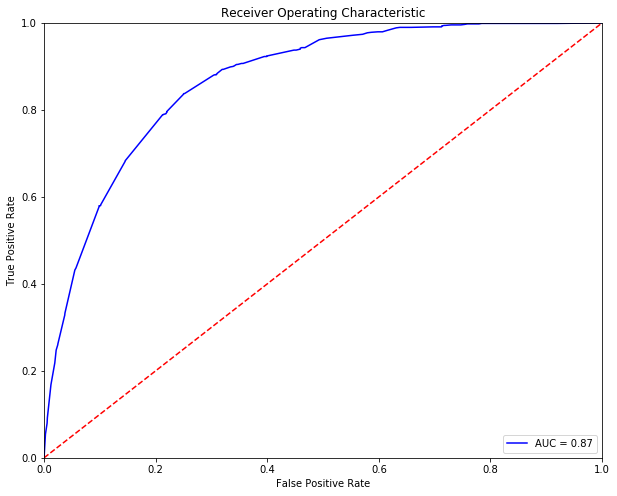

Optimal Threshold is 0.4971831113214528
Accuracy on test data is: 0.8027491408934708


Predicted  False  True  __all__
Actual                         
False       1735   295     2030
True         279   601      880
__all__     2014   896     2910

In [223]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [224]:
table_70_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

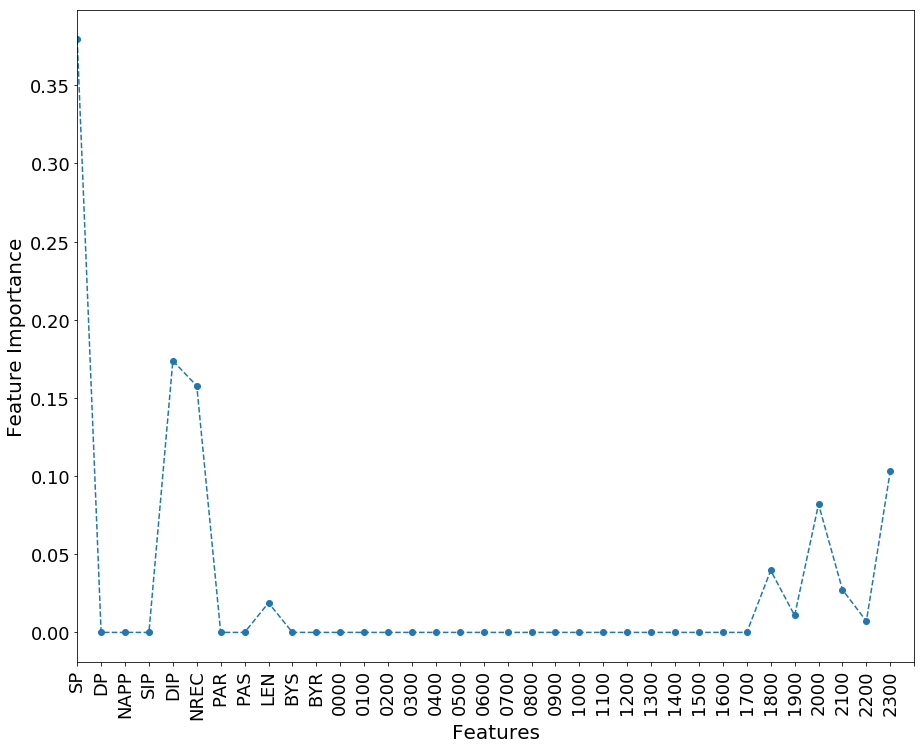

In [225]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [226]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8132547864506627

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4099   661     4760
True         607  1423     2030
__all__     4706  2084     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1756   274     2030
True         296   584      880
__all__     2052   858     2910

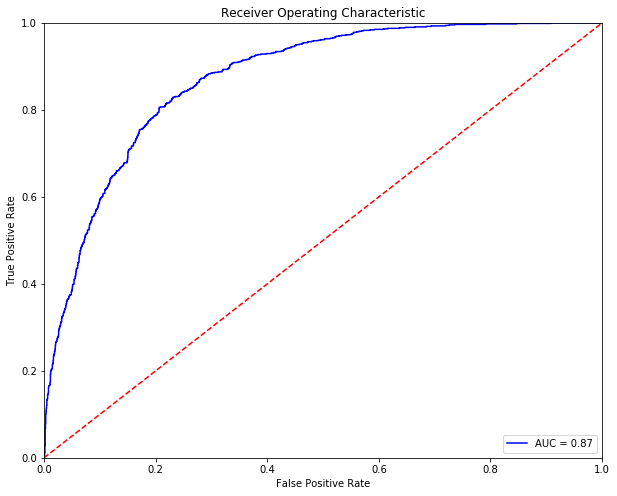

Optimal Threshold is 0.34657903568600507
Accuracy on test data is: 0.7948453608247422


Predicted  False  True  __all__
Actual                         
False       1614   416     2030
True         181   699      880
__all__     1795  1115     2910

In [227]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [228]:
table_70_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

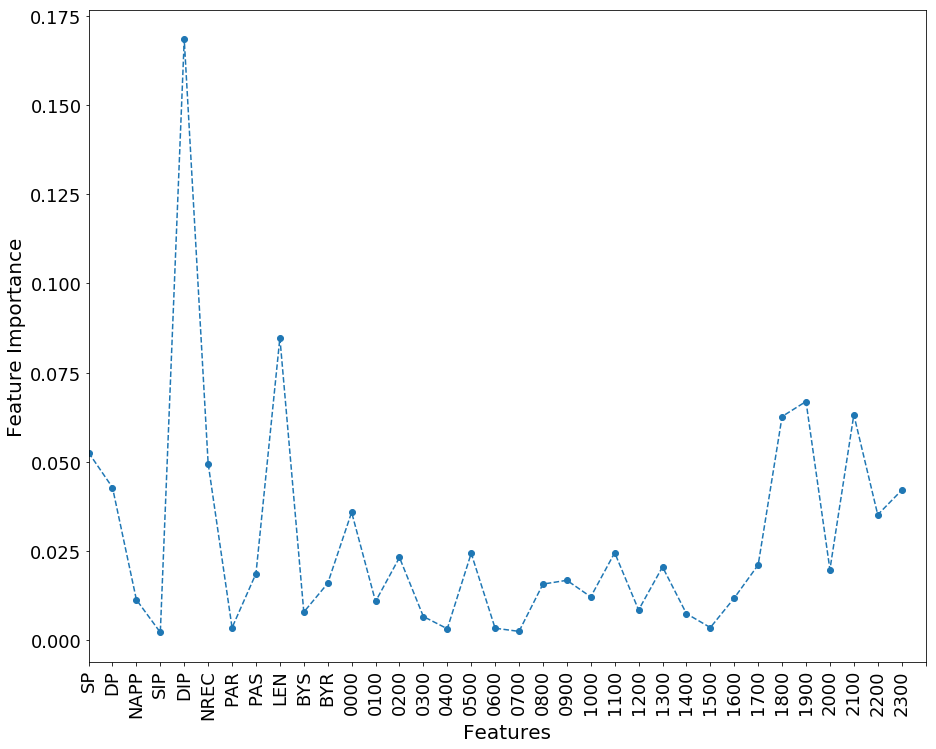

In [229]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [230]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8007363770250369

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3841   919     4760
True         434  1596     2030
__all__     4275  2515     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7986254295532647

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1659   371     2030
True         215   665      880
__all__     1874  1036     2910

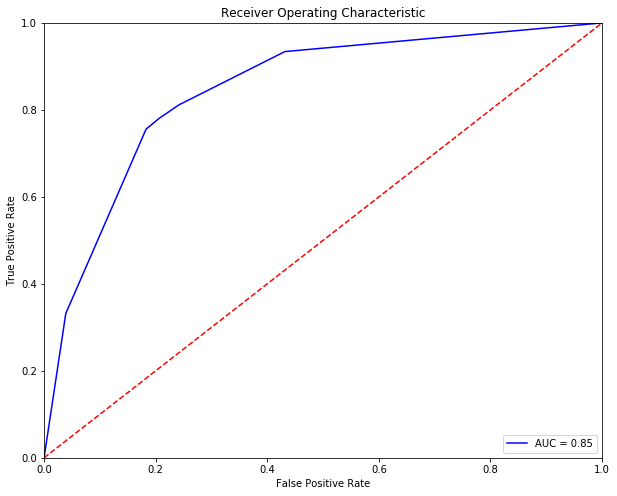

Optimal Threshold is 0.35625
Accuracy on test data is: 0.7986254295532647


Predicted  False  True  __all__
Actual                         
False       1659   371     2030
True         215   665      880
__all__     1874  1036     2910

In [231]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [232]:
table_70_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [233]:
%%capture
table_70_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

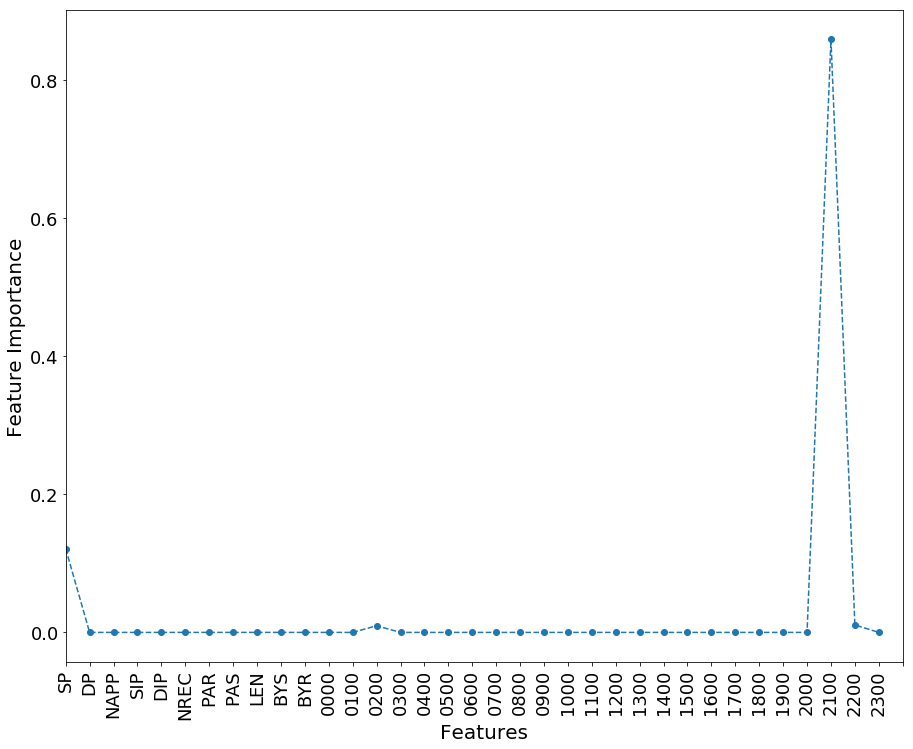

In [234]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [235]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9916053019145803

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4753     7     4760
True          50  1980     2030
__all__     4803  1987     6790

Accuracy of the  Bagging  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1757   273     2030
True         288   592      880
__all__     2045   865     2910

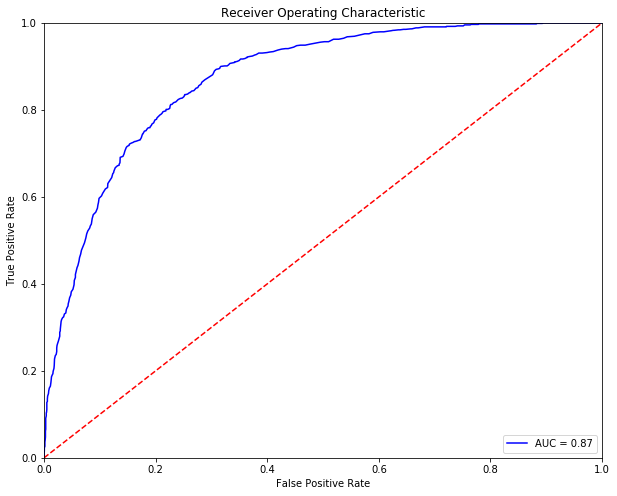

Optimal Threshold is 0.36333333333333334
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1608   422     2030
True         186   694      880
__all__     1794  1116     2910

In [236]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [237]:
table_70_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [238]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9349042709867452


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4651   109     4760
True         333  1697     2030
__all__     4984  1806     6790

The test accuracy is: 0.7934707903780068


Predicted  False  True  __all__
Actual                         
False       1763   267     2030
True         334   546      880
__all__     2097   813     2910

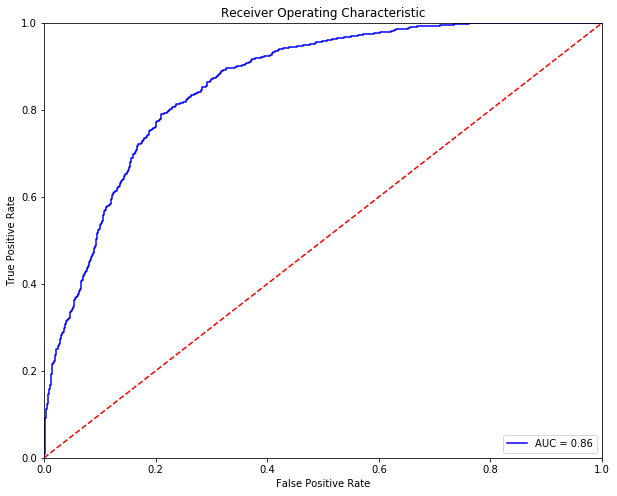

Optimal Threshold is 0.35713223472377476
Accuracy on test data is: 0.7893470790378007


Predicted  False  True  __all__
Actual                         
False       1603   427     2030
True         186   694      880
__all__     1789  1121     2910

In [239]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [240]:
table_70_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [241]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9157584683182314


Predicted  False  True  __all__
Actual                         
False       4528   232     4760
True         340  1690     2030
__all__     4868  1922     6790

The accuracy of the model on test data is: 0.7621993127147766


Predicted  False  True  __all__
Actual                         
False       1714   316     2030
True         376   504      880
__all__     2090   820     2910

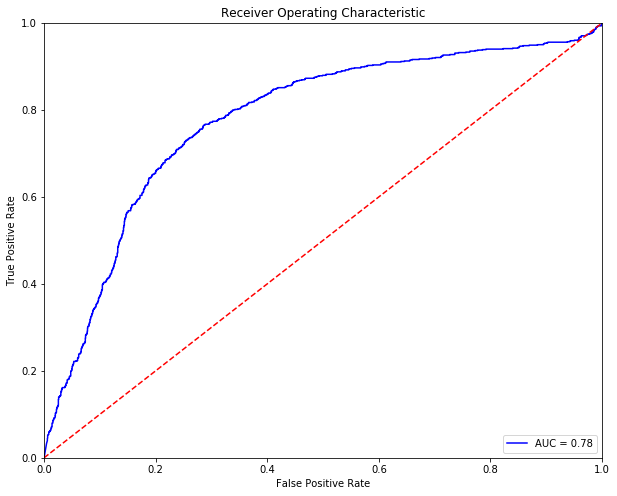

Optimal Threshold is 0.20804414
Accuracy of Logistic Model on training data is: 0.7357388316151203


Predicted  False  True  __all__
Actual                         
False       1493   537     2030
True         232   648      880
__all__     1725  1185     2910

In [242]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [243]:
table_70_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [244]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


The accuracy of the model on training data is: 0.8063328424153167


Predicted  False  True  __all__
Actual                         
False       4020   740     4760
True         575  1455     2030
__all__     4595  2195     6790

The accuracy of the model on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       1740   290     2030
True         265   615      880
__all__     2005   905     2910

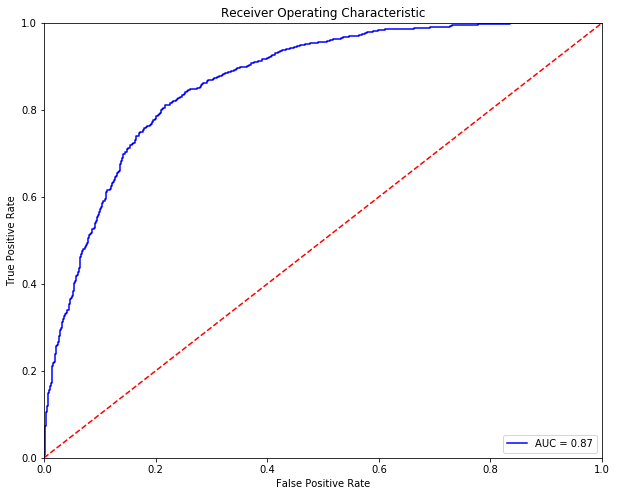

Optimal Threshold is 0.2139813
Accuracy on test data is: 0.7917525773195876


Predicted  False  True  __all__
Actual                         
False       1608   422     2030
True         184   696      880
__all__     1792  1118     2910

In [245]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [246]:
table_70_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [247]:
table_70_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  2030.0  4760.0    0.0    0.0  0.000000   
LogisticRegression          0.800000  1566.0  3866.0  894.0  464.0  0.187815   
RandomForestClassifier      0.802798  1554.0  3897.0  863.0  476.0  0.181303   
AdaBoostClassifier          0.807658  1430.0  4054.0  706.0  600.0  0.148319   
GradientBoostingClassifier  0.813255  1423.0  4099.0  661.0  607.0  0.138866   
ExtraTreeClassifier         0.800736  1596.0  3841.0  919.0  434.0  0.193067   
BaggingClassifier           0.991605  1980.0  4753.0    7.0   50.0  0.001471   
VotingClassifier            0.934904  1697.0  4651.0  109.0  333.0  0.022899   
Neural Network-1            0.915758  1690.0  4528.0  232.0  340.0  0.048739   
Neural-Network-2            0.806333  1455.0  4020.0  740.0  575.0  0.155462   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.228571  
RandomForestClassifier      0.234483  
AdaBoostClassifier          0.295567  
GradientBoostingClassifier  0.299015  
ExtraTreeClassifier         0.213793  
BaggingClassifier           0.024631  
VotingClassifier            0.164039  
Neural Network-1            0.167488  
Neural-Network-2            0.283251

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.800687  531.0  1799.0  231.0  349.0  0.113793   
LogisticRegression          0.800000  662.0  1666.0  364.0  218.0  0.179310   
RandomForestClassifier      0.805155  656.0  1687.0  343.0  224.0  0.168966   
AdaBoostClassifier          0.802749  601.0  1735.0  295.0  279.0  0.145320   
GradientBoostingClassifier  0.804124  584.0  1756.0  274.0  296.0  0.134975   
ExtraTreeClassifier         0.798625  665.0  1659.0  371.0  215.0  0.182759   
BaggingClassifier           0.807216  592.0  1757.0  273.0  288.0  0.134483   
VotingClassifier            0.793471  546.0  1763.0  267.0  334.0  0.131527   
Neural Network-1            0.762199  504.0  1714.0  316.0  376.0  0.155665   
Neural-Network-2            0.809278  615.0  1740.0  290.0  265.0  0.142857   

                                 FNR  
index                                 
KNeighborsClassifier        0.396591  
LogisticRegression          0.247727  
RandomForestClassifier      0.254545  
AdaBoostClassifier          0.317045  
GradientBoostingClassifier  0.336364  
ExtraTreeClassifier         0.244318  
BaggingClassifier           0.327273  
VotingClassifier            0.379545  
Neural Network-1            0.427273  
Neural-Network-2            0.301136

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.790034  695.0  1604.0  426.0  185.0  0.209852   
LogisticRegression          0.787973  693.0  1600.0  430.0  187.0  0.211823   
RandomForestClassifier      0.789691  695.0  1603.0  427.0  185.0  0.210345   
AdaBoostClassifier          0.802749  601.0  1735.0  295.0  279.0  0.145320   
GradientBoostingClassifier  0.794845  699.0  1614.0  416.0  181.0  0.204926   
ExtraTreeClassifier         0.798625  665.0  1659.0  371.0  215.0  0.182759   
BaggingClassifier           0.791065  694.0  1608.0  422.0  186.0  0.207882   
VotingClassifier            0.789347  694.0  1603.0  427.0  186.0  0.210345   
Neural Network-1            0.735739  648.0  1493.0  537.0  232.0  0.264532   
Neural-Network-2            0.791753  696.0  1608.0  422.0  184.0  0.207882   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.210227   0.315364  0.866547  
LogisticRegression          0.212500   0.464982  0.866650  
RandomForestClassifier      0.210227   0.300843  0.849310  
AdaBoostClassifier          0.317045   0.497183  0.868087  
GradientBoostingClassifier  0.205682   0.346579  0.873288  
ExtraTreeClassifier         0.244318   0.356250  0.846362  
BaggingClassifier           0.211364   0.363333  0.870907  
VotingClassifier            0.211364   0.357132  0.861074  
Neural Network-1            0.263636   0.208044  0.776594  
Neural-Network-2            0.209091   0.213981  0.867608

In [248]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [249]:
table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

In [250]:
table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

In [251]:
table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0

In [252]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.939764  0.042979  0.100756
LogisticRegression          0.806284  0.178340  0.229897
RandomForestClassifier      0.807364  0.171764  0.241747
AdaBoostClassifier          0.811291  0.155114  0.267745
GradientBoostingClassifier  0.816004  0.140000  0.287497
ExtraTreeClassifier         0.810211  0.160646  0.258368
BaggingClassifier           0.967796  0.014138  0.074662
VotingClassifier            0.933432  0.024140  0.166368
Neural Network-1            0.925037  0.034009  0.171285
Neural-Network-2            0.810898  0.150211  0.280563

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.802520  0.122583  0.369006
LogisticRegression          0.808247  0.172928  0.234904
RandomForestClassifier      0.810538  0.167017  0.240941
AdaBoostClassifier          0.802291  0.157476  0.289840
GradientBoostingClassifier  0.810309  0.139370  0.305021
ExtraTreeClassifier         0.805613  0.160092  0.272908
BaggingClassifier           0.808362  0.138389  0.313657
VotingClassifier            0.798740  0.133608  0.356227
Neural Network-1            0.770905  0.139525  0.434185
Neural-Network-2            0.811340  0.146290  0.285827

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.797136  0.201238  0.206600  0.868528
LogisticRegression          0.797480  0.202218  0.203212  0.872131
RandomForestClassifier      0.799771  0.200241  0.200205  0.856238
AdaBoostClassifier          0.800916  0.175131  0.254277  0.869822
GradientBoostingClassifier  0.801031  0.198765  0.199439  0.876218
ExtraTreeClassifier         0.799885  0.177233  0.252584  0.855554
BaggingClassifier           0.798855  0.199756  0.204329  0.873462
VotingClassifier            0.796564  0.203041  0.204344  0.866810
Neural Network-1            0.750859  0.249126  0.249174  0.793591
Neural-Network-2            0.799771  0.199917  0.200945  0.872518

###  <a id='1.C' style="text-decoration : none; color : #000000;">80:20 Train Test Split with PCA</a>
#### Random State 0

In [253]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  4568  42    49   57  1200   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16   4     6    5     7   

                                                    NREC         PAR  \
User                                                                   
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5038  146.820762   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16    5.937500   

                                                          PAS        LEN  \
User                                                                       
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  56.766574  78.731441   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...   9.375000  34.125000   

                                                            BYS  \
User                                                              
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5765.397777   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...  1506.000000   

                                                              BYR  0000  0100  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  184063.583962   578   185   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    3370.125000     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   138   268   205   180   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   149   136   156   104   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   120   158   254   116   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     3     2     0   

                                                    1400  1500  1600  1700  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   207   118   134   215   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   177   142   343   221   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     0     0     0   

                                                    2200  2300  
User                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   295   439  
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0

1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
1f82574ddff42f1b88e62ffb165c3ec923566ba35c529384374b1ba66ef60756    0
ecb38e6cc658213a1e435bcb534a531fef9f8d54b7ec9b27419a1065e19f4f10    0
f7556cb149bd02ef75b3657db80430c61b85847c0cc55c90d7dd6ed6a912d4d1    0
c1084232da26636ffe647ab497b1a09c82db9436937f4898e025587d1e03ad49    0
4ad4b5e8c8f698eabd4fa898c91abb574b6014e24c7e004adae9f209e7ec9b91    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9395643131079252
The train/test split ratio is 80:20


In [254]:
display(X_pca_13[0:1])

array([[ 0.40649251,  0.00777116, -0.33875209, -0.12851905, -0.54714251,
        -0.06815212, -0.16245366, -0.44643038, -0.42793617, -0.62697446,
        -0.88893596,  0.87171293,  1.44801305]])

In [255]:
## Table to store training and test measures
table_80_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5451     0     5451
True           0  2309     2309
__all__     5451  2309     7760

Accuracy of the  KNN  model for test data is: 0.7963917525773195

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1200   139     1339
True         256   345      601
__all__     1456   484     1940

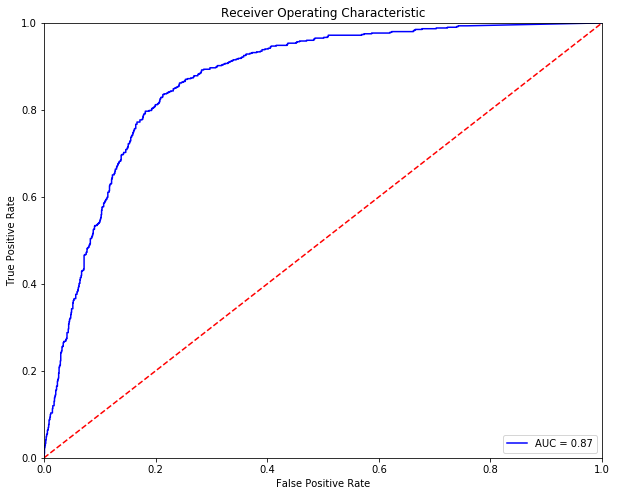

Optimal Threshold is 0.29047130185945397
Accuracy on test data is: 0.804639175257732


Predicted  False  True  __all__
Actual                         
False       1078   261     1339
True         118   483      601
__all__     1196   744     1940

In [257]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [258]:
table_80_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [259]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.8027061855670103

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4493   958     5451
True         573  1736     2309
__all__     5066  2694     7760

Accuracy of the  Logistic  model for test data is: 0.818041237113402

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1123   216     1339
True         137   464      601
__all__     1260   680     1940

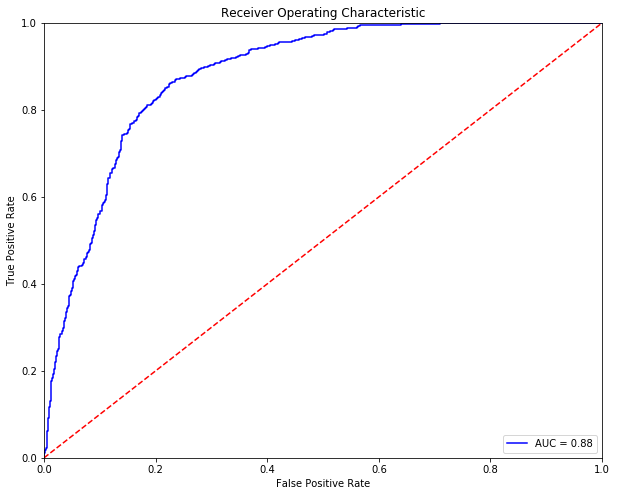

Optimal Threshold is 0.4676368518820543
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1087   252     1339
True         114   487      601
__all__     1201   739     1940

In [260]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [261]:
table_80_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [262]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7024484536082474

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5451  0     5451
1          2309  0     2309
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.6902061855670103

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1339  0     1339
1           601  0      601
__all__    1940  0     1940

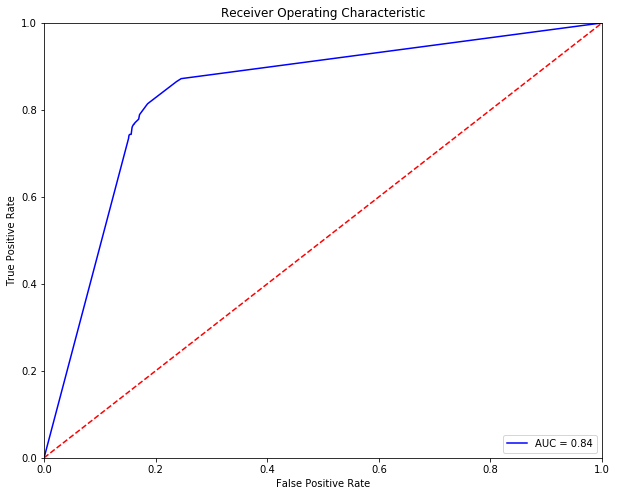

Optimal Threshold is 0.3050864201038303
Accuracy on test data is: 0.8164948453608247


Predicted  False  True  __all__
Actual                         
False       1109   230     1339
True         126   475      601
__all__     1235   705     1940

In [263]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [264]:
table_80_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

5451
0
0
5451
2309
0
0
2309
1.0
0.0
0.0
1.0
1339
0
0
1339
601
0
0
601
1.0
0.0
0.0
1.0


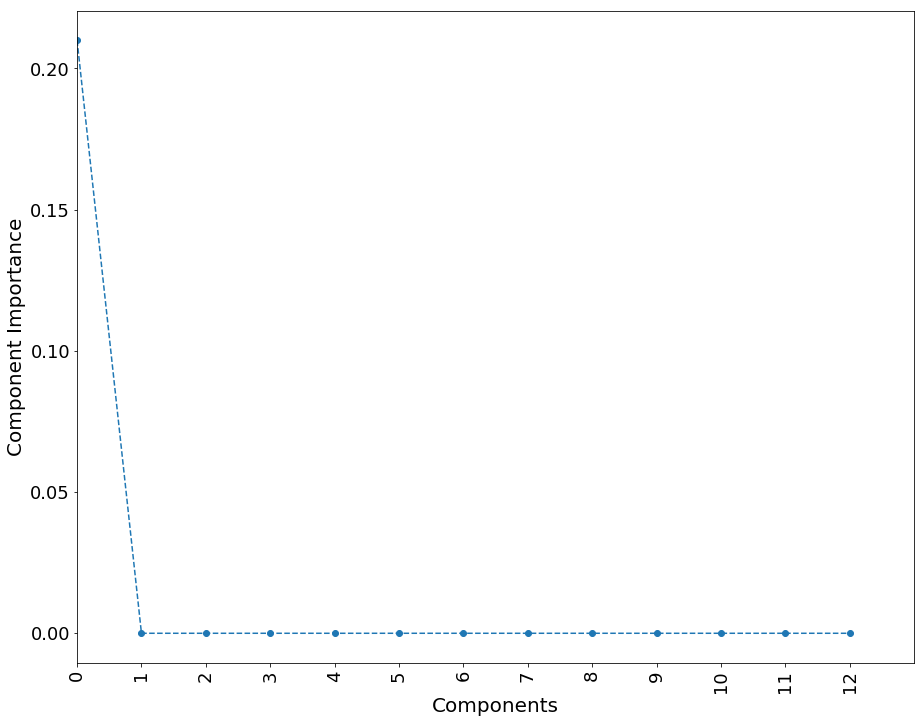

In [265]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [266]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8157216494845361

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4774   677     5451
True         753  1556     2309
__all__     5527  2233     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8097938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   165     1339
True         204   397      601
__all__     1378   562     1940

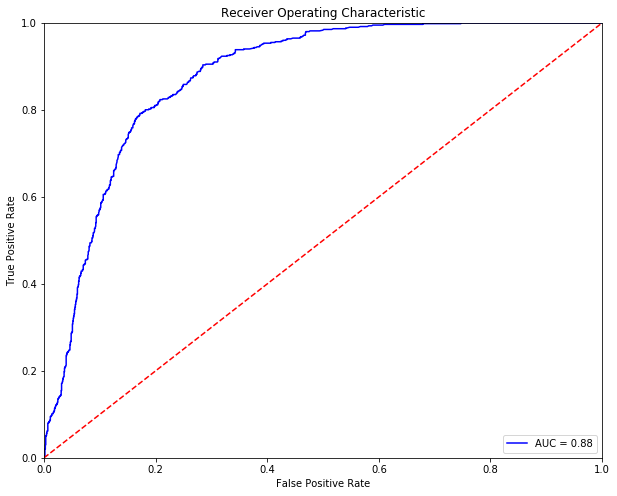

Optimal Threshold is 0.49195495681170903
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False       1081   258     1339
True         117   484      601
__all__     1198   742     1940

In [267]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [268]:
table_80_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

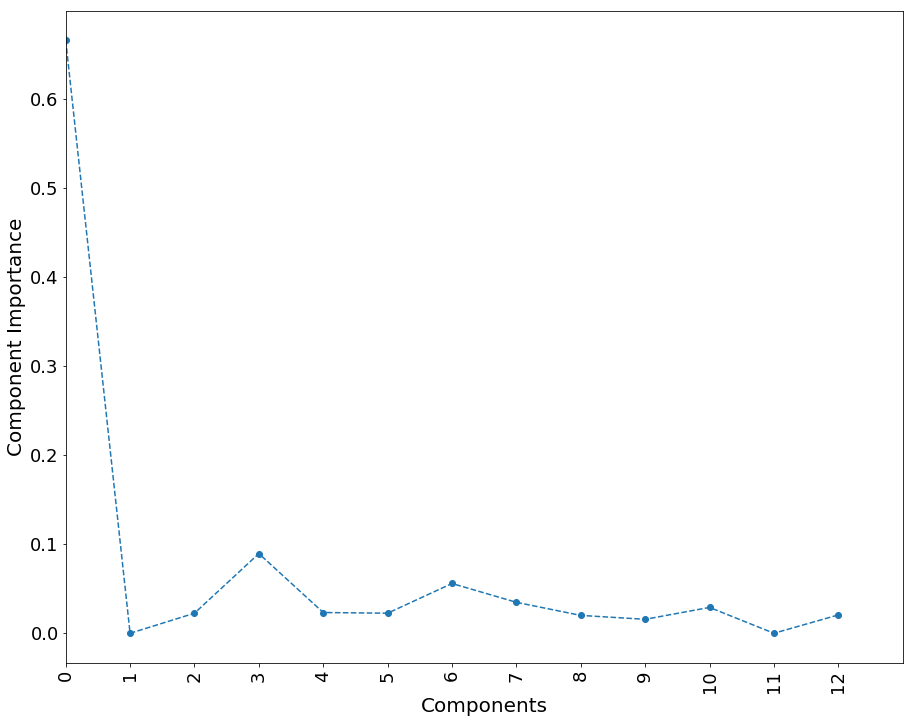

In [269]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [270]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8128865979381443

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4732   719     5451
True         733  1576     2309
__all__     5465  2295     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8103092783505155

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1165   174     1339
True         194   407      601
__all__     1359   581     1940

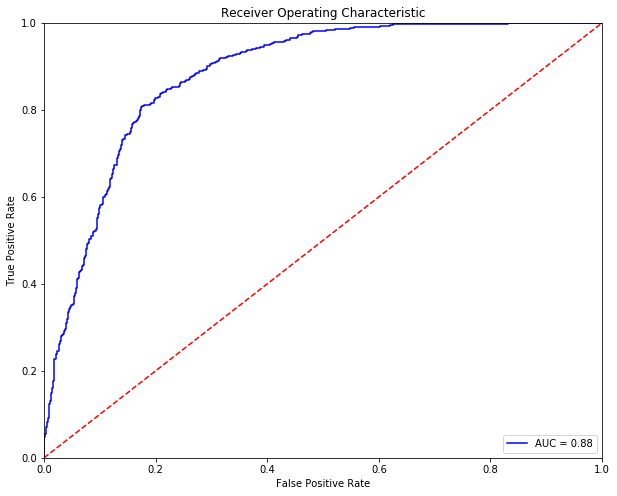

Optimal Threshold is 0.32228094052479617
Accuracy on test data is: 0.8118556701030928


Predicted  False  True  __all__
Actual                         
False       1087   252     1339
True         113   488      601
__all__     1200   740     1940

In [271]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [272]:
table_80_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

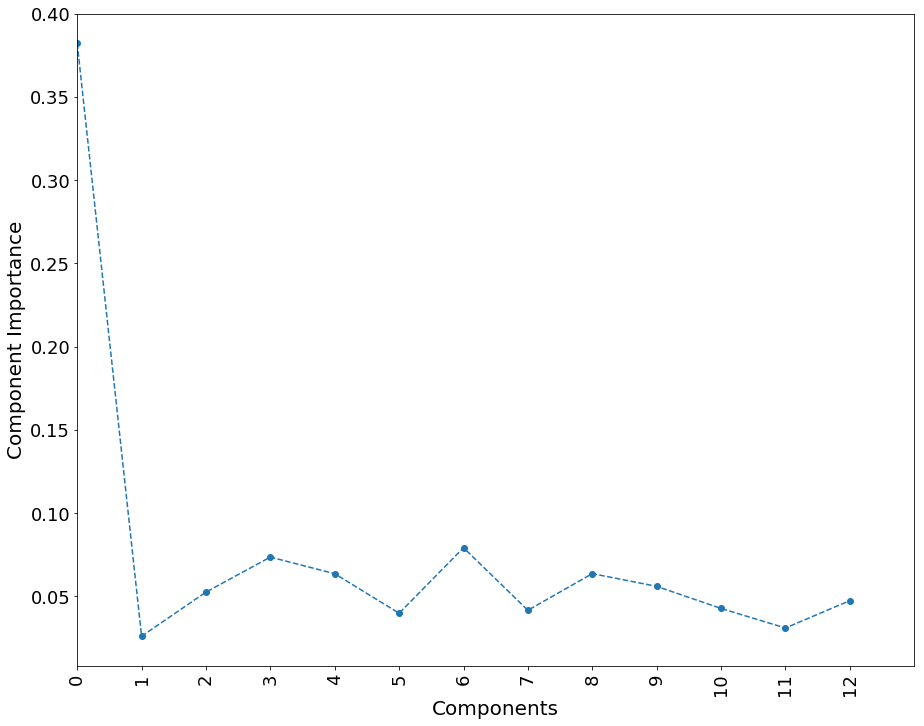

In [273]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [274]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8051546391752578

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4513   938     5451
True         574  1735     2309
__all__     5087  2673     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8144329896907216

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1120   219     1339
True         141   460      601
__all__     1261   679     1940

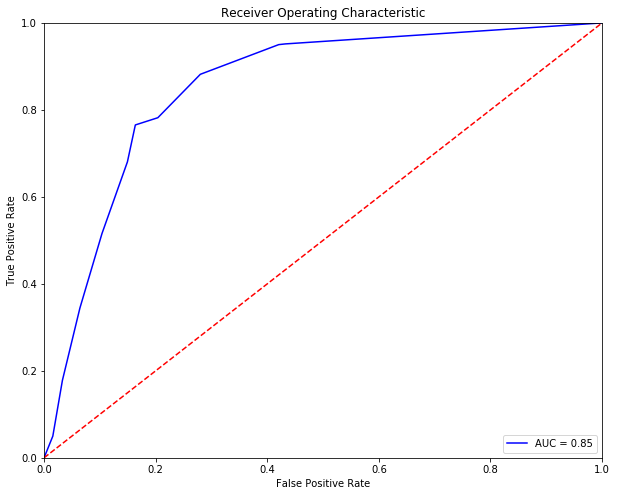

Optimal Threshold is 0.3355048859934853
Accuracy on test data is: 0.8144329896907216


Predicted  False  True  __all__
Actual                         
False       1120   219     1339
True         141   460      601
__all__     1261   679     1940

In [275]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [276]:
table_80_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [277]:
%%capture
table_80_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

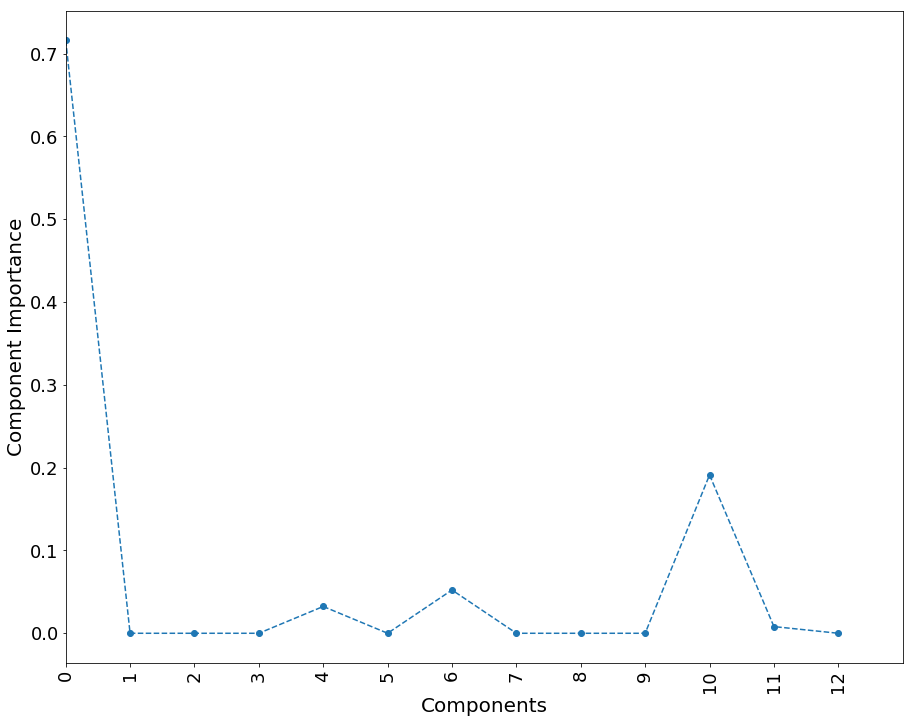

In [278]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [279]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9380154639175258

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5337   114     5451
True         367  1942     2309
__all__     5704  2056     7760

Accuracy of the  Bagging  model for test data is: 0.8077319587628866

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1188   151     1339
True         222   379      601
__all__     1410   530     1940

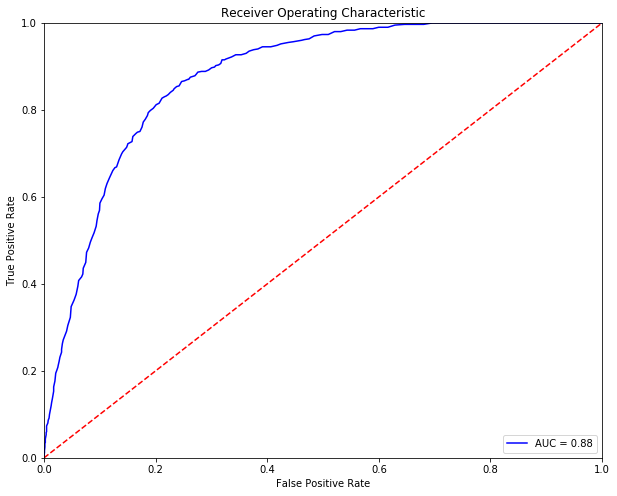

Optimal Threshold is 0.39
Accuracy on test data is: 0.8061855670103093


Predicted  False  True  __all__
Actual                         
False       1084   255     1339
True         121   480      601
__all__     1205   735     1940

In [280]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [281]:
table_80_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [282]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9422680412371134


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5403    48     5451
True         400  1909     2309
__all__     5803  1957     7760

The test accuracy is: 0.7927835051546391


Predicted  False  True  __all__
Actual                         
False       1196   143     1339
True         259   342      601
__all__     1455   485     1940

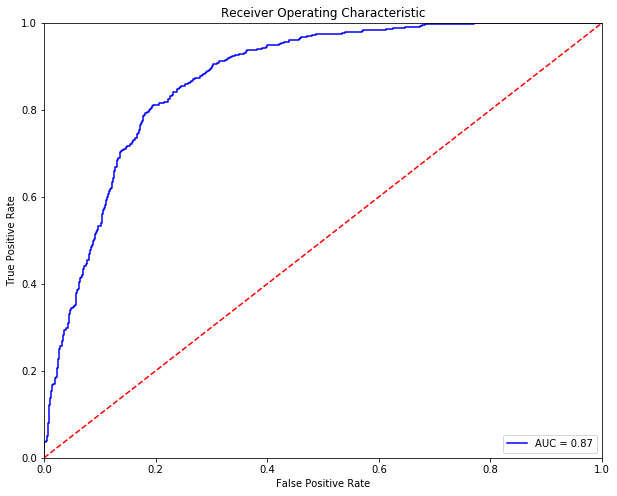

Optimal Threshold is 0.3657508494045238
Accuracy on test data is: 0.8067010309278351


Predicted  False  True  __all__
Actual                         
False       1081   258     1339
True         117   484      601
__all__     1198   742     1940

In [283]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [284]:
table_80_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [285]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8630154639175258


Predicted  False  True  __all__
Actual                         
False       5058   393     5451
True         670  1639     2309
__all__     5728  2032     7760

The accuracy of the model on test data is: 0.7891752577319587


Predicted  False  True  __all__
Actual                         
False       1182   157     1339
True         252   349      601
__all__     1434   506     1940

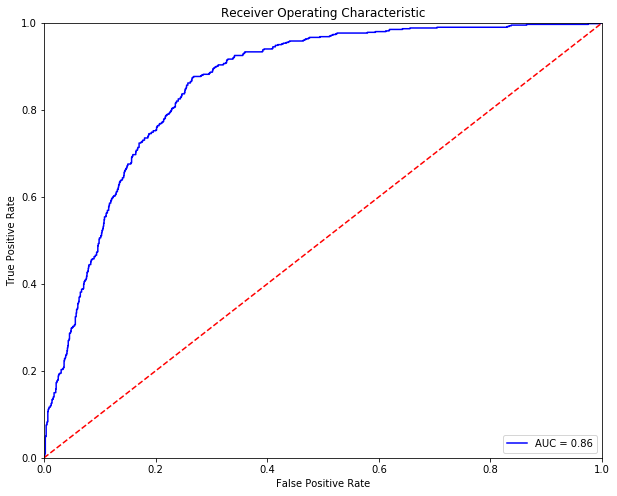

Optimal Threshold is 0.24705479
Accuracy of Logistic Model on training data is: 0.7824742268041237


Predicted  False  True  __all__
Actual                         
False       1049   290     1339
True         132   469      601
__all__     1181   759     1940

In [286]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [287]:
table_80_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [288]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.4min finished


The accuracy of the model on training data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       4640   811     5451
True         669  1640     2309
__all__     5309  2451     7760

The accuracy of the model on test data is: 0.8123711340206186


Predicted  False  True  __all__
Actual                         
False       1150   189     1339
True         175   426      601
__all__     1325   615     1940

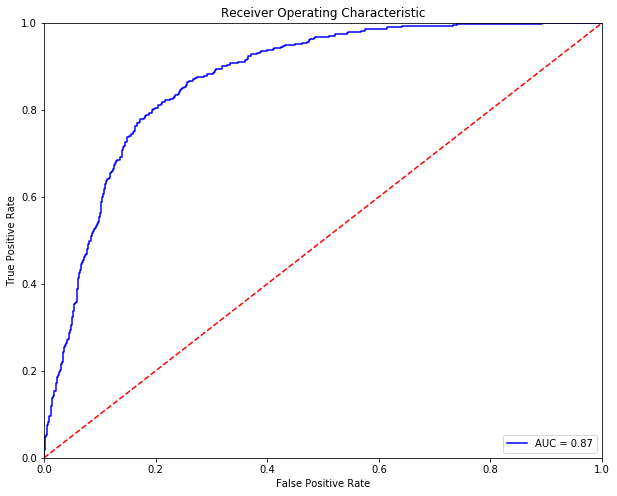

Optimal Threshold is 0.39407423
Accuracy on test data is: 0.8020618556701031


Predicted  False  True  __all__
Actual                         
False       1074   265     1339
True         119   482      601
__all__     1193   747     1940

In [289]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [290]:
table_80_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [291]:
table_80_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  2309.000000  5451.000000     0.000000   
LogisticRegression          0.802706  1736.000000  4493.000000   958.000000   
RandomForestClassifier      0.702448  3829.046521  1621.953479  1621.953479   
AdaBoostClassifier          0.815722  1556.000000  4774.000000   677.000000   
GradientBoostingClassifier  0.812887  1576.000000  4732.000000   719.000000   
ExtraTreeClassifier         0.805155  1735.000000  4513.000000   938.000000   
BaggingClassifier           0.938015  1942.000000  5337.000000   114.000000   
VotingClassifier            0.942268  1909.000000  5403.000000    48.000000   
Neural Network-1            0.863015  1639.000000  5058.000000   393.000000   
Neural-Network-2            0.809278  1640.000000  4640.000000   811.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          573.000000  0.175748  0.248159  
RandomForestClassifier      687.046521  0.702448  0.297552  
AdaBoostClassifier          753.000000  0.124197  0.326115  
GradientBoostingClassifier  733.000000  0.131902  0.317453  
ExtraTreeClassifier         574.000000  0.172079  0.248592  
BaggingClassifier           367.000000  0.020914  0.158943  
VotingClassifier            400.000000  0.008806  0.173235  
Neural Network-1            670.000000  0.072097  0.290169  
Neural-Network-2            669.000000  0.148780  0.289736

Comparision Table for Test Accuracies:


accuracy          TP           TN          FP  \
index                                                                       
KNeighborsClassifier        0.796392  345.000000  1200.000000  139.000000   
LogisticRegression          0.818041  464.000000  1123.000000  216.000000   
RandomForestClassifier      0.690206  924.186082   414.813918  414.813918   
AdaBoostClassifier          0.809794  397.000000  1174.000000  165.000000   
GradientBoostingClassifier  0.810309  407.000000  1165.000000  174.000000   
ExtraTreeClassifier         0.814433  460.000000  1120.000000  219.000000   
BaggingClassifier           0.807732  379.000000  1188.000000  151.000000   
VotingClassifier            0.792784  342.000000  1196.000000  143.000000   
Neural Network-1            0.789175  349.000000  1182.000000  157.000000   
Neural-Network-2            0.812371  426.000000  1150.000000  189.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        256.000000  0.103809  0.425957  
LogisticRegression          137.000000  0.161314  0.227953  
RandomForestClassifier      186.186082  0.690206  0.309794  
AdaBoostClassifier          204.000000  0.123226  0.339434  
GradientBoostingClassifier  194.000000  0.129948  0.322795  
ExtraTreeClassifier         141.000000  0.163555  0.234609  
BaggingClassifier           222.000000  0.112771  0.369384  
VotingClassifier            259.000000  0.106796  0.430948  
Neural Network-1            252.000000  0.117252  0.419301  
Neural-Network-2            175.000000  0.141150  0.291181

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.804639  483.0  1078.0  261.0  118.0  0.194922   
LogisticRegression          0.811340  487.0  1087.0  252.0  114.0  0.188200   
RandomForestClassifier      0.816495  475.0  1109.0  230.0  126.0  0.171770   
AdaBoostClassifier          0.806701  484.0  1081.0  258.0  117.0  0.192681   
GradientBoostingClassifier  0.811856  488.0  1087.0  252.0  113.0  0.188200   
ExtraTreeClassifier         0.814433  460.0  1120.0  219.0  141.0  0.163555   
BaggingClassifier           0.806186  480.0  1084.0  255.0  121.0  0.190441   
VotingClassifier            0.806701  484.0  1081.0  258.0  117.0  0.192681   
Neural Network-1            0.782474  469.0  1049.0  290.0  132.0  0.216580   
Neural-Network-2            0.802062  482.0  1074.0  265.0  119.0  0.197909   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.196339   0.290471  0.870385  
LogisticRegression          0.189684   0.467637  0.882121  
RandomForestClassifier      0.209651   0.305086  0.838947  
AdaBoostClassifier          0.194676   0.491955  0.876544  
GradientBoostingClassifier  0.188020   0.322281  0.881473  
ExtraTreeClassifier         0.234609   0.335505  0.853516  
BaggingClassifier           0.201331   0.390000  0.876312  
VotingClassifier            0.194676   0.365751  0.873642  
Neural Network-1            0.219634   0.247055  0.860327  
Neural-Network-2            0.198003   0.394074  0.871420

#### Random State 10

In [292]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...   80   8    12    4   37   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  548   8    19    8  205   

                                                    NREC         PAR  \
User                                                                   
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    83  302.084337   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   554  510.418773   

                                                           PAS        LEN  \
User                                                                        
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  170.180723  63.951807   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  159.868231  45.395307   

                                                             BYS  \
User                                                               
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  15306.156627   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  13566.797834   

                                                              BYR  0000  0100  \
User                                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  407432.662651     4     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  655119.371841     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     7     1     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     0     0     7   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    12     5     6     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0   105    10   253   

                                                    1400  1500  1600  1700  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     0     1     3   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   116    23     3     9   

                                                    1800  1900  2000  2100  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     5     3     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...    32     3     0     0   

                                                    2200  2300  
User                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    11     0  
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0

1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
8886e9eff59dc97d3e4ef930640f3575611e7d41b31f25206c47096baf1f8309    0
9ad35a50636ead336e396b4e528bfa3f70f27723a8ef227b22740fa315b67e4d    1
173b2bd24b74b995aabd9bd3f5474256f85bc6c8445627cd1f9e279eb68a3fa6    1
3505b39af36b00af463d74b2b0188ff81aa512a614c5457537c5a196704341c1    1
455fd634ee53828c893eebbb4693f89e187303778d93d6fbff38a1f76bea18a5    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9379851197355754
The train/test split ratio is 80:20


In [293]:
display(X_pca_13[0:1])

array([[-0.6469245 ,  0.42319325,  0.29392578, -0.12475287,  0.03902895,
        -0.38374457, -0.44084112,  0.55847222, -0.09849   ,  0.57991348,
        -0.07028052,  0.13642173, -0.18660695]])

In [294]:
## Table to store training and test measures
table_80_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5429     0     5429
True           0  2331     2331
__all__     5429  2331     7760

Accuracy of the  KNN  model for test data is: 0.8020618556701031

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1209   152     1361
True         232   347      579
__all__     1441   499     1940

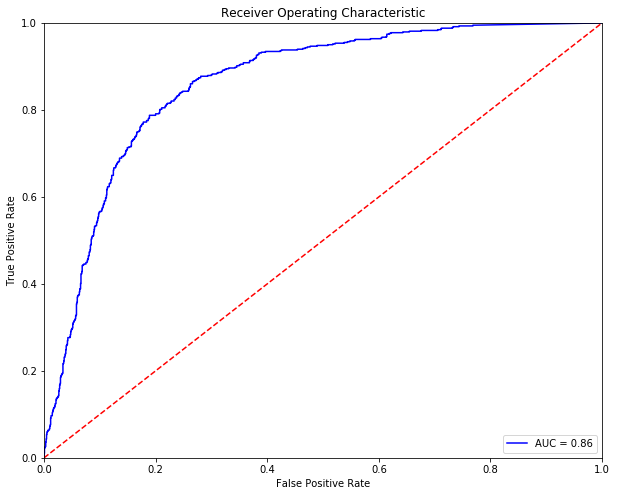

Optimal Threshold is 0.2908216269141529
Accuracy on test data is: 0.7932989690721649


Predicted  False  True  __all__
Actual                         
False       1080   281     1361
True         120   459      579
__all__     1200   740     1940

In [296]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [297]:
table_80_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [298]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.8065721649484536

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4794   635     5429
True         866  1465     2331
__all__     5660  2100     7760

Accuracy of the  Logistic  model for test data is: 0.8077319587628866

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1210   151     1361
True         222   357      579
__all__     1432   508     1940

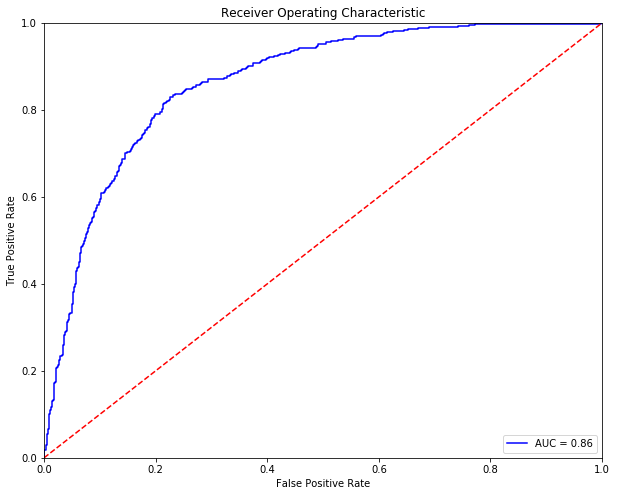

Optimal Threshold is 0.35747087767009583
Accuracy on test data is: 0.7922680412371134


Predicted  False  True  __all__
Actual                         
False       1079   282     1361
True         121   458      579
__all__     1200   740     1940

In [299]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [300]:
table_80_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [301]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.6996134020618556

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5429  0     5429
1          2331  0     2331
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.7015463917525773

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1361  0     1361
1           579  0      579
__all__    1940  0     1940

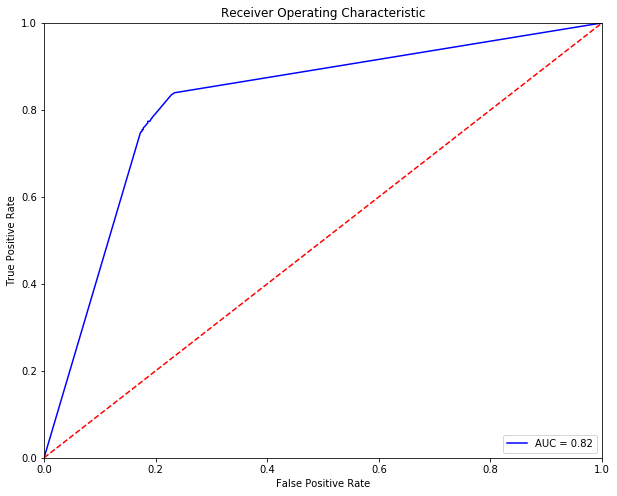

Optimal Threshold is 0.2796380497745892
Accuracy on test data is: 0.7984536082474227


Predicted  False  True  __all__
Actual                         
False       1093   268     1361
True         123   456      579
__all__     1216   724     1940

In [302]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [303]:
table_80_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

5429
0
0
5429
2331
0
0
2331
1.0
0.0
0.0
1.0
1361
0
0
1361
579
0
0
579
1.0
0.0
0.0
1.0


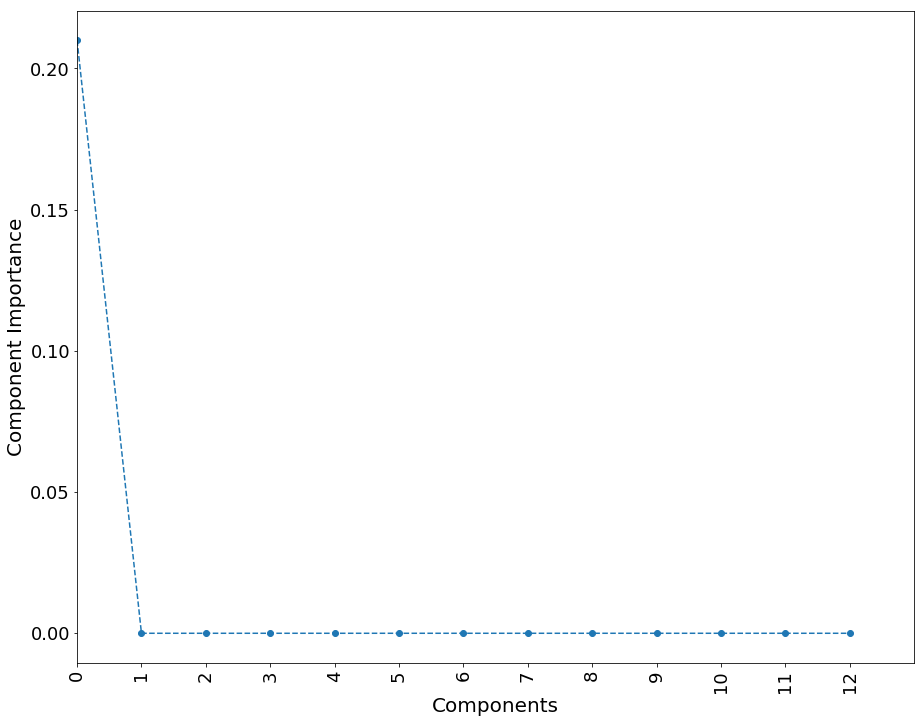

In [304]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [305]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8139175257731959

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4641   788     5429
True         656  1675     2331
__all__     5297  2463     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1159   202     1361
True         178   401      579
__all__     1337   603     1940

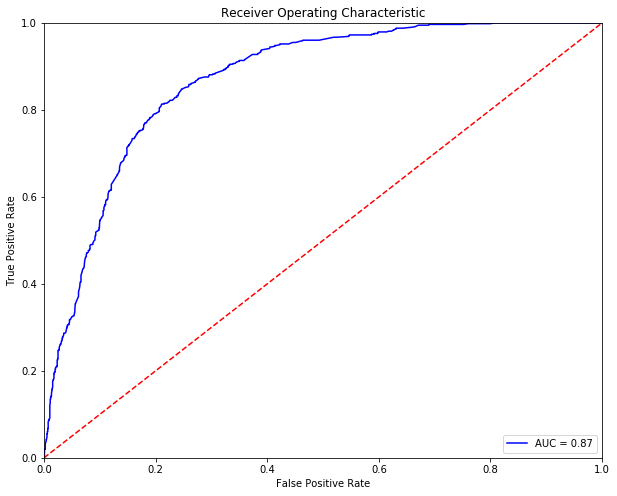

Optimal Threshold is 0.47691918210301204
Accuracy on test data is: 0.7969072164948454


Predicted  False  True  __all__
Actual                         
False       1087   274     1361
True         120   459      579
__all__     1207   733     1940

In [306]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [307]:
table_80_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

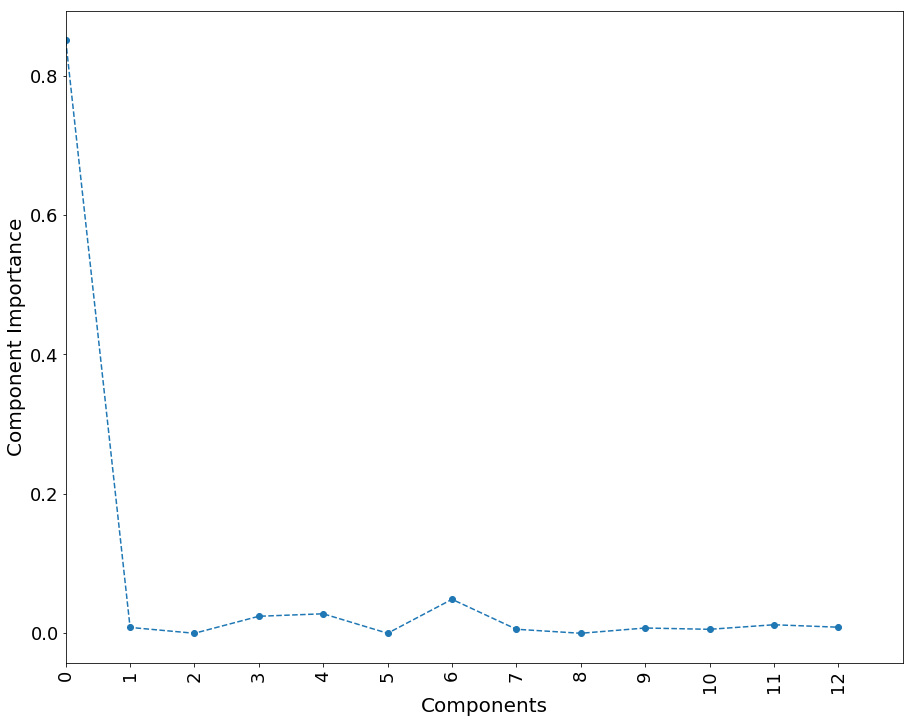

In [308]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [309]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8177835051546392

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4664   765     5429
True         649  1682     2331
__all__     5313  2447     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8108247422680412

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1171   190     1361
True         177   402      579
__all__     1348   592     1940

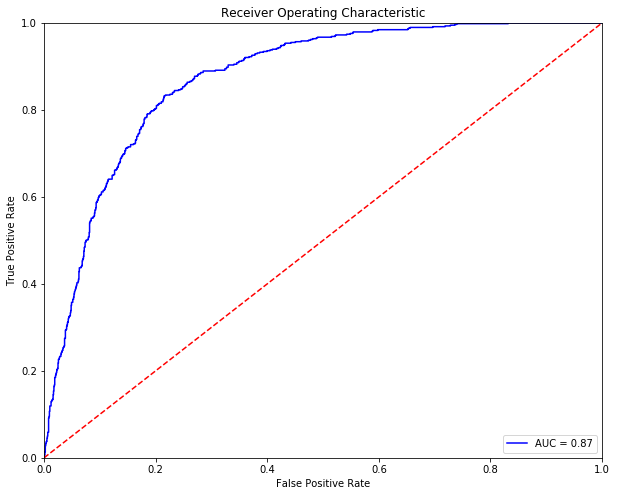

Optimal Threshold is 0.34586452902152454
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         115   464      579
__all__     1206   734     1940

In [310]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [311]:
table_80_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

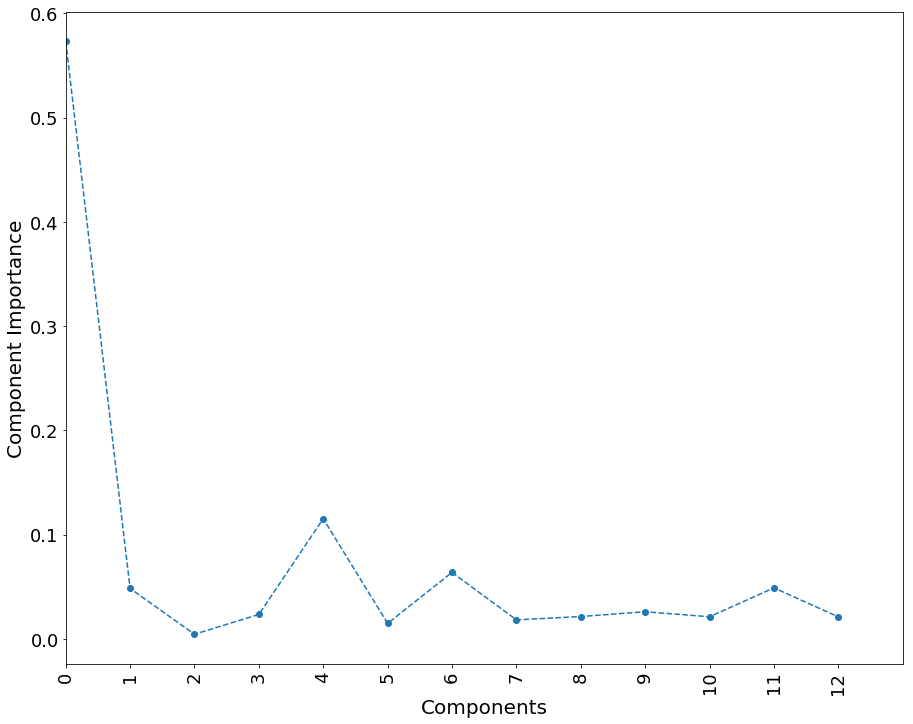

In [312]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [313]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8092783505154639

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4661   768     5429
True         712  1619     2331
__all__     5373  2387     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8097938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   193     1361
True         176   403      579
__all__     1344   596     1940

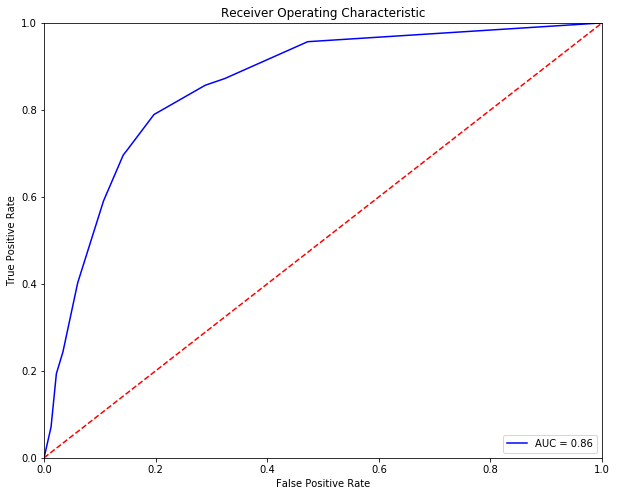

Optimal Threshold is 0.42203742203742206
Accuracy on test data is: 0.8082474226804124


Predicted  False  True  __all__
Actual                         
False       1158   203     1361
True         169   410      579
__all__     1327   613     1940

In [314]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [315]:
table_80_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [316]:
%%capture
table_80_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

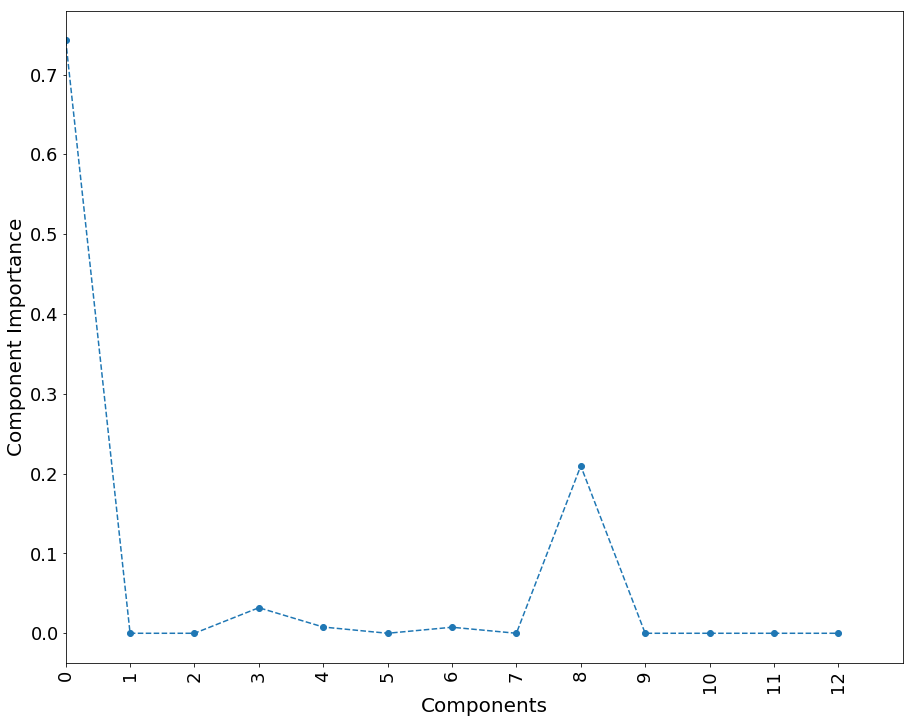

In [317]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [318]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9278350515463918

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5243   186     5429
True         374  1957     2331
__all__     5617  2143     7760

Accuracy of the  Bagging  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1188   173     1361
True         201   378      579
__all__     1389   551     1940

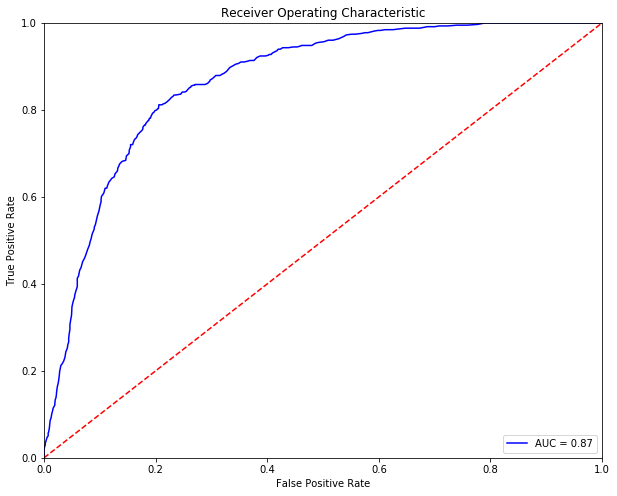

Optimal Threshold is 0.38
Accuracy on test data is: 0.8005154639175258


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         117   462      579
__all__     1208   732     1940

In [319]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [320]:
table_80_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [321]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9448453608247422


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5371    58     5429
True         370  1961     2331
__all__     5741  2019     7760

The test accuracy is: 0.8061855670103093


Predicted  False  True  __all__
Actual                         
False       1224   137     1361
True         239   340      579
__all__     1463   477     1940

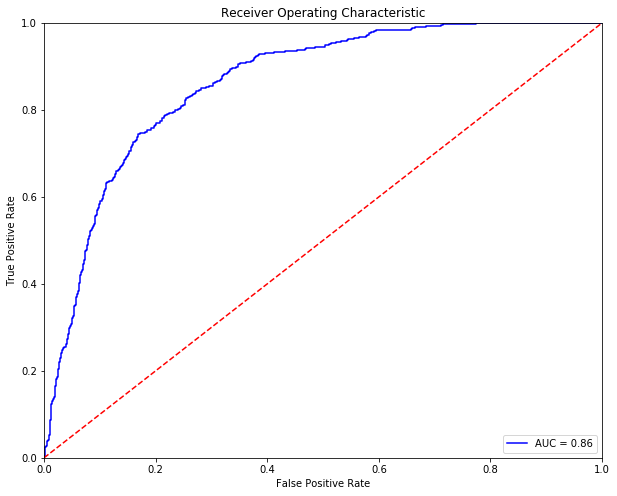

Optimal Threshold is 0.34530409975882437
Accuracy on test data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1069   292     1361
True         125   454      579
__all__     1194   746     1940

In [322]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [323]:
table_80_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [324]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8734536082474227


Predicted  False  True  __all__
Actual                         
False       4954   475     5429
True         507  1824     2331
__all__     5461  2299     7760

The accuracy of the model on test data is: 0.7969072164948454


Predicted  False  True  __all__
Actual                         
False       1178   183     1361
True         211   368      579
__all__     1389   551     1940

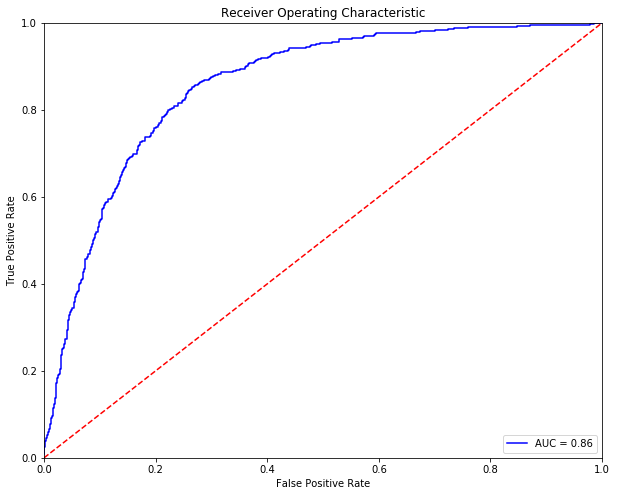

Optimal Threshold is 0.31141445
Accuracy of Logistic Model on training data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1069   292     1361
True         125   454      579
__all__     1194   746     1940

In [325]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [326]:
table_80_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [327]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.4min finished


The accuracy of the model on training data is: 0.8137886597938144


Predicted  False  True  __all__
Actual                         
False       4638   791     5429
True         654  1677     2331
__all__     5292  2468     7760

The accuracy of the model on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1167   194     1361
True         168   411      579
__all__     1335   605     1940

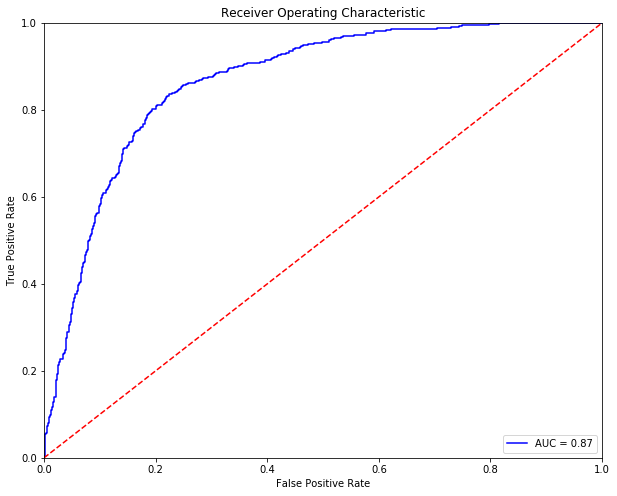

Optimal Threshold is 0.2632211
Accuracy on test data is: 0.8036082474226804


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         115   464      579
__all__     1210   730     1940

In [328]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [329]:
table_80_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [330]:
table_80_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        1.000000  2331.00000  5429.00000     0.00000   
LogisticRegression          0.806572  1465.00000  4794.00000   635.00000   
RandomForestClassifier      0.699613  3798.20116  1630.79884  1630.79884   
AdaBoostClassifier          0.813918  1675.00000  4641.00000   788.00000   
GradientBoostingClassifier  0.817784  1682.00000  4664.00000   765.00000   
ExtraTreeClassifier         0.809278  1619.00000  4661.00000   768.00000   
BaggingClassifier           0.927835  1957.00000  5243.00000   186.00000   
VotingClassifier            0.944845  1961.00000  5371.00000    58.00000   
Neural Network-1            0.873454  1824.00000  4954.00000   475.00000   
Neural-Network-2            0.813789  1677.00000  4638.00000   791.00000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier          0.00000  0.000000  0.000000  
LogisticRegression          866.00000  0.116964  0.371514  
RandomForestClassifier      700.20116  0.699613  0.300387  
AdaBoostClassifier          656.00000  0.145146  0.281424  
GradientBoostingClassifier  649.00000  0.140910  0.278421  
ExtraTreeClassifier         712.00000  0.141463  0.305448  
BaggingClassifier           374.00000  0.034260  0.160446  
VotingClassifier            370.00000  0.010683  0.158730  
Neural Network-1            507.00000  0.087493  0.217503  
Neural-Network-2            654.00000  0.145699  0.280566

Comparision Table for Test Accuracies:


accuracy          TP           TN          FP  \
index                                                                       
KNeighborsClassifier        0.802062  347.000000  1209.000000  152.000000   
LogisticRegression          0.807732  357.000000  1210.000000  151.000000   
RandomForestClassifier      0.701546  954.804639   406.195361  406.195361   
AdaBoostClassifier          0.804124  401.000000  1159.000000  202.000000   
GradientBoostingClassifier  0.810825  402.000000  1171.000000  190.000000   
ExtraTreeClassifier         0.809794  403.000000  1168.000000  193.000000   
BaggingClassifier           0.807216  378.000000  1188.000000  173.000000   
VotingClassifier            0.806186  340.000000  1224.000000  137.000000   
Neural Network-1            0.796907  368.000000  1178.000000  183.000000   
Neural-Network-2            0.813402  411.000000  1167.000000  194.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        232.000000  0.111683  0.400691  
LogisticRegression          222.000000  0.110948  0.383420  
RandomForestClassifier      172.804639  0.701546  0.298454  
AdaBoostClassifier          178.000000  0.148420  0.307427  
GradientBoostingClassifier  177.000000  0.139603  0.305699  
ExtraTreeClassifier         176.000000  0.141807  0.303972  
BaggingClassifier           201.000000  0.127112  0.347150  
VotingClassifier            239.000000  0.100661  0.412781  
Neural Network-1            211.000000  0.134460  0.364421  
Neural-Network-2            168.000000  0.142542  0.290155

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.793299  459.0  1080.0  281.0  120.0  0.206466   
LogisticRegression          0.792268  458.0  1079.0  282.0  121.0  0.207201   
RandomForestClassifier      0.798454  456.0  1093.0  268.0  123.0  0.196914   
AdaBoostClassifier          0.796907  459.0  1087.0  274.0  120.0  0.201323   
GradientBoostingClassifier  0.801546  464.0  1091.0  270.0  115.0  0.198384   
ExtraTreeClassifier         0.808247  410.0  1158.0  203.0  169.0  0.149155   
BaggingClassifier           0.800515  462.0  1091.0  270.0  117.0  0.198384   
VotingClassifier            0.785052  454.0  1069.0  292.0  125.0  0.214548   
Neural Network-1            0.785052  454.0  1069.0  292.0  125.0  0.214548   
Neural-Network-2            0.803608  464.0  1095.0  266.0  115.0  0.195445   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.207254   0.290822  0.861102  
LogisticRegression          0.208981   0.357471  0.863996  
RandomForestClassifier      0.212435   0.279638  0.817928  
AdaBoostClassifier          0.207254   0.476919  0.868538  
GradientBoostingClassifier  0.198618   0.345865  0.872694  
ExtraTreeClassifier         0.291883   0.422037  0.857373  
BaggingClassifier           0.202073   0.380000  0.865774  
VotingClassifier            0.215889   0.345304  0.861218  
Neural Network-1            0.215889   0.311414  0.855967  
Neural-Network-2            0.198618   0.263221  0.866218

#### Random State 20

In [331]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   85   2     2    1    5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  358   6    13    8  133   

                                                    NREC        PAR  \
User                                                                  
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...    86   2.523256   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...   363  22.209366   

                                                          PAS        LEN  \
User                                                                       
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   1.813953  30.546512   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  12.785124  63.633609   

                                                            BYS           BYR  \
User                                                                            
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   157.523256   2244.197674   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  2778.881543  24241.719008   

                                                    0000  0100  0200  0300  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6    38     1     5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     2     2     0   

                                                    0400  0500  0600  0700  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     8     1     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    0800  0900  1000  1100  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6     2     2     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1200  1300  1400  1500  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     1     5     6     1   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1600  1700  1800  1900  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     1     0     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0   161    93   

                                                    2000  2100  2200  2300  
User                                                                        
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     0     0     3  
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...    61    44     0     0

1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
b7b1dc23208b771f7f4064f11cb242deabff0b594c5702ed249f7da3aa3c0d46    0
70cf36c3618bc49232d2d2951293abfdb8f7cfa8ec37505b51ceb68a23088d79    1
1c52c8745fb339f5f0fd493068dfa07d99d0b0a4d932a7a81ea14a09c6a2be0c    0
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8b663447ab99229eb2    1
0d3a24dce6ba5dc4fc8acd3ebf2c45634887f641cbb1f8983498e181794a350e    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9384105861303276
The train/test split ratio is 80:20


In [332]:
display(X_pca_13[0:1])

array([[-0.69051367, -0.11079807,  0.31011073,  0.22770756, -0.17316433,
         0.61343948,  0.71269011, -0.23358669, -0.45817007,  0.97268493,
        -0.05144281,  0.29433028, -0.59779012]])

In [333]:
## Table to store training and test measures
table_80_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5425     0     5425
True           0  2335     2335
__all__     5425  2335     7760

Accuracy of the  KNN  model for test data is: 0.7881443298969072

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1209   156     1365
True         255   320      575
__all__     1464   476     1940

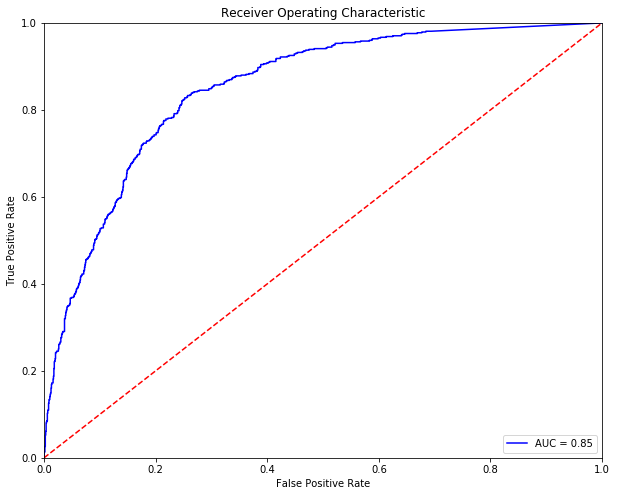

Optimal Threshold is 0.3048461414236478
Accuracy on test data is: 0.7788659793814433


Predicted  False  True  __all__
Actual                         
False       1063   302     1365
True         127   448      575
__all__     1190   750     1940

In [335]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [336]:
table_80_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [337]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.8021907216494846

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4449   976     5425
True         559  1776     2335
__all__     5008  2752     7760

Accuracy of the  Logistic  model for test data is: 0.797938144329897

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1129   236     1365
True         156   419      575
__all__     1285   655     1940

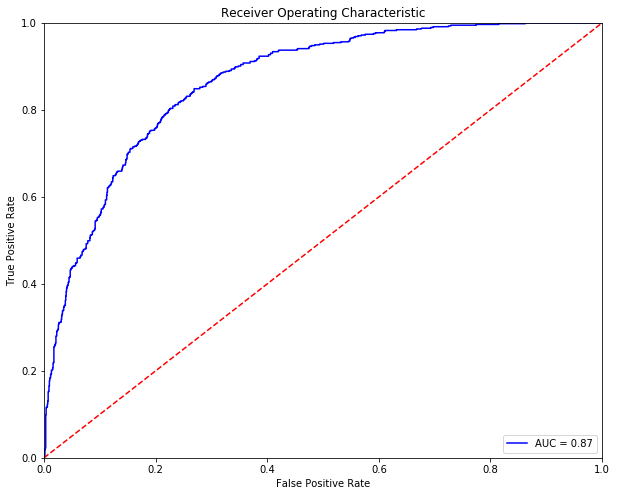

Optimal Threshold is 0.45958877284406163
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1073   292     1365
True         124   451      575
__all__     1197   743     1940

In [338]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [339]:
table_80_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [340]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.6990979381443299

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          5425  0     5425
1          2335  0     2335
__all__    7760  0     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.7036082474226805

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1365  0     1365
1           575  0      575
__all__    1940  0     1940

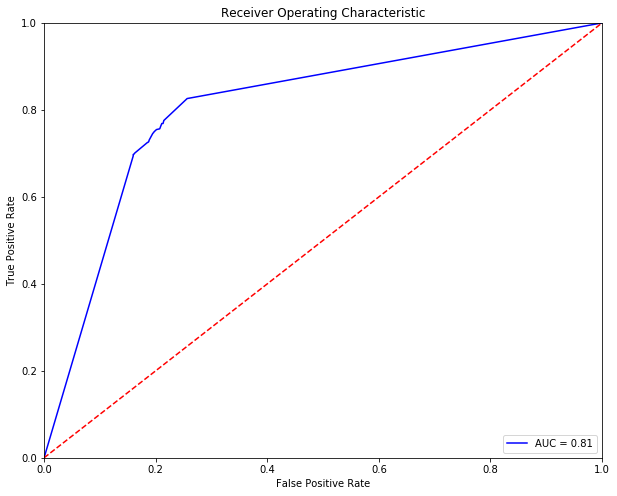

Optimal Threshold is 0.2649172341191586
Accuracy on test data is: 0.7814432989690722


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         133   442      575
__all__     1207   733     1940

In [341]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [342]:
table_80_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

5425
0
0
5425
2335
0
0
2335
1.0
0.0
0.0
1.0
1365
0
0
1365
575
0
0
575
1.0
0.0
0.0
1.0


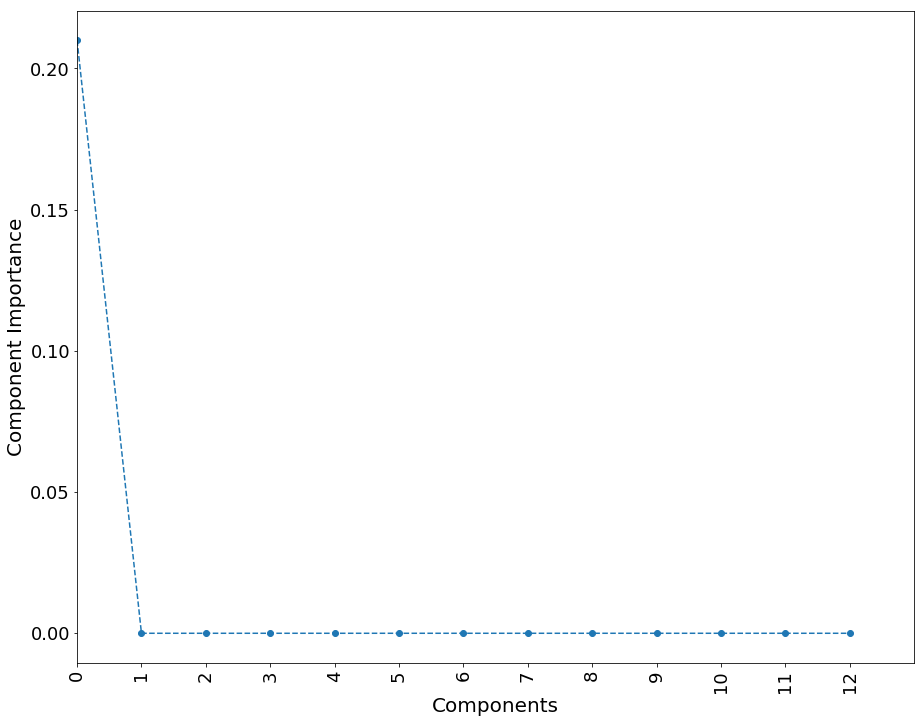

In [343]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [344]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8094072164948454

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4669   756     5425
True         723  1612     2335
__all__     5392  2368     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.790721649484536

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1171   194     1365
True         212   363      575
__all__     1383   557     1940

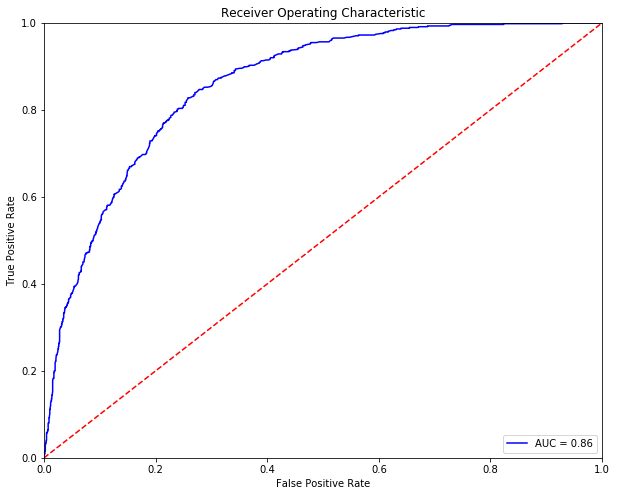

Optimal Threshold is 0.4919506150635833
Accuracy on test data is: 0.777319587628866


Predicted  False  True  __all__
Actual                         
False       1062   303     1365
True         129   446      575
__all__     1191   749     1940

In [345]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [346]:
table_80_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

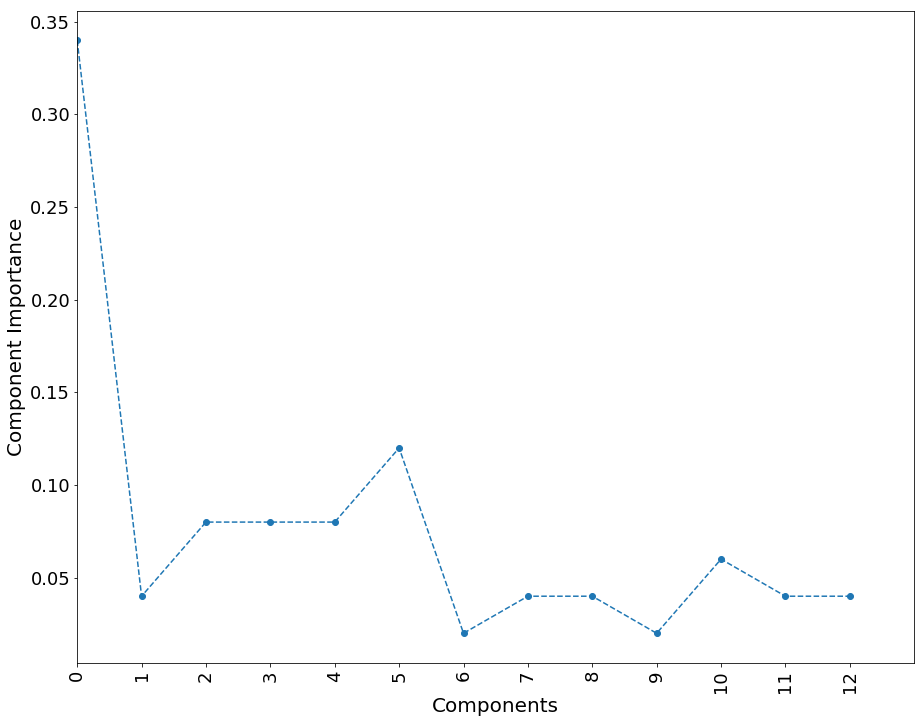

In [347]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [348]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8168814432989691

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4691   734     5425
True         687  1648     2335
__all__     5378  2382     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.7984536082474227

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   191     1365
True         200   375      575
__all__     1374   566     1940

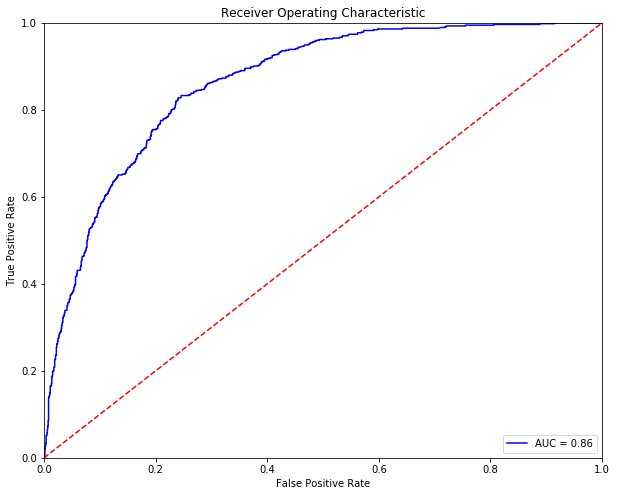

Optimal Threshold is 0.32807144113378456
Accuracy on test data is: 0.7814432989690722


Predicted  False  True  __all__
Actual                         
False       1067   298     1365
True         126   449      575
__all__     1193   747     1940

In [349]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [350]:
table_80_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

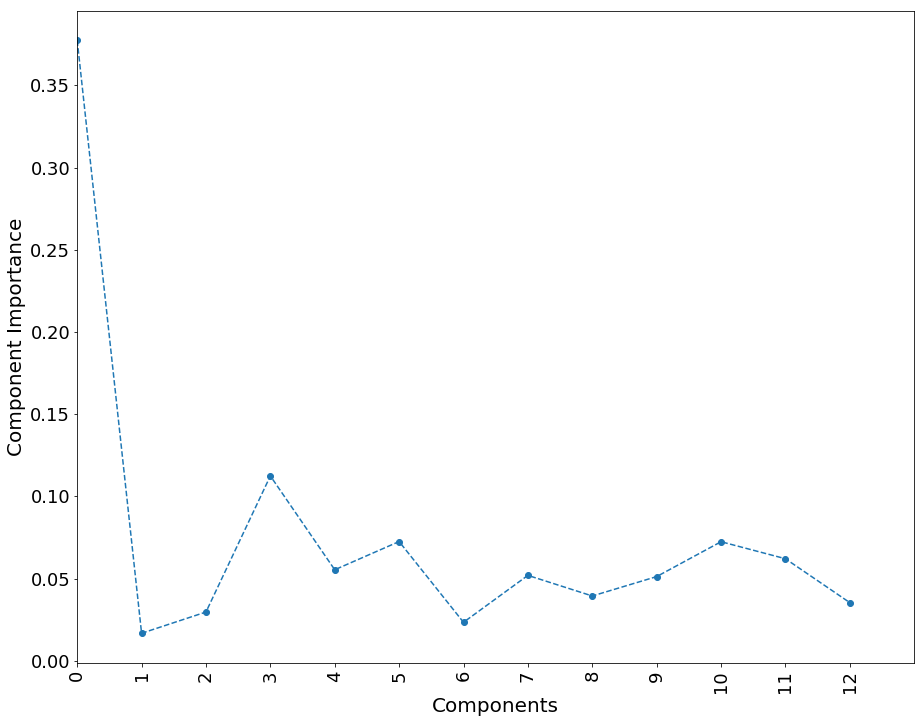

In [351]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [352]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.7984536082474227

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4701   724     5425
True         840  1495     2335
__all__     5541  2219     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.7819587628865979

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1174   191     1365
True         232   343      575
__all__     1406   534     1940

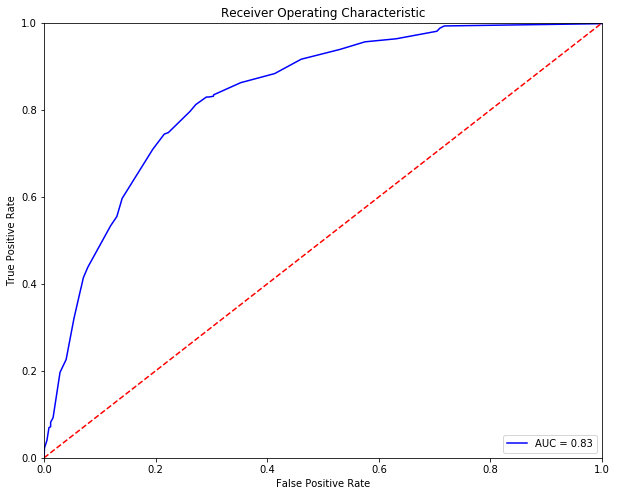

Optimal Threshold is 0.38636363636363635
Accuracy on test data is: 0.772680412371134


Predicted  False  True  __all__
Actual                         
False       1071   294     1365
True         147   428      575
__all__     1218   722     1940

In [353]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [354]:
table_80_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [355]:
%%capture
table_80_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

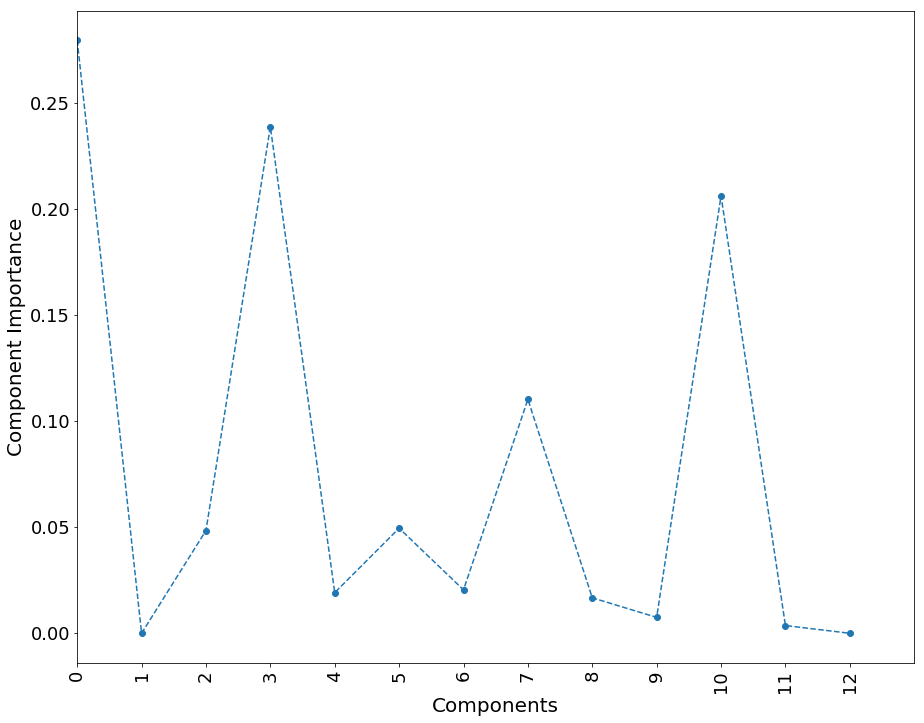

In [356]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [357]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.935180412371134

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5272   153     5425
True         350  1985     2335
__all__     5622  2138     7760

Accuracy of the  Bagging  model for test data is: 0.7948453608247422

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1181   184     1365
True         214   361      575
__all__     1395   545     1940

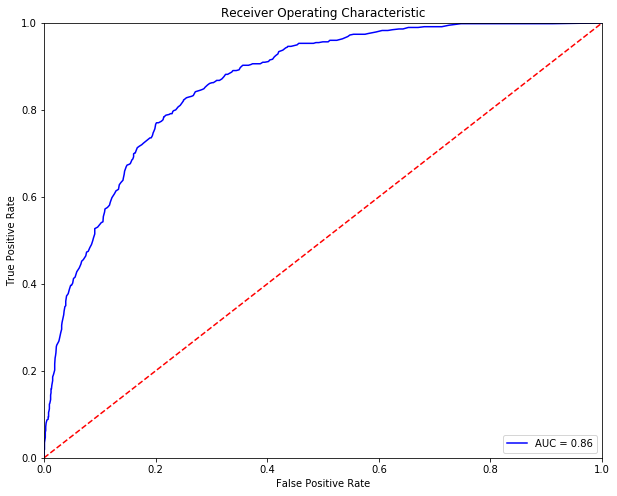

Optimal Threshold is 0.38
Accuracy on test data is: 0.7850515463917526


Predicted  False  True  __all__
Actual                         
False       1072   293     1365
True         124   451      575
__all__     1196   744     1940

In [358]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [359]:
table_80_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [360]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.945360824742268


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       5380    45     5425
True         379  1956     2335
__all__     5759  2001     7760

The test accuracy is: 0.7963917525773195


Predicted  False  True  __all__
Actual                         
False       1220   145     1365
True         250   325      575
__all__     1470   470     1940

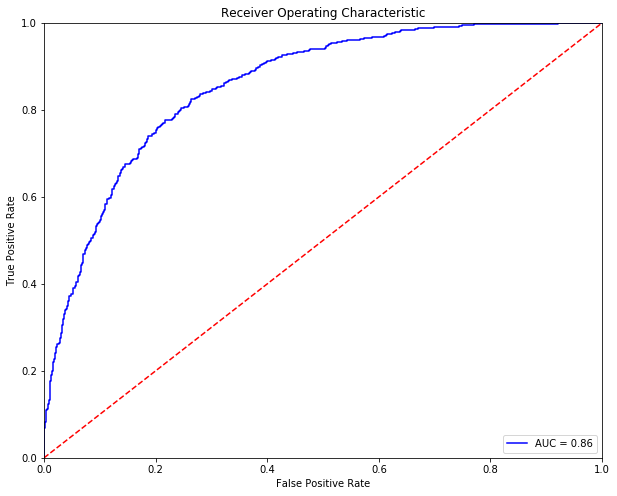

Optimal Threshold is 0.36086820851059315
Accuracy on test data is: 0.777319587628866


Predicted  False  True  __all__
Actual                         
False       1062   303     1365
True         129   446      575
__all__     1191   749     1940

In [361]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [362]:
table_80_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [363]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8596649484536083


Predicted  False  True  __all__
Actual                         
False       4902   523     5425
True         566  1769     2335
__all__     5468  2292     7760

The accuracy of the model on test data is: 0.7845360824742268


Predicted  False  True  __all__
Actual                         
False       1161   204     1365
True         214   361      575
__all__     1375   565     1940

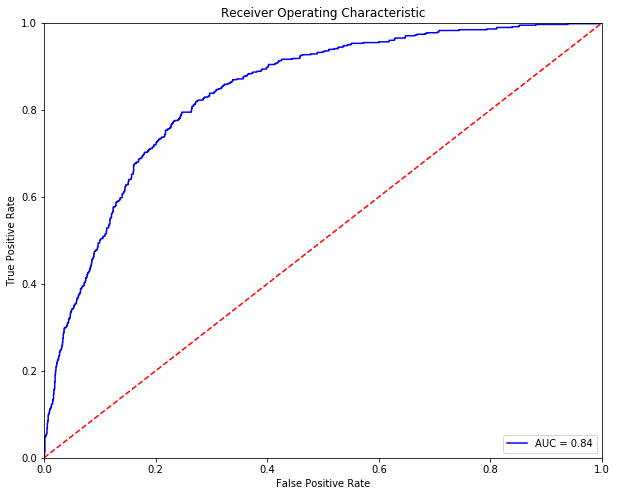

Optimal Threshold is 0.32099283
Accuracy of Logistic Model on training data is: 0.7695876288659794


Predicted  False  True  __all__
Actual                         
False       1051   314     1365
True         133   442      575
__all__     1184   756     1940

In [364]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [365]:
table_80_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [366]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.3min finished


The accuracy of the model on training data is: 0.8094072164948454


Predicted  False  True  __all__
Actual                         
False       4549   876     5425
True         603  1732     2335
__all__     5152  2608     7760

The accuracy of the model on test data is: 0.7958762886597938


Predicted  False  True  __all__
Actual                         
False       1144   221     1365
True         175   400      575
__all__     1319   621     1940

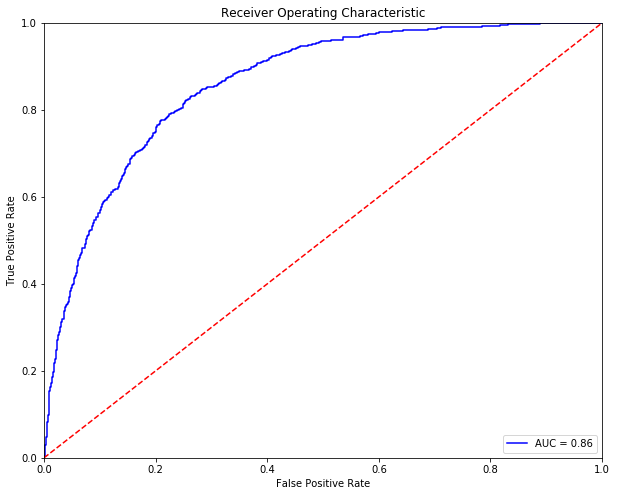

Optimal Threshold is 0.23415928
Accuracy on test data is: 0.7809278350515464


Predicted  False  True  __all__
Actual                         
False       1066   299     1365
True         126   449      575
__all__     1192   748     1940

In [367]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [368]:
table_80_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [369]:
table_80_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  2335.000000  5425.000000     0.000000   
LogisticRegression          0.802191  1776.000000  4449.000000   976.000000   
RandomForestClassifier      0.699098  3792.606314  1632.393686  1632.393686   
AdaBoostClassifier          0.809407  1612.000000  4669.000000   756.000000   
GradientBoostingClassifier  0.816881  1648.000000  4691.000000   734.000000   
ExtraTreeClassifier         0.798454  1495.000000  4701.000000   724.000000   
BaggingClassifier           0.935180  1985.000000  5272.000000   153.000000   
VotingClassifier            0.945361  1956.000000  5380.000000    45.000000   
Neural Network-1            0.859665  1769.000000  4902.000000   523.000000   
Neural-Network-2            0.809407  1732.000000  4549.000000   876.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          559.000000  0.179908  0.239400  
RandomForestClassifier      702.606314  0.699098  0.300902  
AdaBoostClassifier          723.000000  0.139355  0.309636  
GradientBoostingClassifier  687.000000  0.135300  0.294218  
ExtraTreeClassifier         840.000000  0.133456  0.359743  
BaggingClassifier           350.000000  0.028203  0.149893  
VotingClassifier            379.000000  0.008295  0.162313  
Neural Network-1            566.000000  0.096406  0.242398  
Neural-Network-2            603.000000  0.161475  0.258244

Comparision Table for Test Accuracies:


accuracy          TP           TN          FP  \
index                                                                       
KNeighborsClassifier        0.788144  320.000000  1209.000000  156.000000   
LogisticRegression          0.797938  419.000000  1129.000000  236.000000   
RandomForestClassifier      0.703608  960.425258   404.574742  404.574742   
AdaBoostClassifier          0.790722  363.000000  1171.000000  194.000000   
GradientBoostingClassifier  0.798454  375.000000  1174.000000  191.000000   
ExtraTreeClassifier         0.781959  343.000000  1174.000000  191.000000   
BaggingClassifier           0.794845  361.000000  1181.000000  184.000000   
VotingClassifier            0.796392  325.000000  1220.000000  145.000000   
Neural Network-1            0.784536  361.000000  1161.000000  204.000000   
Neural-Network-2            0.795876  400.000000  1144.000000  221.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        255.000000  0.114286  0.443478  
LogisticRegression          156.000000  0.172894  0.271304  
RandomForestClassifier      170.425258  0.703608  0.296392  
AdaBoostClassifier          212.000000  0.142125  0.368696  
GradientBoostingClassifier  200.000000  0.139927  0.347826  
ExtraTreeClassifier         232.000000  0.139927  0.403478  
BaggingClassifier           214.000000  0.134799  0.372174  
VotingClassifier            250.000000  0.106227  0.434783  
Neural Network-1            214.000000  0.149451  0.372174  
Neural-Network-2            175.000000  0.161905  0.304348

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.778866  448.0  1063.0  302.0  127.0  0.221245   
LogisticRegression          0.785567  451.0  1073.0  292.0  124.0  0.213919   
RandomForestClassifier      0.781443  442.0  1074.0  291.0  133.0  0.213187   
AdaBoostClassifier          0.777320  446.0  1062.0  303.0  129.0  0.221978   
GradientBoostingClassifier  0.781443  449.0  1067.0  298.0  126.0  0.218315   
ExtraTreeClassifier         0.772680  428.0  1071.0  294.0  147.0  0.215385   
BaggingClassifier           0.785052  451.0  1072.0  293.0  124.0  0.214652   
VotingClassifier            0.777320  446.0  1062.0  303.0  129.0  0.221978   
Neural Network-1            0.769588  442.0  1051.0  314.0  133.0  0.230037   
Neural-Network-2            0.780928  449.0  1066.0  299.0  126.0  0.219048   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.220870   0.304846  0.849872  
LogisticRegression          0.215652   0.459589  0.866549  
RandomForestClassifier      0.231304   0.264917  0.808015  
AdaBoostClassifier          0.224348   0.491951  0.858121  
GradientBoostingClassifier  0.219130   0.328071  0.862870  
ExtraTreeClassifier         0.255652   0.386364  0.834123  
BaggingClassifier           0.215652   0.380000  0.861897  
VotingClassifier            0.224348   0.360868  0.856306  
Neural Network-1            0.231304   0.320993  0.840070  
Neural-Network-2            0.219130   0.234159  0.860508

In [370]:
table_80_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [371]:
table_80_50_PCA_train_avg['accuracy']=(table_80_50_PCA_0_train['accuracy']+table_80_50_PCA_10_train['accuracy']+table_80_50_PCA_20_train['accuracy'])/3.0
table_80_50_PCA_train_avg['FPR']=(table_80_50_PCA_0_train['FPR']+table_80_50_PCA_10_train['FPR']+table_80_50_PCA_20_train['FPR'])/3.0
table_80_50_PCA_train_avg['FNR']=(table_80_50_PCA_0_train['FNR']+table_80_50_PCA_10_train['FNR']+table_80_50_PCA_20_train['FNR'])/3.0

In [372]:
table_80_50_PCA_test_avg['accuracy']=(table_80_50_PCA_0_test['accuracy']+table_80_50_PCA_10_test['accuracy']+table_80_50_PCA_20_test['accuracy'])/3.0
table_80_50_PCA_test_avg['FPR']=(table_80_50_PCA_0_test['FPR']+table_80_50_PCA_10_test['FPR']+table_80_50_PCA_20_test['FPR'])/3.0
table_80_50_PCA_test_avg['FNR']=(table_80_50_PCA_0_test['FNR']+table_80_50_PCA_10_test['FNR']+table_80_50_PCA_20_test['FNR'])/3.0

In [373]:
table_80_50_PCA_test_roc_avg['accuracy']=(table_80_50_PCA_0_test_roc['accuracy']+table_80_50_PCA_10_test_roc['accuracy']+table_80_50_PCA_20_test_roc['accuracy'])/3.0
table_80_50_PCA_test_roc_avg['FPR']=(table_80_50_PCA_0_test_roc['FPR']+table_80_50_PCA_10_test_roc['FPR']+table_80_50_PCA_20_test_roc['FPR'])/3.0
table_80_50_PCA_test_roc_avg['FNR']=(table_80_50_PCA_0_test_roc['FNR']+table_80_50_PCA_10_test_roc['FNR']+table_80_50_PCA_20_test_roc['FNR'])/3.0
table_80_50_PCA_test_roc_avg['auc']=(table_80_50_PCA_0_test_roc['auc']+table_80_50_PCA_10_test_roc['auc']+table_80_50_PCA_20_test_roc['auc'])/3.0

In [374]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.803823  0.157540  0.286358
RandomForestClassifier      0.700387  0.700387  0.299613
AdaBoostClassifier          0.813015  0.136233  0.305725
GradientBoostingClassifier  0.815851  0.136037  0.296698
ExtraTreeClassifier         0.804296  0.148999  0.304595
BaggingClassifier           0.933677  0.027792  0.156427
VotingClassifier            0.944158  0.009261  0.164759
Neural Network-1            0.865378  0.085332  0.250023
Neural-Network-2            0.810825  0.151985  0.276182

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.795533  0.109926  0.423375
LogisticRegression          0.807904  0.148385  0.294226
RandomForestClassifier      0.698454  0.698454  0.301546
AdaBoostClassifier          0.801546  0.137924  0.338519
GradientBoostingClassifier  0.806529  0.136493  0.325440
ExtraTreeClassifier         0.802062  0.148430  0.314020
BaggingClassifier           0.803265  0.124894  0.362903
VotingClassifier            0.798454  0.104562  0.426171
Neural Network-1            0.790206  0.133721  0.385299
Neural-Network-2            0.807216  0.148532  0.295228

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.792268  0.207544  0.208154  0.860453
LogisticRegression          0.796392  0.203107  0.204772  0.870888
RandomForestClassifier      0.798797  0.193957  0.217797  0.821630
AdaBoostClassifier          0.793643  0.205327  0.208759  0.867734
GradientBoostingClassifier  0.798282  0.201633  0.201923  0.872346
ExtraTreeClassifier         0.798454  0.176032  0.260715  0.848337
BaggingClassifier           0.797251  0.201159  0.206352  0.867994
VotingClassifier            0.789691  0.209736  0.211638  0.863722
Neural Network-1            0.779038  0.220388  0.222276  0.852121
Neural-Network-2            0.795533  0.204134  0.205251  0.866049

###  <a id='1.D' style="text-decoration : none; color : #000000;">70:30 Train Test Split with PCA</a>
#### Random State 0

In [375]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP   DIP  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  4568  42    49   57  1200   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16   4     6    5     7   

                                                    NREC         PAR  \
User                                                                   
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5038  146.820762   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    16    5.937500   

                                                          PAS        LEN  \
User                                                                       
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  56.766574  78.731441   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...   9.375000  34.125000   

                                                            BYS  \
User                                                              
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  5765.397777   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...  1506.000000   

                                                              BYR  0000  0100  \
User                                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...  184063.583962   578   185   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...    3370.125000     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   138   268   205   180   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   149   136   156   104   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   120   158   254   116   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     3     2     0   

                                                    1400  1500  1600  1700  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   207   118   134   215   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0     7     0   

                                                    1800  1900  2000  2100  \
User                                                                         
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   177   142   343   221   
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     2     0     0     0   

                                                    2200  2300  
User                                                            
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dc...   295   439  
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d...     0     0

1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
1f82574ddff42f1b88e62ffb165c3ec923566ba35c529384374b1ba66ef60756    0
ecb38e6cc658213a1e435bcb534a531fef9f8d54b7ec9b27419a1065e19f4f10    0
f7556cb149bd02ef75b3657db80430c61b85847c0cc55c90d7dd6ed6a912d4d1    0
c1084232da26636ffe647ab497b1a09c82db9436937f4898e025587d1e03ad49    0
4ad4b5e8c8f698eabd4fa898c91abb574b6014e24c7e004adae9f209e7ec9b91    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9395643131079252
The train/test split ratio is 70:30


In [376]:
display(X_pca_13[0:1])

array([[ 0.40649251,  0.00777116, -0.33875209, -0.12851905, -0.54714251,
        -0.06815212, -0.16245366, -0.44643038, -0.42793617, -0.62697446,
        -0.88893596,  0.87171293,  1.44801305]])

In [377]:
## Table to store training and test measures
table_70_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           50  uniform

Accuracy of the  KNN  model for the training data is: 0.8106038291605302

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4299   472     4771
True         814  1205     2019
__all__     5113  1677     6790

Accuracy of the  KNN  model for test data is: 0.8030927835051547

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1828   191     2019
True         382   509      891
__all__     2210   700     2910

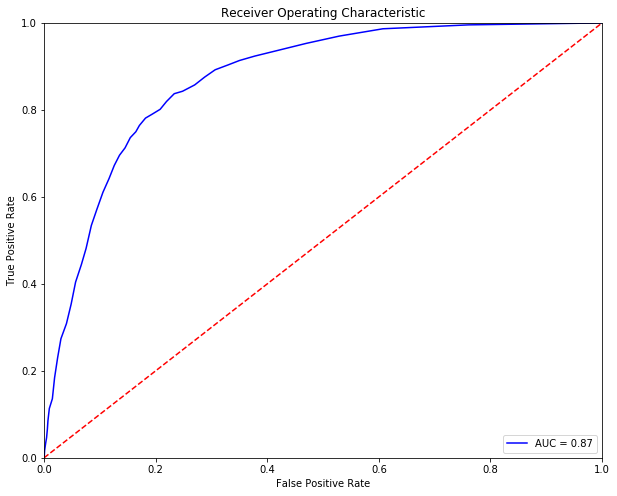

Optimal Threshold is 0.3
Accuracy on test data is: 0.8013745704467354


Predicted  False  True  __all__
Actual                         
False       1628   391     2019
True         187   704      891
__all__     1815  1095     2910

In [379]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [380]:
table_70_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [381]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.8017673048600884

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3931   840     4771
True         506  1513     2019
__all__     4437  2353     6790

Accuracy of the  Logistic  model for test data is: 0.8178694158075601

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1685   334     2019
True         196   695      891
__all__     1881  1029     2910

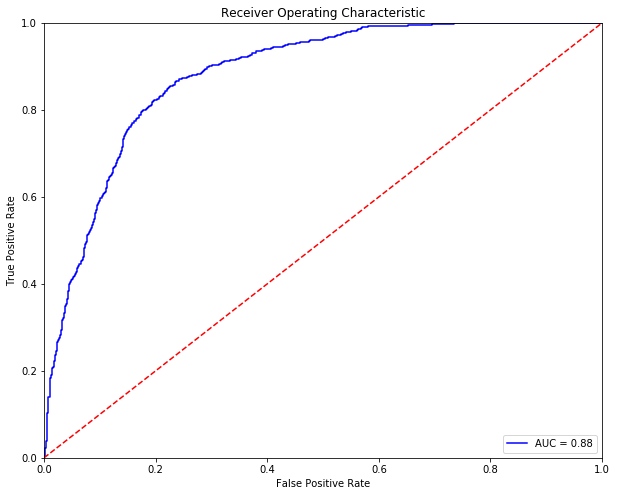

Optimal Threshold is 0.4709117055376606
Accuracy on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       1634   385     2019
True         170   721      891
__all__     1804  1106     2910

In [382]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [383]:
table_70_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [384]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7026509572901325

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4771  0     4771
1          2019  0     2019
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.6938144329896907

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2019  0     2019
1           891  0      891
__all__    2910  0     2910

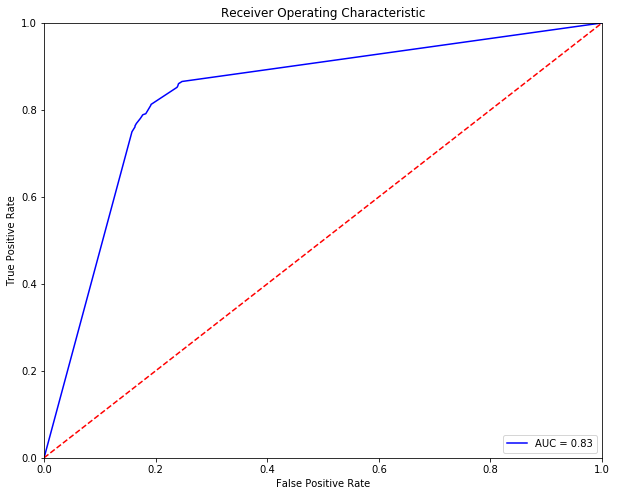

Optimal Threshold is 0.31539115741262674
Accuracy on test data is: 0.8096219931271478


Predicted  False  True  __all__
Actual                         
False       1651   368     2019
True         186   705      891
__all__     1837  1073     2910

In [385]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [386]:
table_70_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

4771
0
0
4771
2019
0
0
2019
1.0
0.0
0.0
1.0
2019
0
0
2019
891
0
0
891
1.0
0.0
0.0
1.0


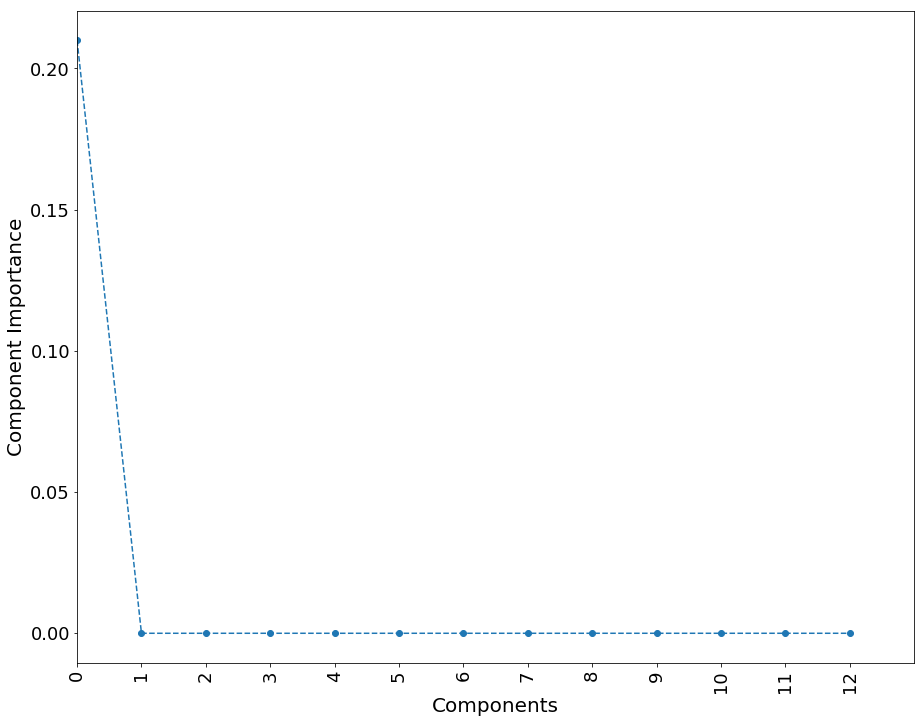

In [387]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [388]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8116347569955817

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4123   648     4771
True         631  1388     2019
__all__     4754  2036     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8209621993127147

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1759   260     2019
True         261   630      891
__all__     2020   890     2910

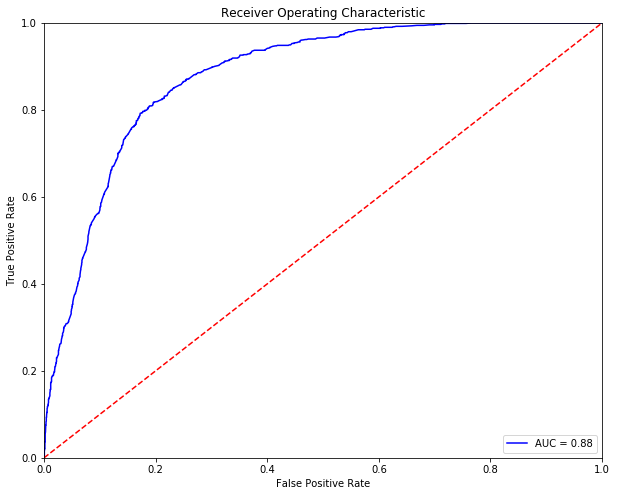

Optimal Threshold is 0.47755788451990716
Accuracy on test data is: 0.8103092783505155


Predicted  False  True  __all__
Actual                         
False       1637   382     2019
True         170   721      891
__all__     1807  1103     2910

In [389]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [390]:
table_70_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

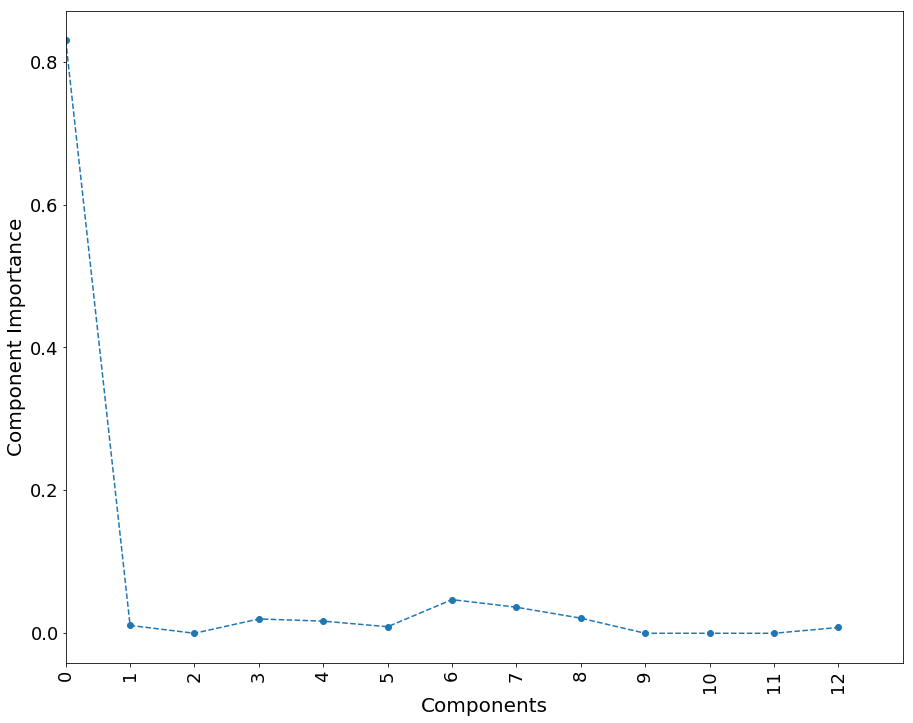

In [391]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [392]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.05  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           100             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8108983799705449

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4103   668     4771
True         616  1403     2019
__all__     4719  2071     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8147766323024055

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1738   281     2019
True         258   633      891
__all__     1996   914     2910

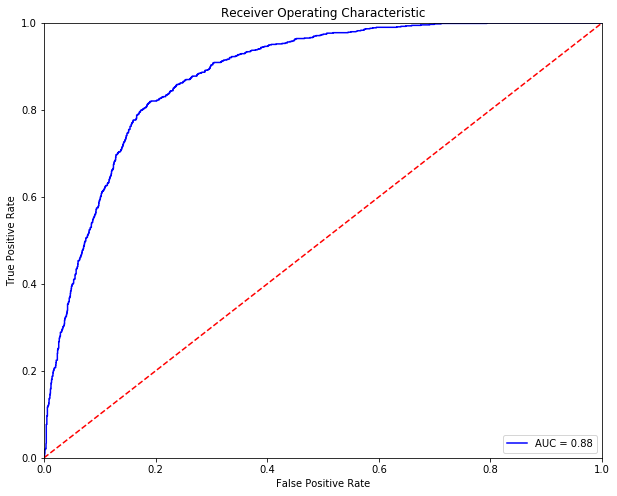

Optimal Threshold is 0.3543482307555786
Accuracy on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1643   376     2019
True         167   724      891
__all__     1810  1100     2910

In [393]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [394]:
table_70_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

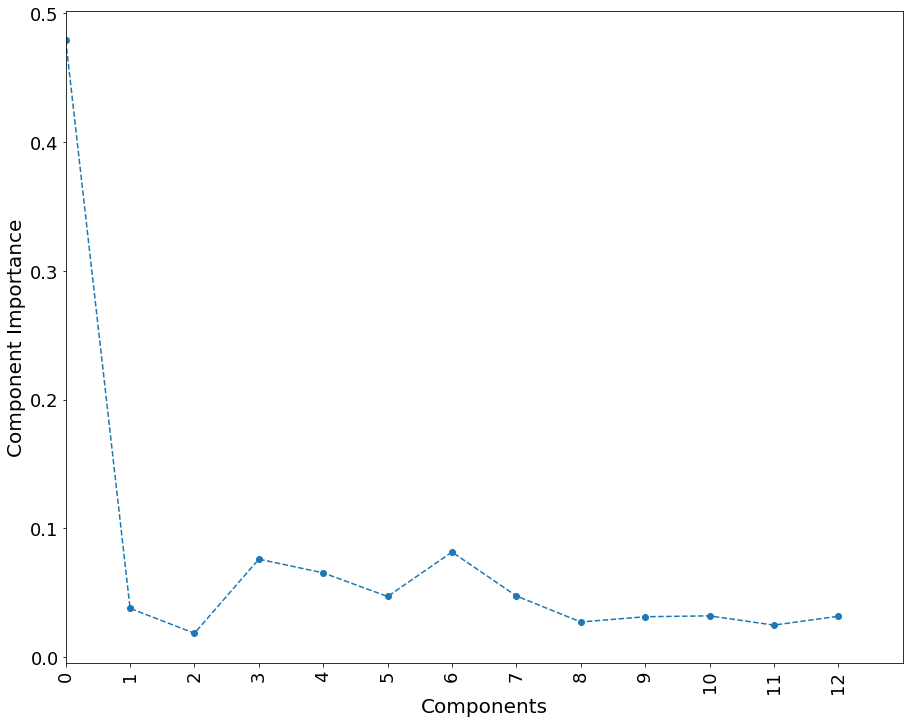

In [395]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [396]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.8029455081001473

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3915   856     4771
True         482  1537     2019
__all__     4397  2393     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.813745704467354

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1670   349     2019
True         193   698      891
__all__     1863  1047     2910

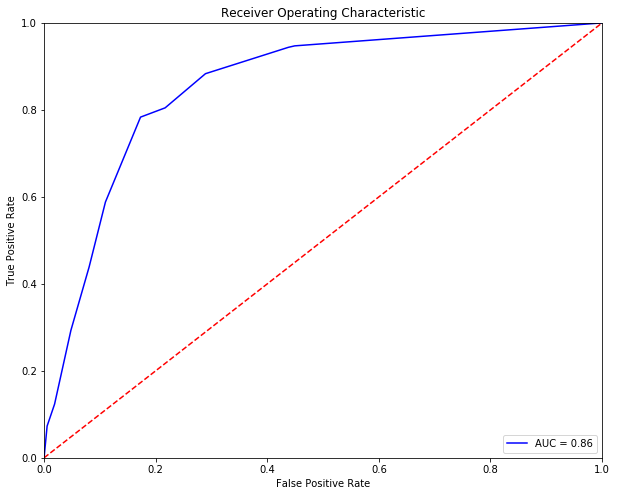

Optimal Threshold is 0.352112676056338
Accuracy on test data is: 0.813745704467354


Predicted  False  True  __all__
Actual                         
False       1670   349     2019
True         193   698      891
__all__     1863  1047     2910

In [397]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [398]:
table_70_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [399]:
%%capture
table_70_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

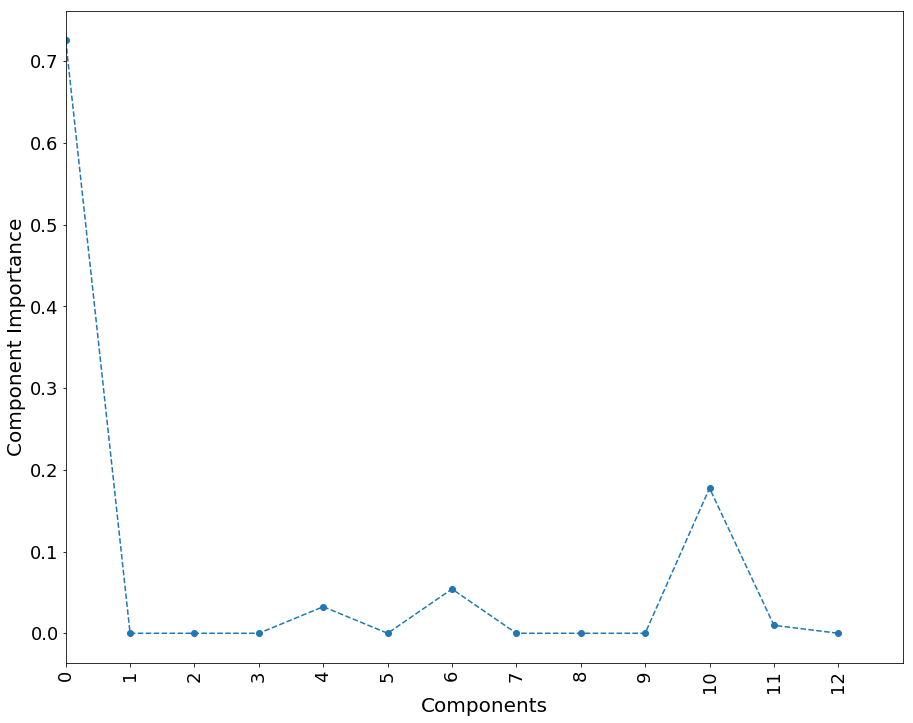

In [400]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [401]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9624447717231223

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4731    40     4771
True         215  1804     2019
__all__     4946  1844     6790

Accuracy of the  Bagging  model for test data is: 0.8109965635738832

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1753   266     2019
True         284   607      891
__all__     2037   873     2910

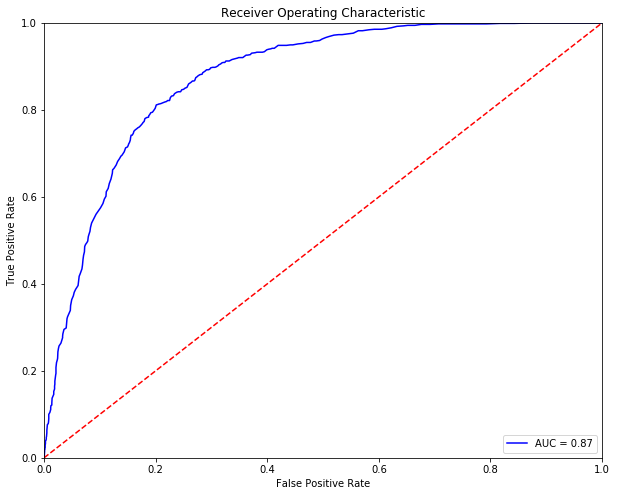

Optimal Threshold is 0.3933333333333333
Accuracy on test data is: 0.8020618556701031


Predicted  False  True  __all__
Actual                         
False       1623   396     2019
True         180   711      891
__all__     1803  1107     2910

In [402]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [403]:
table_70_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [404]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9425625920471281


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4730    41     4771
True         349  1670     2019
__all__     5079  1711     6790

The test accuracy is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False       1804   215     2019
True         365   526      891
__all__     2169   741     2910

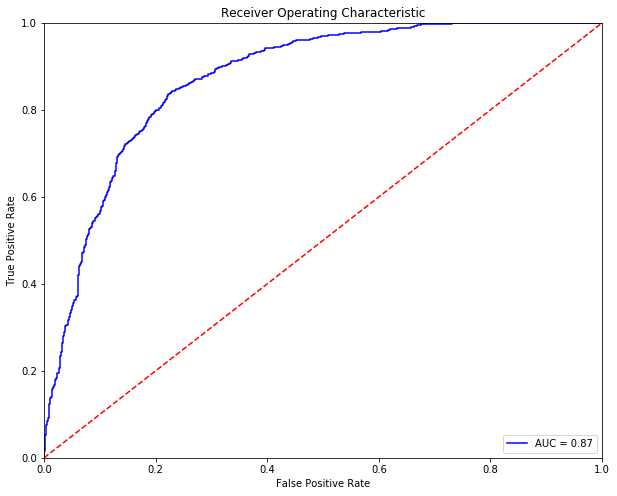

Optimal Threshold is 0.36478165902302706
Accuracy on test data is: 0.7986254295532647


Predicted  False  True  __all__
Actual                         
False       1613   406     2019
True         180   711      891
__all__     1793  1117     2910

In [405]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [406]:
table_70_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [407]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8564064801353769


Predicted  False  True  __all__
Actual                         
False       4376   395     4771
True         580  1439     2019
__all__     4956  1834     6790

The accuracy of the model on test data is: 0.7848797250859106


Predicted  False  True  __all__
Actual                         
False       1755   264     2019
True         362   529      891
__all__     2117   793     2910

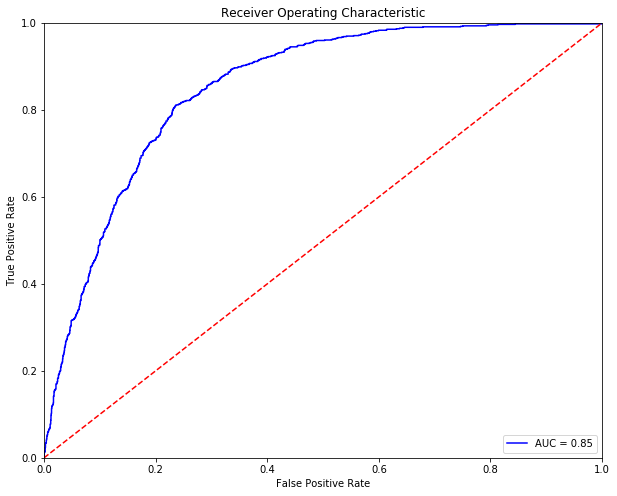

Optimal Threshold is 0.33920732
Accuracy of Logistic Model on training data is: 0.7783505154639175


Predicted  False  True  __all__
Actual                         
False       1572   447     2019
True         198   693      891
__all__     1770  1140     2910

In [408]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [409]:
table_70_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [410]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.1min finished


The accuracy of the model on training data is: 0.808100147275405


Predicted  False  True  __all__
Actual                         
False       4041   730     4771
True         573  1446     2019
__all__     4614  2176     6790

The accuracy of the model on test data is: 0.8216494845360824


Predicted  False  True  __all__
Actual                         
False       1728   291     2019
True         228   663      891
__all__     1956   954     2910

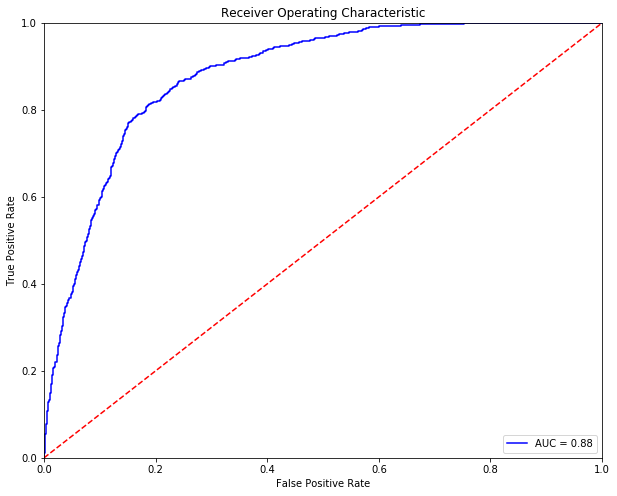

Optimal Threshold is 0.3331307
Accuracy on test data is: 0.8116838487972509


Predicted  False  True  __all__
Actual                         
False       1639   380     2019
True         168   723      891
__all__     1807  1103     2910

In [411]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [412]:
table_70_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [413]:
table_70_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        0.810604  1205.000000  4299.000000   472.000000   
LogisticRegression          0.801767  1513.000000  3931.000000   840.000000   
RandomForestClassifier      0.702651  3352.347717  1418.652283  1418.652283   
AdaBoostClassifier          0.811635  1388.000000  4123.000000   648.000000   
GradientBoostingClassifier  0.810898  1403.000000  4103.000000   668.000000   
ExtraTreeClassifier         0.802946  1537.000000  3915.000000   856.000000   
BaggingClassifier           0.962445  1804.000000  4731.000000    40.000000   
VotingClassifier            0.942563  1670.000000  4730.000000    41.000000   
Neural Network-1            0.856406  1439.000000  4376.000000   395.000000   
Neural-Network-2            0.808100  1446.000000  4041.000000   730.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        814.000000  0.098931  0.403170  
LogisticRegression          506.000000  0.176064  0.250619  
RandomForestClassifier      600.347717  0.702651  0.297349  
AdaBoostClassifier          631.000000  0.135821  0.312531  
GradientBoostingClassifier  616.000000  0.140013  0.305102  
ExtraTreeClassifier         482.000000  0.179417  0.238732  
BaggingClassifier           215.000000  0.008384  0.106488  
VotingClassifier            349.000000  0.008594  0.172858  
Neural Network-1            580.000000  0.082792  0.287271  
Neural-Network-2            573.000000  0.153008  0.283804

Comparision Table for Test Accuracies:


accuracy          TP          TN         FP  \
index                                                                     
KNeighborsClassifier        0.803093   509.00000  1828.00000  191.00000   
LogisticRegression          0.817869   695.00000  1685.00000  334.00000   
RandomForestClassifier      0.693814  1400.81134   618.18866  618.18866   
AdaBoostClassifier          0.820962   630.00000  1759.00000  260.00000   
GradientBoostingClassifier  0.814777   633.00000  1738.00000  281.00000   
ExtraTreeClassifier         0.813746   698.00000  1670.00000  349.00000   
BaggingClassifier           0.810997   607.00000  1753.00000  266.00000   
VotingClassifier            0.800687   526.00000  1804.00000  215.00000   
Neural Network-1            0.784880   529.00000  1755.00000  264.00000   
Neural-Network-2            0.821649   663.00000  1728.00000  291.00000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier        382.00000  0.094601  0.428732  
LogisticRegression          196.00000  0.165428  0.219978  
RandomForestClassifier      272.81134  0.693814  0.306186  
AdaBoostClassifier          261.00000  0.128777  0.292929  
GradientBoostingClassifier  258.00000  0.139178  0.289562  
ExtraTreeClassifier         193.00000  0.172858  0.216611  
BaggingClassifier           284.00000  0.131748  0.318743  
VotingClassifier            365.00000  0.106488  0.409652  
Neural Network-1            362.00000  0.130758  0.406285  
Neural-Network-2            228.00000  0.144131  0.255892

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.801375  704.0  1628.0  391.0  187.0  0.193660   
LogisticRegression          0.809278  721.0  1634.0  385.0  170.0  0.190688   
RandomForestClassifier      0.809622  705.0  1651.0  368.0  186.0  0.182268   
AdaBoostClassifier          0.810309  721.0  1637.0  382.0  170.0  0.189203   
GradientBoostingClassifier  0.813402  724.0  1643.0  376.0  167.0  0.186231   
ExtraTreeClassifier         0.813746  698.0  1670.0  349.0  193.0  0.172858   
BaggingClassifier           0.802062  711.0  1623.0  396.0  180.0  0.196137   
VotingClassifier            0.798625  711.0  1613.0  406.0  180.0  0.201090   
Neural Network-1            0.778351  693.0  1572.0  447.0  198.0  0.221397   
Neural-Network-2            0.811684  723.0  1639.0  380.0  168.0  0.188212   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.209877   0.300000  0.871958  
LogisticRegression          0.190797   0.470912  0.881243  
RandomForestClassifier      0.208754   0.315391  0.834334  
AdaBoostClassifier          0.190797   0.477558  0.878529  
GradientBoostingClassifier  0.187430   0.354348  0.881909  
ExtraTreeClassifier         0.216611   0.352113  0.856491  
BaggingClassifier           0.202020   0.393333  0.874235  
VotingClassifier            0.202020   0.364782  0.873191  
Neural Network-1            0.222222   0.339207  0.850741  
Neural-Network-2            0.188552   0.333131  0.880776

#### Random State 10

In [414]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...   80   8    12    4   37   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  548   8    19    8  205   

                                                    NREC         PAR  \
User                                                                   
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    83  302.084337   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   554  510.418773   

                                                           PAS        LEN  \
User                                                                        
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  170.180723  63.951807   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  159.868231  45.395307   

                                                             BYS  \
User                                                               
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  15306.156627   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  13566.797834   

                                                              BYR  0000  0100  \
User                                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...  407432.662651     4     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...  655119.371841     0     0   

                                                    0200  0300  0400  0500  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     7     1     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    0600  0700  0800  0900  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     1     0     0     7   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0     0     0   

                                                    1000  1100  1200  1300  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    12     5     6     0   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0   105    10   253   

                                                    1400  1500  1600  1700  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     0     1     3   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...   116    23     3     9   

                                                    1800  1900  2000  2100  \
User                                                                         
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...     6     5     3     2   
059e225e600d51b34c32768dc16436d7ad6965e7428e905...    32     3     0     0   

                                                    2200  2300  
User                                                            
c420a510d83a4c8d5e70f0fa79b896008585c400807126e...    11     0  
059e225e600d51b34c32768dc16436d7ad6965e7428e905...     0     0

1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
8886e9eff59dc97d3e4ef930640f3575611e7d41b31f25206c47096baf1f8309    0
9ad35a50636ead336e396b4e528bfa3f70f27723a8ef227b22740fa315b67e4d    1
173b2bd24b74b995aabd9bd3f5474256f85bc6c8445627cd1f9e279eb68a3fa6    1
3505b39af36b00af463d74b2b0188ff81aa512a614c5457537c5a196704341c1    1
455fd634ee53828c893eebbb4693f89e187303778d93d6fbff38a1f76bea18a5    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9379851197355754
The train/test split ratio is 70:30


In [415]:
display(X_pca_13[0:1])

array([[-0.6469245 ,  0.42319325,  0.29392578, -0.12475287,  0.03902895,
        -0.38374457, -0.44084112,  0.55847222, -0.09849   ,  0.57991348,
        -0.07028052,  0.13642173, -0.18660695]])

In [416]:
## Table to store training and test measures
table_70_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [417]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4762     0     4762
True           0  2028     2028
__all__     4762  2028     6790

Accuracy of the  KNN  model for test data is: 0.8003436426116839

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1797   231     2028
True         350   532      882
__all__     2147   763     2910

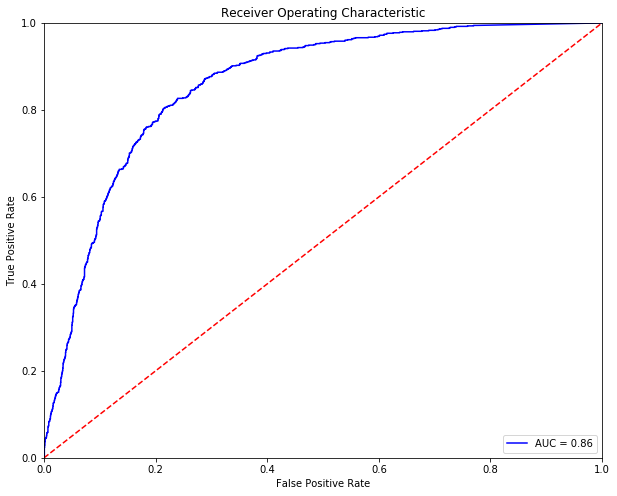

Optimal Threshold is 0.294500667102599
Accuracy on test data is: 0.790721649484536


Predicted  False  True  __all__
Actual                         
False       1604   424     2028
True         185   697      882
__all__     1789  1121     2910

In [418]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [419]:
table_70_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [420]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5       100          ovr   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.811340206185567

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3923   839     4762
True         442  1586     2028
__all__     4365  2425     6790

Accuracy of the  Logistic  model for test data is: 0.8020618556701031

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1656   372     2028
True         204   678      882
__all__     1860  1050     2910

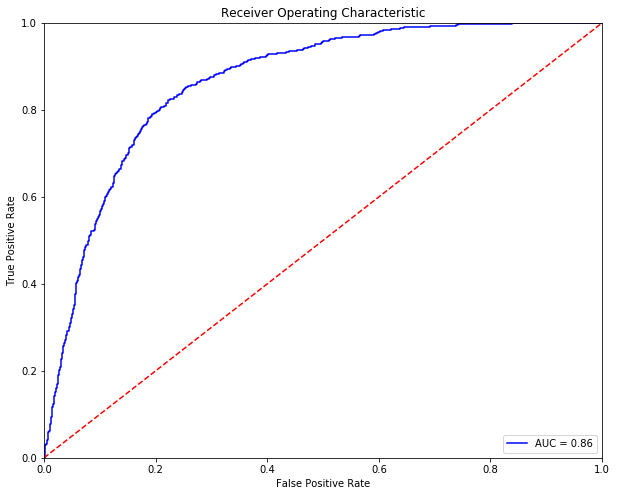

Optimal Threshold is 0.436868062539432
Accuracy on test data is: 0.7965635738831615


Predicted  False  True  __all__
Actual                         
False       1616   412     2028
True         180   702      882
__all__     1796  1114     2910

In [421]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [422]:
table_70_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [423]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7013254786450662

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4762  0     4762
1          2028  0     2028
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.6969072164948453

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2028  0     2028
1           882  0      882
__all__    2910  0     2910

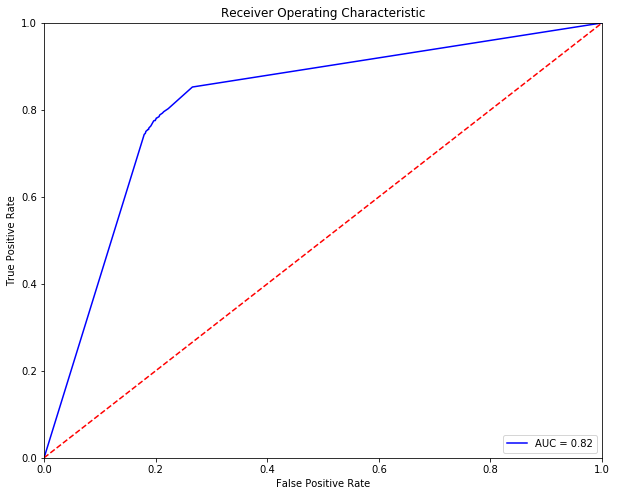

Optimal Threshold is 0.2704336338269238
Accuracy on test data is: 0.7914089347079037


Predicted  False  True  __all__
Actual                         
False       1608   420     2028
True         187   695      882
__all__     1795  1115     2910

In [424]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [425]:
table_70_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

4762
0
0
4762
2028
0
0
2028
1.0
0.0
0.0
1.0
2028
0
0
2028
882
0
0
882
1.0
0.0
0.0
1.0


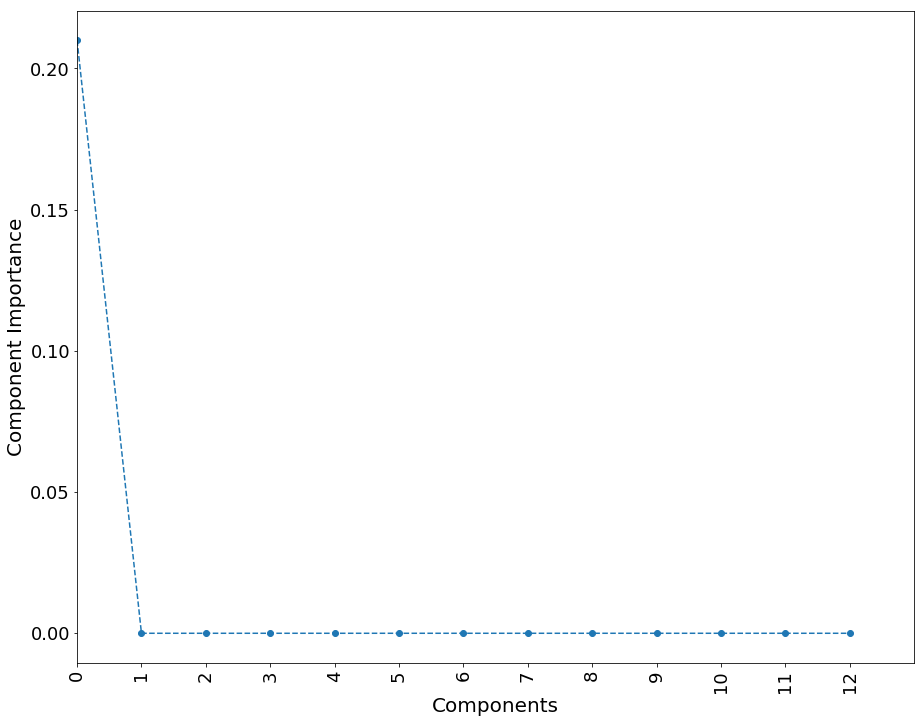

In [426]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [427]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8160530191458026

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4066   696     4762
True         553  1475     2028
__all__     4619  2171     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7982817869415808

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1712   316     2028
True         271   611      882
__all__     1983   927     2910

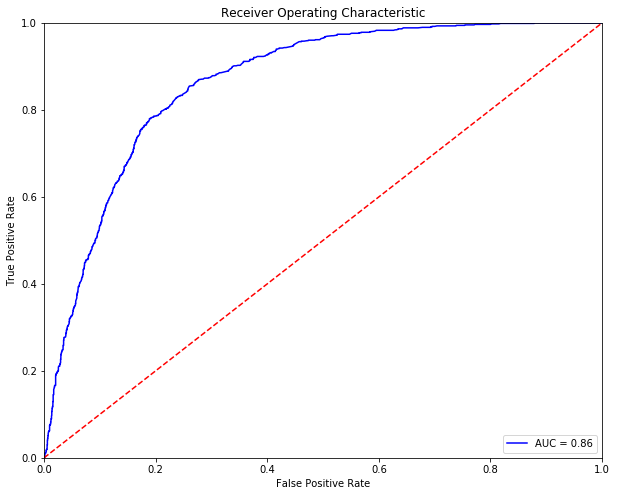

Optimal Threshold is 0.49258394239839076
Accuracy on test data is: 0.7914089347079037


Predicted  False  True  __all__
Actual                         
False       1605   423     2028
True         184   698      882
__all__     1789  1121     2910

In [428]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [429]:
table_70_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

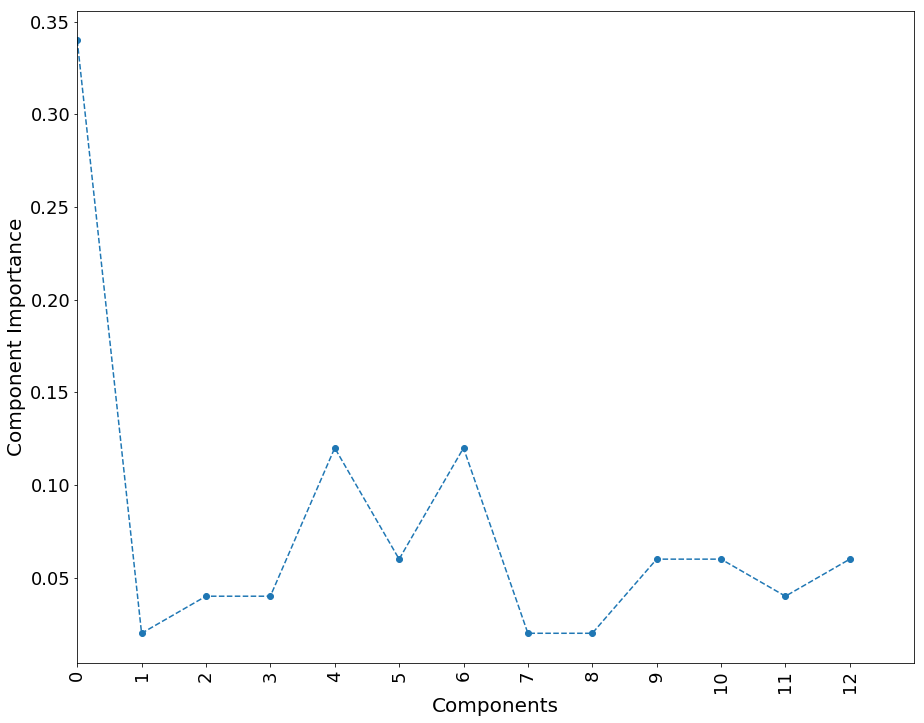

In [430]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [431]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8201767304860088

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4106   656     4762
True         565  1463     2028
__all__     4671  2119     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8048109965635739

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1730   298     2028
True         270   612      882
__all__     2000   910     2910

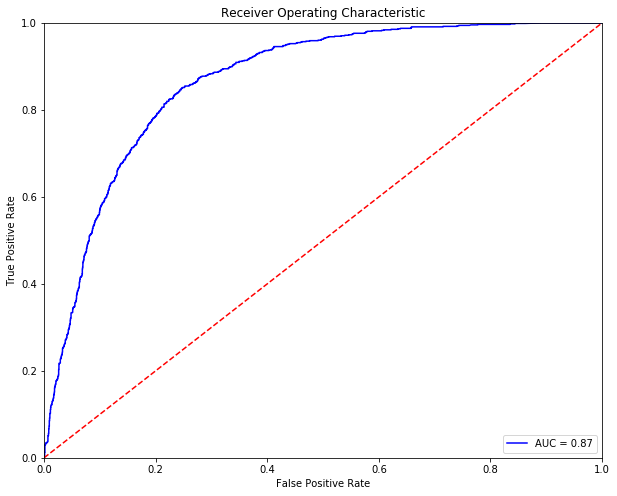

Optimal Threshold is 0.33535984656050233
Accuracy on test data is: 0.7945017182130584


Predicted  False  True  __all__
Actual                         
False       1612   416     2028
True         182   700      882
__all__     1794  1116     2910

In [432]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [433]:
table_70_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

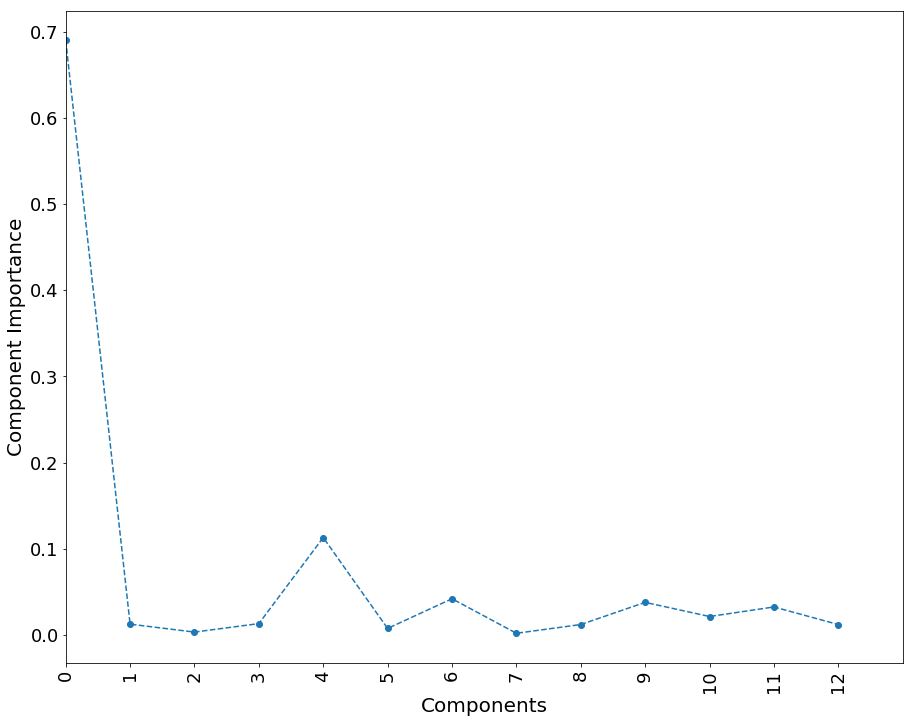

In [434]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [435]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.803240058910162

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3865   897     4762
True         439  1589     2028
__all__     4304  2486     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7910652920962199

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         205   677      882
__all__     1830  1080     2910

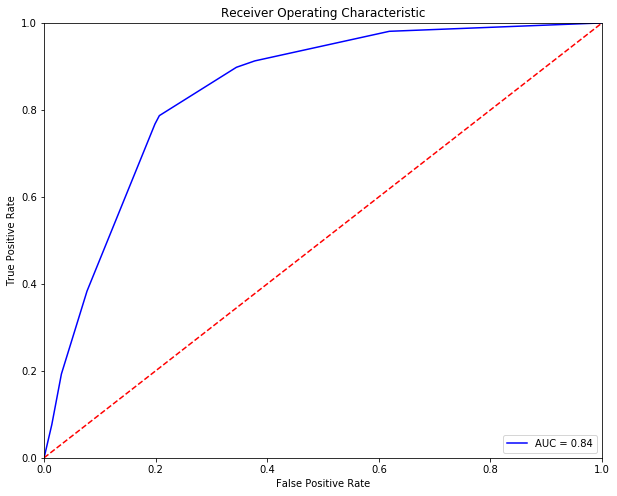

Optimal Threshold is 0.4523809523809524
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         205   677      882
__all__     1830  1080     2910

In [436]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [437]:
table_70_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [438]:
%%capture
table_70_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

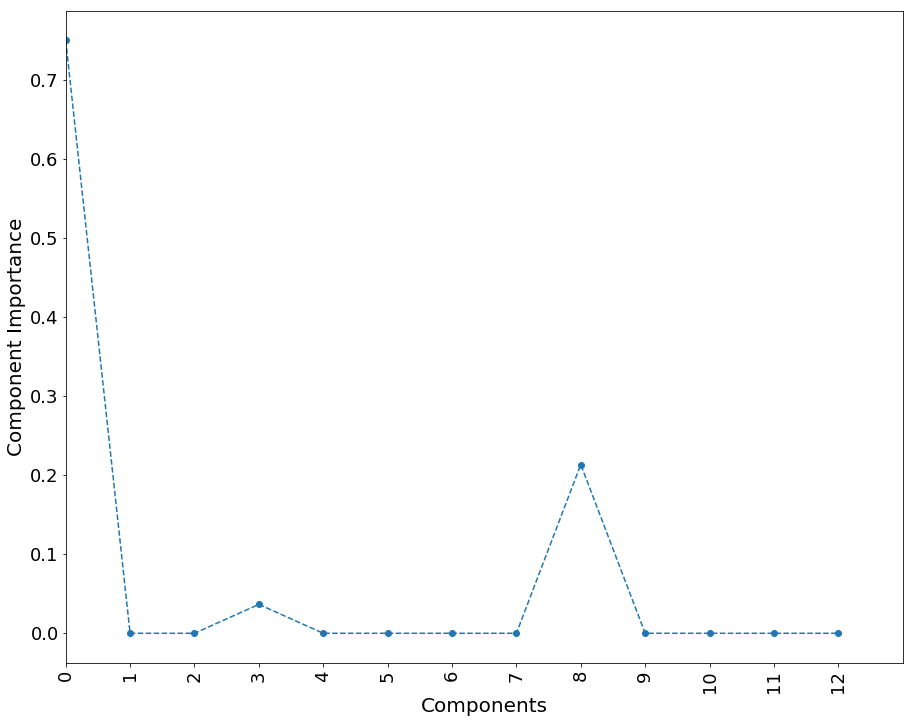

In [439]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [440]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9338733431516937

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4620   142     4762
True         307  1721     2028
__all__     4927  1863     6790

Accuracy of the  Bagging  model for test data is: 0.8061855670103093

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1752   276     2028
True         288   594      882
__all__     2040   870     2910

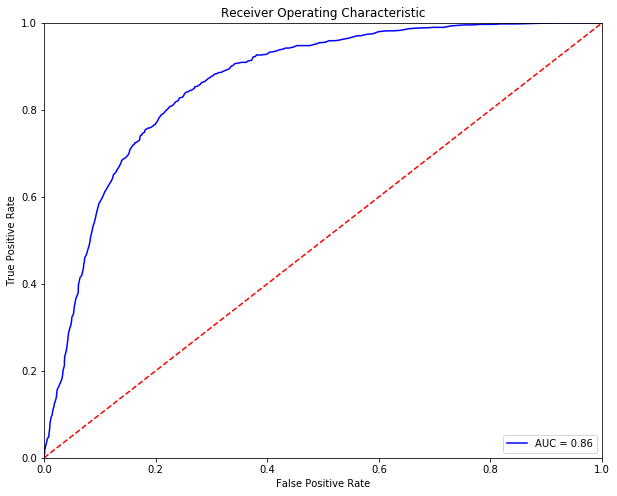

Optimal Threshold is 0.38666666666666666
Accuracy on test data is: 0.7896907216494845


Predicted  False  True  __all__
Actual                         
False       1605   423     2028
True         189   693      882
__all__     1794  1116     2910

In [441]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [442]:
table_70_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [443]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9458026509572901


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4725    37     4762
True         331  1697     2028
__all__     5056  1734     6790

The test accuracy is: 0.7914089347079037


Predicted  False  True  __all__
Actual                         
False       1788   240     2028
True         367   515      882
__all__     2155   755     2910

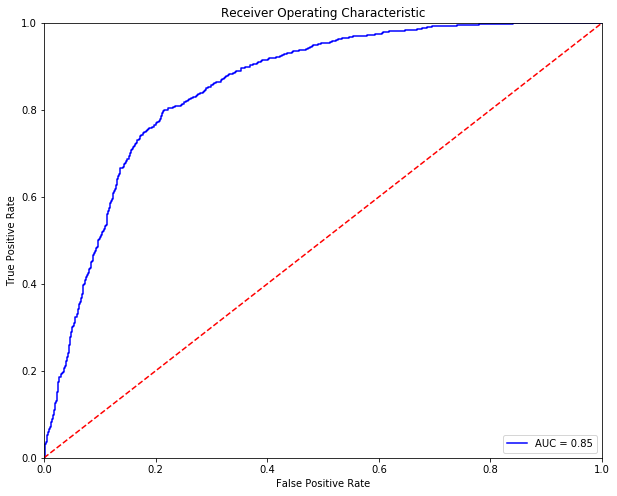

Optimal Threshold is 0.355946369974106
Accuracy on test data is: 0.788659793814433


Predicted  False  True  __all__
Actual                         
False       1601   427     2028
True         188   694      882
__all__     1789  1121     2910

In [444]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [445]:
table_70_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [446]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8765832106213858


Predicted  False  True  __all__
Actual                         
False       4446   316     4762
True         522  1506     2028
__all__     4968  1822     6790

The accuracy of the model on test data is: 0.7879725085910653


Predicted  False  True  __all__
Actual                         
False       1767   261     2028
True         356   526      882
__all__     2123   787     2910

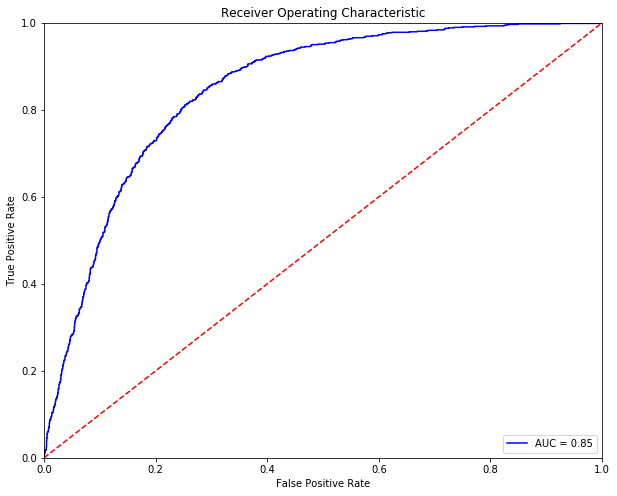

Optimal Threshold is 0.27131286
Accuracy of Logistic Model on training data is: 0.7731958762886598


Predicted  False  True  __all__
Actual                         
False       1569   459     2028
True         201   681      882
__all__     1770  1140     2910

In [447]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [448]:
table_70_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [449]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.8min finished


The accuracy of the model on training data is: 0.8132547864506627


Predicted  False  True  __all__
Actual                         
False       3979   783     4762
True         485  1543     2028
__all__     4464  2326     6790

The accuracy of the model on test data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       1689   339     2028
True         228   654      882
__all__     1917   993     2910

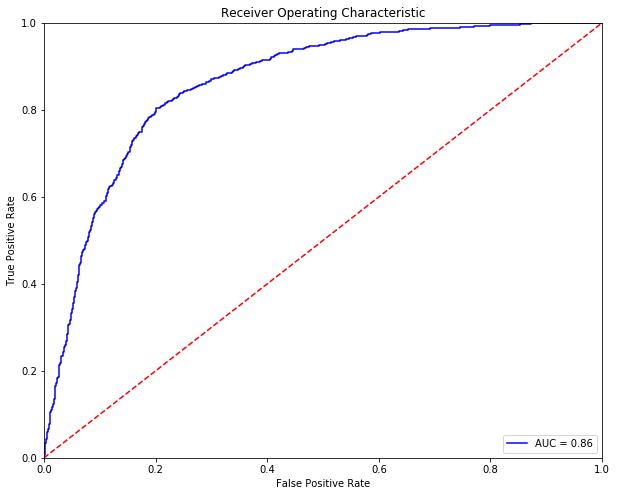

Optimal Threshold is 0.40565556
Accuracy on test data is: 0.7993127147766323


Predicted  False  True  __all__
Actual                         
False       1621   407     2028
True         177   705      882
__all__     1798  1112     2910

In [450]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [451]:
table_70_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [452]:
table_70_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  2028.000000  4762.000000     0.000000   
LogisticRegression          0.811340  1586.000000  3923.000000   839.000000   
RandomForestClassifier      0.701325  3339.711929  1422.288071  1422.288071   
AdaBoostClassifier          0.816053  1475.000000  4066.000000   696.000000   
GradientBoostingClassifier  0.820177  1463.000000  4106.000000   656.000000   
ExtraTreeClassifier         0.803240  1589.000000  3865.000000   897.000000   
BaggingClassifier           0.933873  1721.000000  4620.000000   142.000000   
VotingClassifier            0.945803  1697.000000  4725.000000    37.000000   
Neural Network-1            0.876583  1506.000000  4446.000000   316.000000   
Neural-Network-2            0.813255  1543.000000  3979.000000   783.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          442.000000  0.176186  0.217949  
RandomForestClassifier      605.711929  0.701325  0.298675  
AdaBoostClassifier          553.000000  0.146157  0.272682  
GradientBoostingClassifier  565.000000  0.137757  0.278600  
ExtraTreeClassifier         439.000000  0.188366  0.216469  
BaggingClassifier           307.000000  0.029819  0.151381  
VotingClassifier            331.000000  0.007770  0.163215  
Neural Network-1            522.000000  0.066359  0.257396  
Neural-Network-2            485.000000  0.164427  0.239152

Comparision Table for Test Accuracies:


accuracy           TP           TN          FP  \
index                                                                        
KNeighborsClassifier        0.800344   532.000000  1797.000000  231.000000   
LogisticRegression          0.802062   678.000000  1656.000000  372.000000   
RandomForestClassifier      0.696907  1413.327835   614.672165  614.672165   
AdaBoostClassifier          0.798282   611.000000  1712.000000  316.000000   
GradientBoostingClassifier  0.804811   612.000000  1730.000000  298.000000   
ExtraTreeClassifier         0.791065   677.000000  1625.000000  403.000000   
BaggingClassifier           0.806186   594.000000  1752.000000  276.000000   
VotingClassifier            0.791409   515.000000  1788.000000  240.000000   
Neural Network-1            0.787973   526.000000  1767.000000  261.000000   
Neural-Network-2            0.805155   654.000000  1689.000000  339.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        350.000000  0.113905  0.396825  
LogisticRegression          204.000000  0.183432  0.231293  
RandomForestClassifier      267.327835  0.696907  0.303093  
AdaBoostClassifier          271.000000  0.155819  0.307256  
GradientBoostingClassifier  270.000000  0.146943  0.306122  
ExtraTreeClassifier         205.000000  0.198718  0.232426  
BaggingClassifier           288.000000  0.136095  0.326531  
VotingClassifier            367.000000  0.118343  0.416100  
Neural Network-1            356.000000  0.128698  0.403628  
Neural-Network-2            228.000000  0.167160  0.258503

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.790722  697.0  1604.0  424.0  185.0  0.209073   
LogisticRegression          0.796564  702.0  1616.0  412.0  180.0  0.203156   
RandomForestClassifier      0.791409  695.0  1608.0  420.0  187.0  0.207101   
AdaBoostClassifier          0.791409  698.0  1605.0  423.0  184.0  0.208580   
GradientBoostingClassifier  0.794502  700.0  1612.0  416.0  182.0  0.205128   
ExtraTreeClassifier         0.791065  677.0  1625.0  403.0  205.0  0.198718   
BaggingClassifier           0.789691  693.0  1605.0  423.0  189.0  0.208580   
VotingClassifier            0.788660  694.0  1601.0  427.0  188.0  0.210552   
Neural Network-1            0.773196  681.0  1569.0  459.0  201.0  0.226331   
Neural-Network-2            0.799313  705.0  1621.0  407.0  177.0  0.200690   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.209751   0.294501  0.858741  
LogisticRegression          0.204082   0.436868  0.864890  
RandomForestClassifier      0.212018   0.270434  0.816111  
AdaBoostClassifier          0.208617   0.492584  0.863878  
GradientBoostingClassifier  0.206349   0.335360  0.867301  
ExtraTreeClassifier         0.232426   0.452381  0.844245  
BaggingClassifier           0.214286   0.386667  0.862718  
VotingClassifier            0.213152   0.355946  0.852882  
Neural Network-1            0.227891   0.271313  0.846502  
Neural-Network-2            0.200680   0.405656  0.862766

#### Random State 20

In [453]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')



print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

SP  DP  NAPP  SIP  DIP  \
User                                                                          
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   85   2     2    1    5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  358   6    13    8  133   

                                                    NREC        PAR  \
User                                                                  
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...    86   2.523256   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...   363  22.209366   

                                                          PAS        LEN  \
User                                                                       
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   1.813953  30.546512   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  12.785124  63.633609   

                                                            BYS           BYR  \
User                                                                            
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...   157.523256   2244.197674   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...  2778.881543  24241.719008   

                                                    0000  0100  0200  0300  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6    38     1     5   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     2     2     0   

                                                    0400  0500  0600  0700  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     8     1     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    0800  0900  1000  1100  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     6     2     2     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1200  1300  1400  1500  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     1     5     6     1   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0     0     0   

                                                    1600  1700  1800  1900  \
User                                                                         
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     1     0     0   
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...     0     0   161    93   

                                                    2000  2100  2200  2300  
User                                                                        
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5...     0     0     0     3  
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e...    61    44     0     0

1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
b7b1dc23208b771f7f4064f11cb242deabff0b594c5702ed249f7da3aa3c0d46    0
70cf36c3618bc49232d2d2951293abfdb8f7cfa8ec37505b51ceb68a23088d79    1
1c52c8745fb339f5f0fd493068dfa07d99d0b0a4d932a7a81ea14a09c6a2be0c    0
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8b663447ab99229eb2    1
0d3a24dce6ba5dc4fc8acd3ebf2c45634887f641cbb1f8983498e181794a350e    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.9384105861303276
The train/test split ratio is 70:30


In [454]:
display(X_pca_13[0:1])

array([[-0.69051367, -0.11079807,  0.31011073,  0.22770756, -0.17316433,
         0.61343948,  0.71269011, -0.23358669, -0.45817007,  0.97268493,
        -0.05144281,  0.29433028, -0.59779012]])

In [455]:
## Table to store training and test measures
table_70_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [456]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4760     0     4760
True           0  2030     2030
__all__     4760  2030     6790

Accuracy of the  KNN  model for test data is: 0.7951890034364261

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1825   205     2030
True         391   489      880
__all__     2216   694     2910

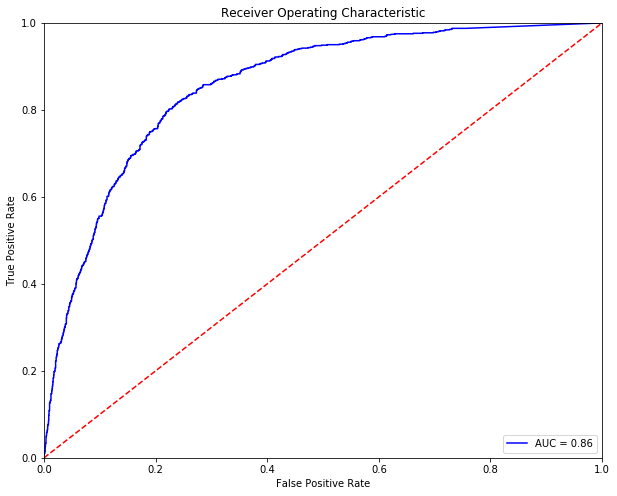

Optimal Threshold is 0.30042116430484006
Accuracy on test data is: 0.7859106529209622


Predicted  False  True  __all__
Actual                         
False       1596   434     2030
True         189   691      880
__all__     1785  1125     2910

In [457]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [458]:
table_70_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [459]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False          False                0.5        50  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  1e-05

Accuracy of the  Logistic  model for the training data is: 0.801178203240059

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3876   884     4760
True         466  1564     2030
__all__     4342  2448     6790

Accuracy of the  Logistic  model for test data is: 0.7982817869415808

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1666   364     2030
True         223   657      880
__all__     1889  1021     2910

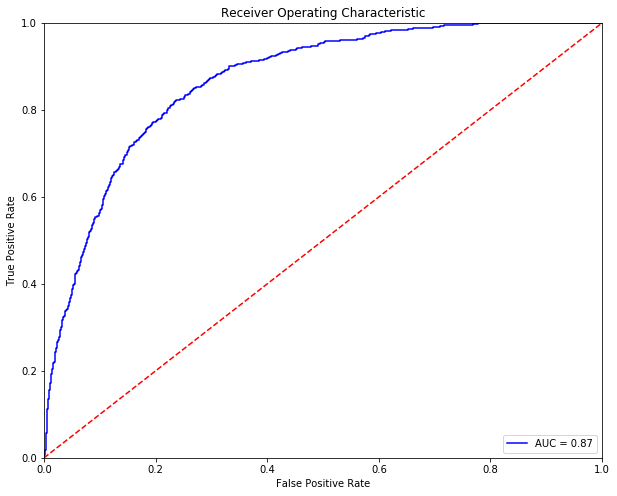

Optimal Threshold is 0.46648365853822255
Accuracy on test data is: 0.7879725085910653


Predicted  False  True  __all__
Actual                         
False       1600   430     2030
True         187   693      880
__all__     1787  1123     2910

In [460]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [461]:
table_70_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [462]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.7010309278350515

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          4760  0     4760
1          2030  0     2030
__all__    6790  0     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.697594501718213

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          2030  0     2030
1           880  0      880
__all__    2910  0     2910

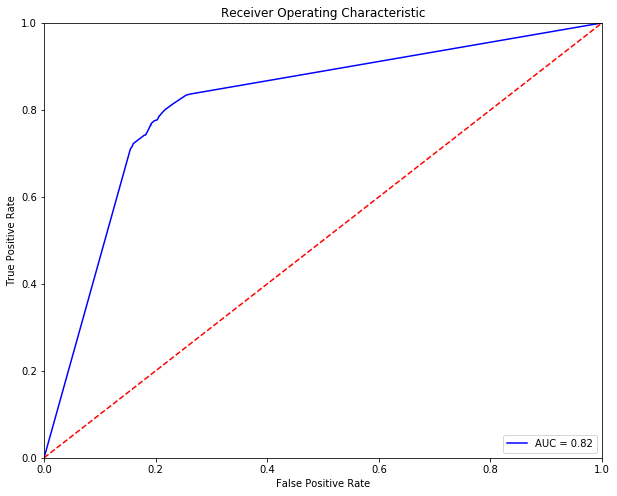

Optimal Threshold is 0.27603918973014585
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1610   420     2030
True         188   692      880
__all__     1798  1112     2910

In [463]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [464]:
table_70_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

4760
0
0
4760
2030
0
0
2030
1.0
0.0
0.0
1.0
2030
0
0
2030
880
0
0
880
1.0
0.0
0.0
1.0


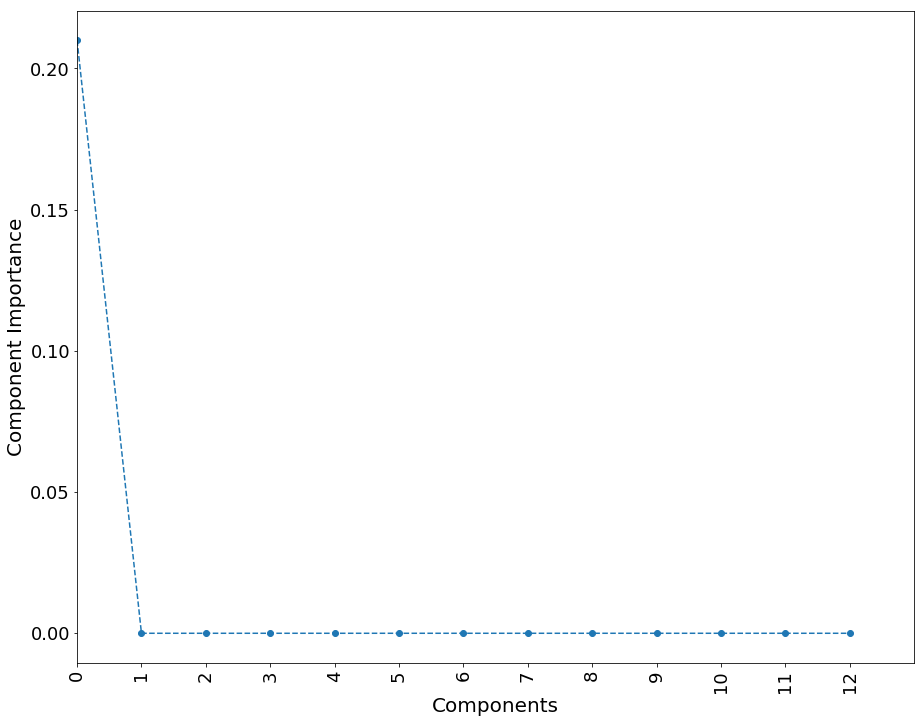

In [465]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [466]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8120765832106038

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4106   654     4760
True         622  1408     2030
__all__     4728  2062     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.7982817869415808

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   286     2030
True         301   579      880
__all__     2045   865     2910

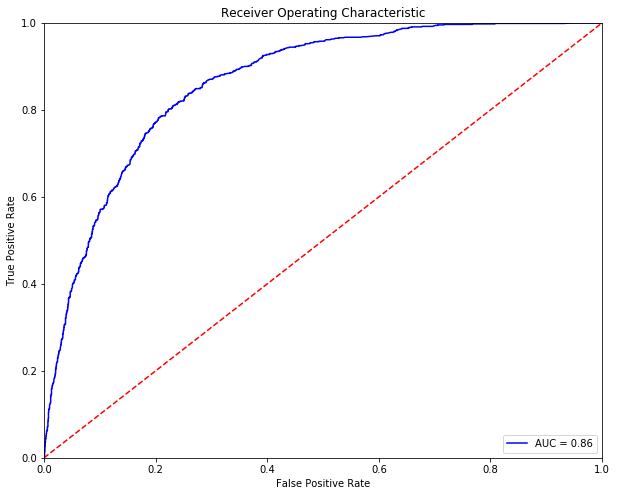

Optimal Threshold is 0.4917846954731791
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1594   436     2030
True         188   692      880
__all__     1782  1128     2910

In [467]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [468]:
table_70_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

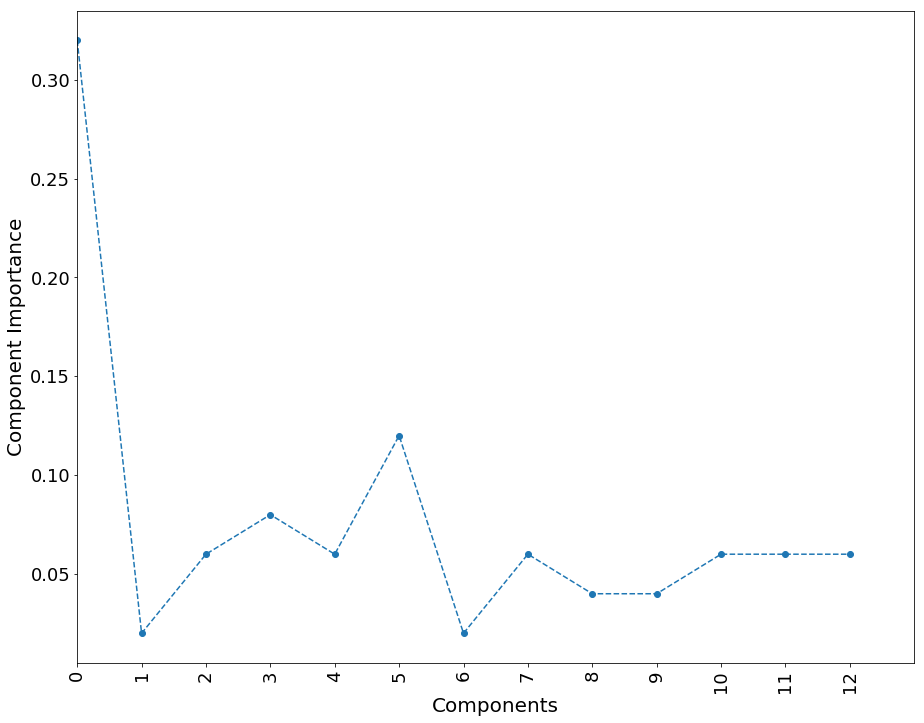

In [469]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [470]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.2  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8164948453608247

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4135   625     4760
True         621  1409     2030
__all__     4756  2034     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1755   275     2030
True         300   580      880
__all__     2055   855     2910

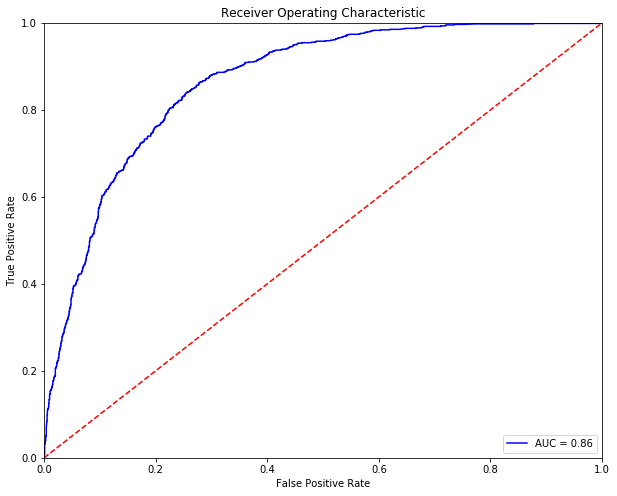

Optimal Threshold is 0.3258018042202847
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False       1590   440     2030
True         190   690      880
__all__     1780  1130     2910

In [471]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [472]:
table_70_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

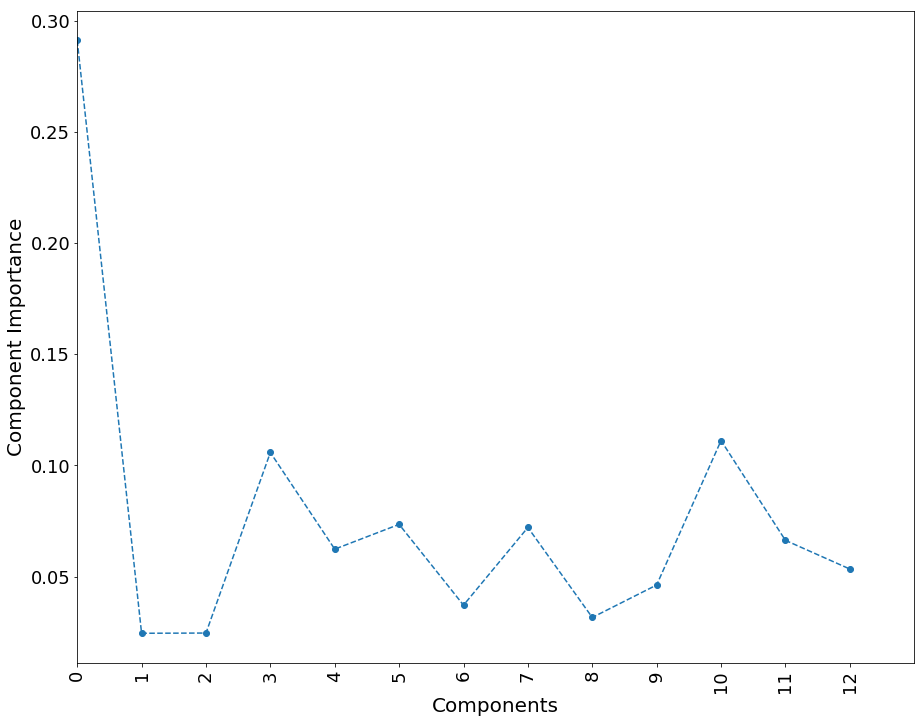

In [473]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [474]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.793519882179676

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3924   836     4760
True         566  1464     2030
__all__     4490  2300     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7707903780068729

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1649   381     2030
True         286   594      880
__all__     1935   975     2910

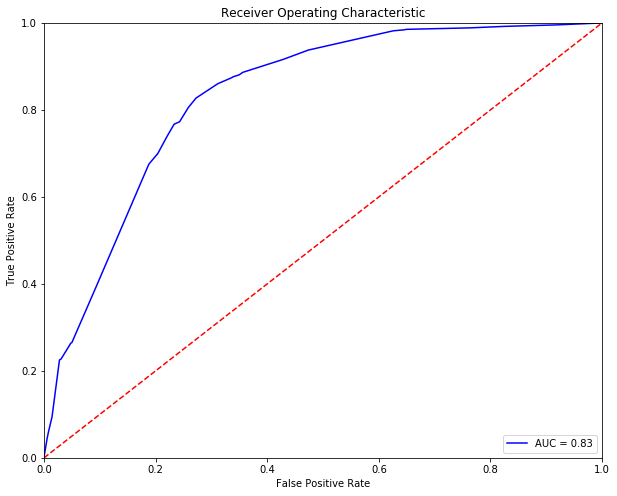

Optimal Threshold is 0.4105960264900662
Accuracy on test data is: 0.7673539518900344


Predicted  False  True  __all__
Actual                         
False       1582   448     2030
True         229   651      880
__all__     1811  1099     2910

In [475]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [476]:
table_70_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [477]:
%%capture
table_70_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

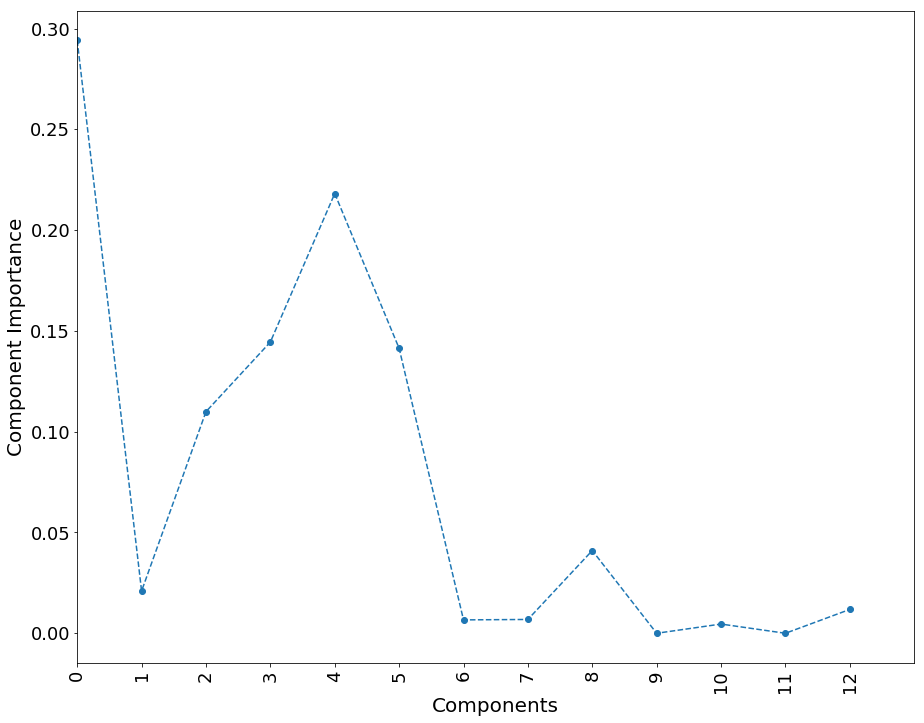

In [478]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [479]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.9325478645066274

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4615   145     4760
True         313  1717     2030
__all__     4928  1862     6790

Accuracy of the  Bagging  model for test data is: 0.7965635738831615

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1771   259     2030
True         333   547      880
__all__     2104   806     2910

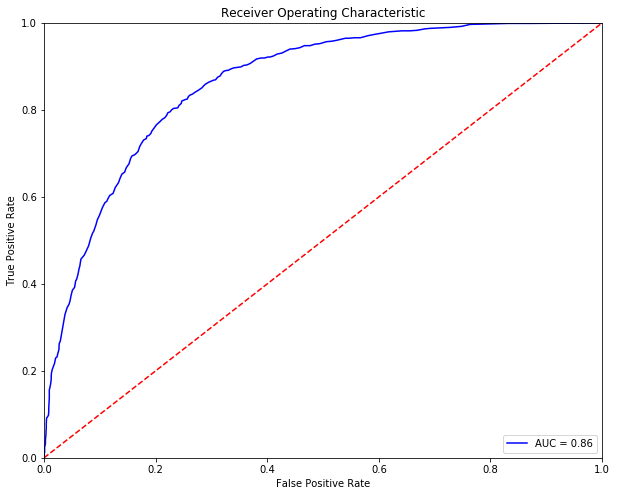

Optimal Threshold is 0.385
Accuracy on test data is: 0.7852233676975945


Predicted  False  True  __all__
Actual                         
False       1600   430     2030
True         195   685      880
__all__     1795  1115     2910

In [480]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [481]:
table_70_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [482]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is : 0.9446244477172312


/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/nethomes/darshan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted  False  True  __all__
Actual                         
False       4718    42     4760
True         334  1696     2030
__all__     5052  1738     6790

The test accuracy is: 0.7903780068728522


Predicted  False  True  __all__
Actual                         
False       1823   207     2030
True         403   477      880
__all__     2226   684     2910

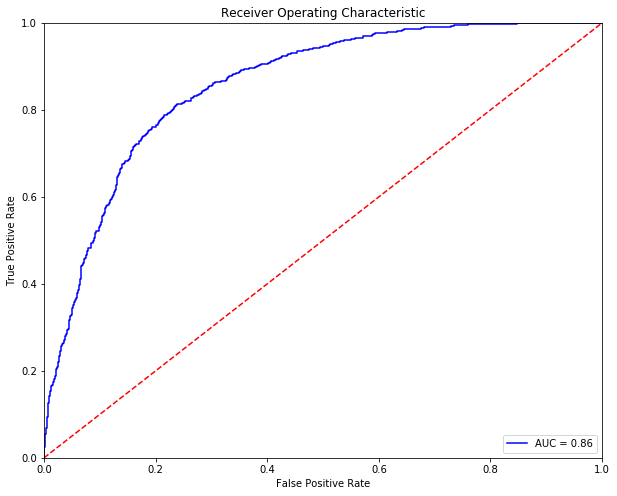

Optimal Threshold is 0.35091879205113513
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1595   435     2030
True         189   691      880
__all__     1784  1126     2910

In [483]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [484]:
table_70_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [485]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.8640648011606467


Predicted  False  True  __all__
Actual                         
False       4261   499     4760
True         424  1606     2030
__all__     4685  2105     6790

The accuracy of the model on test data is: 0.7845360824742268


Predicted  False  True  __all__
Actual                         
False       1705   325     2030
True         302   578      880
__all__     2007   903     2910

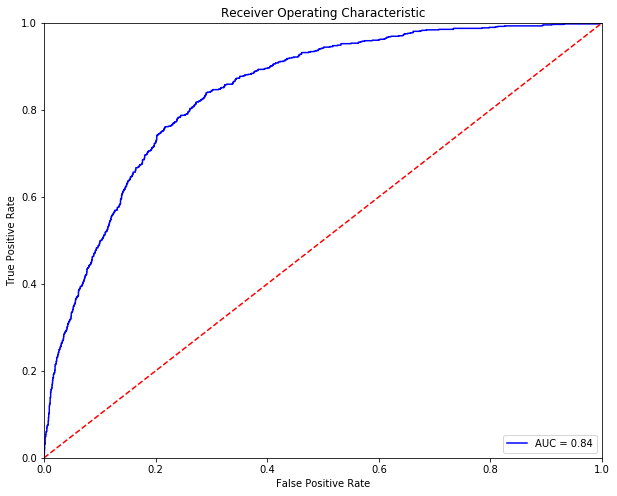

Optimal Threshold is 0.35001895
Accuracy of Logistic Model on training data is: 0.7687285223367698


Predicted  False  True  __all__
Actual                         
False       1561   469     2030
True         204   676      880
__all__     1765  1145     2910

In [486]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [487]:
table_70_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [488]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.8min finished


The accuracy of the model on training data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       4084   676     4760
True         647  1383     2030
__all__     4731  2059     6790

The accuracy of the model on test data is: 0.8013745704467354


Predicted  False  True  __all__
Actual                         
False       1752   278     2030
True         300   580      880
__all__     2052   858     2910

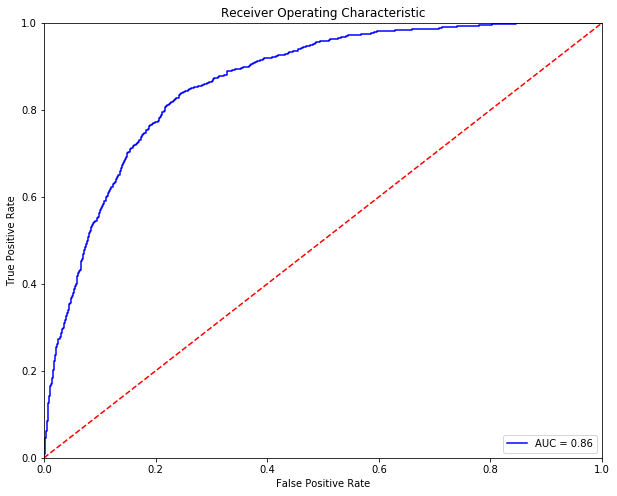

Optimal Threshold is 0.12653148
Accuracy on test data is: 0.7893470790378007


Predicted  False  True  __all__
Actual                         
False       1603   427     2030
True         186   694      880
__all__     1789  1121     2910

In [489]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [490]:
table_70_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [491]:
table_70_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  2030.000000  4760.000000     0.000000   
LogisticRegression          0.801178  1564.000000  3876.000000   884.000000   
RandomForestClassifier      0.701031  3336.907216  1423.092784  1423.092784   
AdaBoostClassifier          0.812077  1408.000000  4106.000000   654.000000   
GradientBoostingClassifier  0.816495  1409.000000  4135.000000   625.000000   
ExtraTreeClassifier         0.793520  1464.000000  3924.000000   836.000000   
BaggingClassifier           0.932548  1717.000000  4615.000000   145.000000   
VotingClassifier            0.944624  1696.000000  4718.000000    42.000000   
Neural Network-1            0.864065  1606.000000  4261.000000   499.000000   
Neural-Network-2            0.805155  1383.000000  4084.000000   676.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          466.000000  0.185714  0.229557  
RandomForestClassifier      606.907216  0.701031  0.298969  
AdaBoostClassifier          622.000000  0.137395  0.306404  
GradientBoostingClassifier  621.000000  0.131303  0.305911  
ExtraTreeClassifier         566.000000  0.175630  0.278818  
BaggingClassifier           313.000000  0.030462  0.154187  
VotingClassifier            334.000000  0.008824  0.164532  
Neural Network-1            424.000000  0.104832  0.208867  
Neural-Network-2            647.000000  0.142017  0.318719

Comparision Table for Test Accuracies:


accuracy           TP           TN          FP  \
index                                                                        
KNeighborsClassifier        0.795189   489.000000  1825.000000  205.000000   
LogisticRegression          0.798282   657.000000  1666.000000  364.000000   
RandomForestClassifier      0.697595  1416.116838   613.883162  613.883162   
AdaBoostClassifier          0.798282   579.000000  1744.000000  286.000000   
GradientBoostingClassifier  0.802405   580.000000  1755.000000  275.000000   
ExtraTreeClassifier         0.770790   594.000000  1649.000000  381.000000   
BaggingClassifier           0.796564   547.000000  1771.000000  259.000000   
VotingClassifier            0.790378   477.000000  1823.000000  207.000000   
Neural Network-1            0.784536   578.000000  1705.000000  325.000000   
Neural-Network-2            0.801375   580.000000  1752.000000  278.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        391.000000  0.100985  0.444318  
LogisticRegression          223.000000  0.179310  0.253409  
RandomForestClassifier      266.116838  0.697595  0.302405  
AdaBoostClassifier          301.000000  0.140887  0.342045  
GradientBoostingClassifier  300.000000  0.135468  0.340909  
ExtraTreeClassifier         286.000000  0.187685  0.325000  
BaggingClassifier           333.000000  0.127586  0.378409  
VotingClassifier            403.000000  0.101970  0.457955  
Neural Network-1            302.000000  0.160099  0.343182  
Neural-Network-2            300.000000  0.136946  0.340909

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.785911  691.0  1596.0  434.0  189.0  0.213793   
LogisticRegression          0.787973  693.0  1600.0  430.0  187.0  0.211823   
RandomForestClassifier      0.791065  692.0  1610.0  420.0  188.0  0.206897   
AdaBoostClassifier          0.785567  692.0  1594.0  436.0  188.0  0.214778   
GradientBoostingClassifier  0.783505  690.0  1590.0  440.0  190.0  0.216749   
ExtraTreeClassifier         0.767354  651.0  1582.0  448.0  229.0  0.220690   
BaggingClassifier           0.785223  685.0  1600.0  430.0  195.0  0.211823   
VotingClassifier            0.785567  691.0  1595.0  435.0  189.0  0.214286   
Neural Network-1            0.768729  676.0  1561.0  469.0  204.0  0.231034   
Neural-Network-2            0.789347  694.0  1603.0  427.0  186.0  0.210345   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.214773   0.300421  0.856247  
LogisticRegression          0.212500   0.466484  0.866763  
RandomForestClassifier      0.213636   0.276039  0.816581  
AdaBoostClassifier          0.213636   0.491785  0.863371  
GradientBoostingClassifier  0.215909   0.325802  0.864903  
ExtraTreeClassifier         0.260227   0.410596  0.832805  
BaggingClassifier           0.221591   0.385000  0.862020  
VotingClassifier            0.214773   0.350919  0.856895  
Neural Network-1            0.231818   0.350019  0.842395  
Neural-Network-2            0.211364   0.126531  0.864974

In [492]:
table_70_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [493]:
table_70_50_PCA_train_avg['accuracy']=(table_70_50_PCA_0_train['accuracy']+table_70_50_PCA_10_train['accuracy']+table_70_50_PCA_20_train['accuracy'])/3.0
table_70_50_PCA_train_avg['FPR']=(table_70_50_PCA_0_train['FPR']+table_70_50_PCA_10_train['FPR']+table_70_50_PCA_20_train['FPR'])/3.0
table_70_50_PCA_train_avg['FNR']=(table_70_50_PCA_0_train['FNR']+table_70_50_PCA_10_train['FNR']+table_70_50_PCA_20_train['FNR'])/3.0

In [494]:
table_70_50_PCA_test_avg['accuracy']=(table_70_50_PCA_0_test['accuracy']+table_70_50_PCA_10_test['accuracy']+table_70_50_PCA_20_test['accuracy'])/3.0
table_70_50_PCA_test_avg['FPR']=(table_70_50_PCA_0_test['FPR']+table_70_50_PCA_10_test['FPR']+table_70_50_PCA_20_test['FPR'])/3.0
table_70_50_PCA_test_avg['FNR']=(table_70_50_PCA_0_test['FNR']+table_70_50_PCA_10_test['FNR']+table_70_50_PCA_20_test['FNR'])/3.0

In [495]:
table_70_50_PCA_test_roc_avg['accuracy']=(table_70_50_PCA_0_test_roc['accuracy']+table_70_50_PCA_10_test_roc['accuracy']+table_70_50_PCA_20_test_roc['accuracy'])/3.0
table_70_50_PCA_test_roc_avg['FPR']=(table_70_50_PCA_0_test_roc['FPR']+table_70_50_PCA_10_test_roc['FPR']+table_70_50_PCA_20_test_roc['FPR'])/3.0
table_70_50_PCA_test_roc_avg['FNR']=(table_70_50_PCA_0_test_roc['FNR']+table_70_50_PCA_10_test_roc['FNR']+table_70_50_PCA_20_test_roc['FNR'])/3.0
table_70_50_PCA_test_roc_avg['auc']=(table_70_50_PCA_0_test_roc['auc']+table_70_50_PCA_10_test_roc['auc']+table_70_50_PCA_20_test_roc['auc'])/3.0

In [496]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.936868  0.032977  0.134390
LogisticRegression          0.804762  0.179321  0.232708
RandomForestClassifier      0.701669  0.701669  0.298331
AdaBoostClassifier          0.813255  0.139791  0.297206
GradientBoostingClassifier  0.815857  0.136357  0.296537
ExtraTreeClassifier         0.799902  0.181138  0.244673
BaggingClassifier           0.942955  0.022889  0.137352
VotingClassifier            0.944330  0.008396  0.166868
Neural Network-1            0.865685  0.084661  0.251178
Neural-Network-2            0.808837  0.153150  0.280558

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.799542  0.103164  0.423292
LogisticRegression          0.806071  0.176057  0.234893
RandomForestClassifier      0.696105  0.696105  0.303895
AdaBoostClassifier          0.805842  0.141827  0.314077
GradientBoostingClassifier  0.807331  0.140530  0.312198
ExtraTreeClassifier         0.791867  0.186420  0.258012
BaggingClassifier           0.804582  0.131810  0.341228
VotingClassifier            0.794158  0.108934  0.427902
Neural Network-1            0.785796  0.139852  0.384365
Neural-Network-2            0.809393  0.149412  0.285102

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.792669  0.205509  0.211467  0.862315
LogisticRegression          0.797938  0.201889  0.202459  0.870965
RandomForestClassifier      0.797365  0.198755  0.211470  0.822342
AdaBoostClassifier          0.795762  0.204187  0.204350  0.868593
GradientBoostingClassifier  0.797136  0.202703  0.203229  0.871371
ExtraTreeClassifier         0.790722  0.197422  0.236421  0.844514
BaggingClassifier           0.792325  0.205513  0.212632  0.866324
VotingClassifier            0.790951  0.208643  0.209982  0.860990
Neural Network-1            0.773425  0.226254  0.227311  0.846546
Neural-Network-2            0.800115  0.199749  0.200199  0.869505

In [497]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')